Hi, My name is Chris Franklin. I am submitting this notebook as part of the datathon: NFT DataCrunch League - bitsCrunch (Bronze Edition) 

https://dphi.tech/challenges/198/overview/about

I recommend that a notebook assesser use Google Colab because I mount Google Drive and export files to Google Drive as part of the project

**Installing initial Libraries**

**Action required for someone running the below cell, When running !pip install --user --upgrade -e "git+https://github.com/twintproject/twint.git@origin/master#egg=twint" the output says to restart the runtime, so please restart the runtime as indicated otherwise the installation of twint library will not work correctly**


In [1]:
import pandas as pd
import numpy as np
!pip3 install --user --upgrade -e "git+https://github.com/twintproject/twint.git@origin/master#egg=twint"
!pip3 install twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Updating ./src/twint clone (to revision origin/master)
  Running command git fetch -q --tags
  Running command git reset --hard -q origin/master
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21
  Running setup.py develop for twint


In [2]:
!pip3 install datetime

     |████████████████████████████████| 51 kB 393 kB/s 
     |████████████████████████████████| 251 kB 16.9 MB/s 


**Installation of asyncio code to avoid the error, “RuntimeError: This event loop is already running”.**

By design asyncio does not allow its event loop to be nested. This presents a practical problem: When in an environment where the event loop is already running it’s impossible to run tasks and wait for the result. Trying to do so will give the error “RuntimeError: This event loop is already running”.

The issue pops up in various environments, such as web servers, GUI applications and in Jupyter notebooks.

This module patches asyncio to allow nested use of asyncio.run and loop.run_until_complete.
source: https://pypi.org/project/nest-asyncio/


In [3]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

**Here are the hashtags I will being doing searches on in order:
1)#nfts, 2)#nft, 3)#nftart, 4)#nftcommunity, 5)#nftcollector, 6)#NFTS, 7)#NFT,
8)#NFTCommunity, 9)#NFTcommunity, 10)#nftgiveaway, 11)#NFTGiveaway, 12)#metaverse, 13)#web3, 14)#NFTCollection, 15)#NFTGame, 16)#NFTdrop, 17)#NFTartists, 18)#NFTProject, 19)#NFTMarketplace,20)#NFTdrops. 21)I have a bonus search based on Twitter User "coinbase" with Search criteria of nfts**

**Using TWINT to perform Twitter Searches, sfor the HashTag 1)#nfts**

**Fyi When using the python library Twint for Twitter web-scraping,running a live web-scraping search will render different results, particularly the amount of tweets and the dates of the tweets. When I did my twint search, it outputted 9 tweets from 03-08-2022. If someone runs a twint search in real time the amount of tweets and dates will be different.**



**Entering Search results into a Pandas Dataframe**

**Also The webscraping tool Twint can often not return any results the first time a juypter cell is run. If this happens please rerun the this cell until tweet results are rendered, Thanks Chris**

In [20]:
import twint
import datetime

# Configure
e = twint.Config()
e.Since ='2022-03-04'
e.Until ='2022-03-05'

e.Search ='#nfts'


# Run
e.Limit = 9
e.Pandas = True
e.Debug = True

twt_df1 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1499897474353405960 2022-03-04 23:59:59 +0000 <WizardsOfEtheen> 🚨🚨🚨  Introducing our second 1/1 wizard reveal. Meet Turgen, protector of the Mines of Ether, Commander of the Mountains of Thoobull, son of Cultheer.   A wizard with great gifts and even greater responsibilities.  #foretheen #nft #nfts #nftdrop #nftcommunity #nftcollection  https://t.co/imNT54GAy8
1499897459069308935 2022-03-04 23:59:55 +0000 <Hashook_> Hi I'm "Tiger" from AniBots collection🐅 You can find me on @opensea   That's me and you can discover my other friends in the collection. Please Retweet me!  https://t.co/KDqVke7bbj #NFT #NFTCommunity #nftcollector #nftart #NFTProject #NFTs #OpenSeaNFT #support #Tiger
1499897454711427076 2022-03-04 23:59:54 +0000 <MegaHeadsNFT> Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhyvEeA  #NFT #NFTs #NFTCommunity  https://t.co/RlgK3zKG8u
1499897431533797383 2022-03-04 23:59:49 +0000 <dicoslabs> 'soldier 022' is now listed for 0.07Eth on the polygon Network @opensea 🥳🥳   https://t.co/2

**Reminder, The webscraping tool Twint can often not return any results the first time a juypter cell is run. If this happens please rerun the previous cell until tweet results are rendered, An example of a succeessfukl Twint Search look likes the picture below**

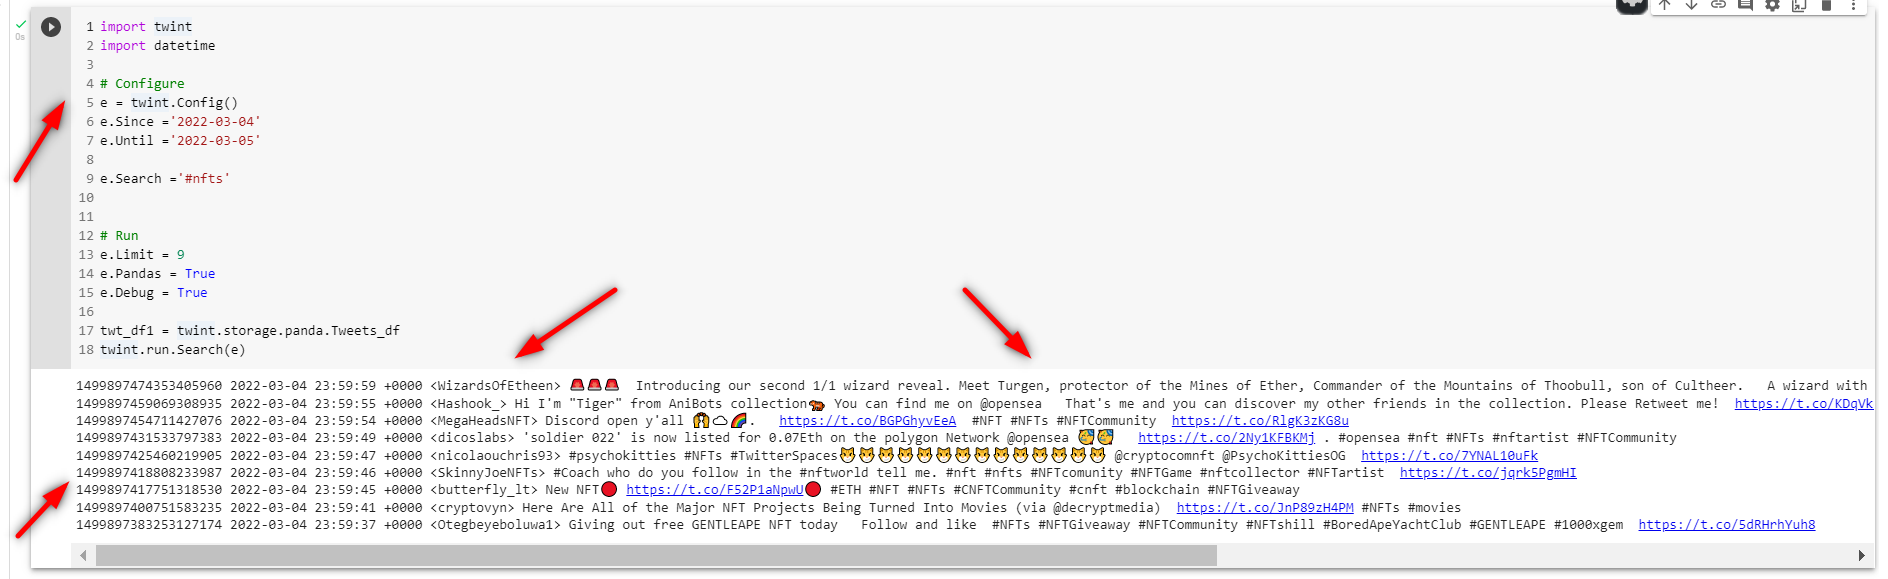

**An unsuccessful Twint Search will output these words below:**

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.

**Also here is a picture of what a unsuccessful Twint Search output looks like. If you see this output, please rerun the Search cell again until you see Tweets outputted, Thanks 😄**

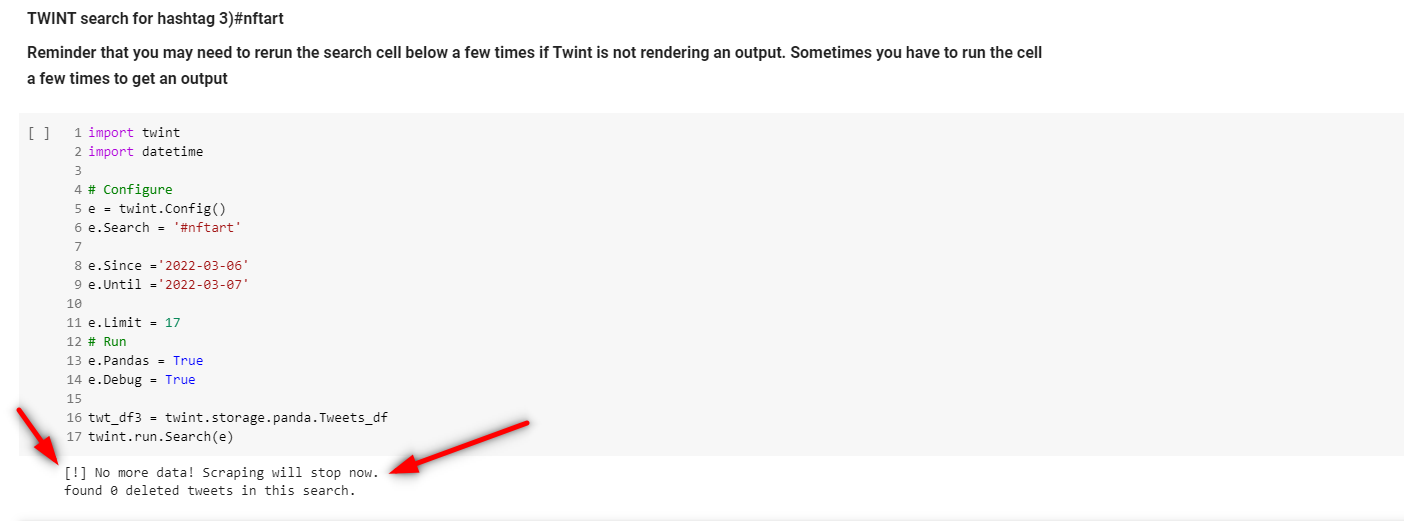

**Functions that shows all the column names of the dataframe**



In [27]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #nfts**

In [28]:
tweet_df = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df

date         username  \
0  2022-03-04 23:59:59  WizardsOfEtheen   
1  2022-03-04 23:59:55         Hashook_   
2  2022-03-04 23:59:54     MegaHeadsNFT   
3  2022-03-04 23:59:49        dicoslabs   
4  2022-03-04 23:59:47  nicolaouchris93   
5  2022-03-04 23:59:46    SkinnyJoeNFTs   
6  2022-03-04 23:59:45     butterfly_lt   
7  2022-03-04 23:59:41        cryptovyn   
8  2022-03-04 23:59:37  Otegbeyeboluwa1   

                                               tweet  \
0  🚨🚨🚨  Introducing our second 1/1 wizard reveal....   
1  Hi I'm "Tiger" from AniBots collection🐅 You ca...   
2  Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhy...   
3  'soldier 022' is now listed for 0.07Eth on the...   
4  #psychokitties #NFTs #TwitterSpaces😼😼😼😼😼😼😼😼😼😼😼...   
5  #Coach who do you follow in the #nftworld tell...   
6  New NFT🔴 https://t.co/F52P1aNpwU🔴 #ETH #NFT #N...   
7  Here Are All of the Major NFT Projects Being T...   
8  Giving out free GENTLEAPE NFT today   Follow a...   

                                            hashtags  nlikes  
0  [foretheen, nft, nfts, nftdrop, nftcommunity, ...      20  
1  [nft, nftcommunity, nftcollector, nftart, nftp...       6  
2                          [nft, nfts, nftcommunity]       3  
3      [opensea, nft, nfts, nftartist, nftcommunity]       6  
4               [psychokitties, nfts, twitterspaces]       1  
5  [coach, nftworld, nft, nfts, nftcomunity, nftg...       6  
6  [eth, nft, nfts, cnftcommunity, cnft, blockcha...      17  
7                                     [nfts, movies]       1  
8  [nfts, nftgiveaway, nftcommunity, nftshill, bo...       8

**Created Dataframe that displays the tweets from HashTag #nfts**

In [29]:
tweet_list = tweet_df['tweet'].tolist()
tweet_list

['🚨🚨🚨  Introducing our second 1/1 wizard reveal. Meet Turgen, protector of the Mines of Ether, Commander of the Mountains of Thoobull, son of Cultheer.   A wizard with great gifts and even greater responsibilities.  #foretheen #nft #nfts #nftdrop #nftcommunity #nftcollection  https://t.co/imNT54GAy8',
 'Hi I\'m "Tiger" from AniBots collection🐅 You can find me on @opensea   That\'s me and you can discover my other friends in the collection. Please Retweet me!  https://t.co/KDqVke7bbj #NFT #NFTCommunity #nftcollector #nftart #NFTProject #NFTs #OpenSeaNFT #support #Tiger',
 "Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhyvEeA  #NFT #NFTs #NFTCommunity  https://t.co/RlgK3zKG8u",
 "'soldier 022' is now listed for 0.07Eth on the polygon Network @opensea 🥳🥳   https://t.co/2Ny1KFBKMj . #opensea #nft #NFTs #nftartist #NFTCommunity",
 '#psychokitties #NFTs #TwitterSpaces😼😼😼😼😼😼😼😼😼😼😼😼😼😼 @cryptocomnft @PsychoKittiesOG  https://t.co/7YNAL10uFk',
 '#Coach who do you follow in the #nftworld tell me. #n

In [30]:
print(len(tweet_list))
# prints the amount of tweets in tweet_list

9


**Installs transformers Library and performs sentiment analysis and prints sentiment analysis results, see more info at https://huggingface.co/**

In [31]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 8.6 MB/s 
     |████████████████████████████████| 895 kB 46.9 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 6.5 MB 37.9 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [32]:
from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [33]:
# doing preprocessing for twitter search of hashtag #nfts
results = sentiment_classifier(tweet_df['tweet'].tolist())
print(len(results))

9


**As an example here is a picture of hashtag #nfts Sentiment Type(Positive or Negative) and Scores from 3-08-2022**

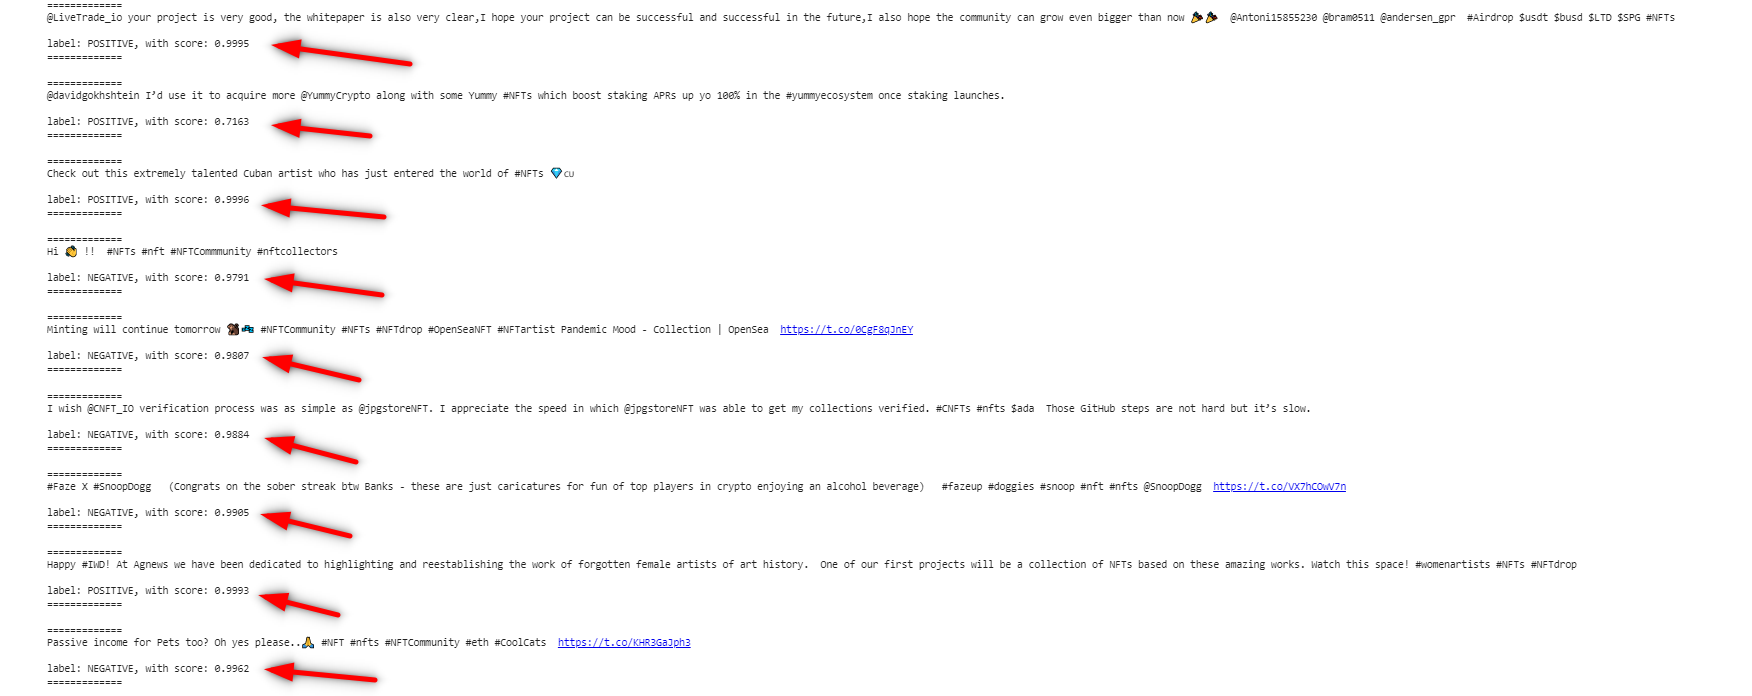


**Showing Sentiment Analysis Type and Sentiment_Score**

**The highest possible score for a Positive or Negative Sentiment Type is 1.00**

**The lowest possible score for a Positive or Negative Sentiment Type is 0.00**

**For example a tweet labeled as Positive as a Sentiment Type and a score of 0.9976 is a highly Positive Tweet**

**Another example is a tweet labeled as Positive Sentiment Type and has a score of 0.456 means that the tweet is a middle ranked Positivity Tweet since 1.00 is the highest possible score and 0.456 is almost half of 1.00**

**Another example is a tweet labeled as Negative Sentiment Type and has a score of 0.50 means that the tweet is a middle ranked Negativity Tweet since 1.00 is the highest possible score and 0.50 is half of 1.00**

In [34]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #nfts

ind = 0
for result in results:
    print('=============')
    print((tweet_list[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

🚨🚨🚨  Introducing our second 1/1 wizard reveal. Meet Turgen, protector of the Mines of Ether, Commander of the Mountains of Thoobull, son of Cultheer.   A wizard with great gifts and even greater responsibilities.  #foretheen #nft #nfts #nftdrop #nftcommunity #nftcollection  https://t.co/imNT54GAy8

label: POSITIVE, with score: 0.9976

Hi I'm "Tiger" from AniBots collection🐅 You can find me on @opensea   That's me and you can discover my other friends in the collection. Please Retweet me!  https://t.co/KDqVke7bbj #NFT #NFTCommunity #nftcollector #nftart #NFTProject #NFTs #OpenSeaNFT #support #Tiger

label: NEGATIVE, with score: 0.6635

Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhyvEeA  #NFT #NFTs #NFTCommunity  https://t.co/RlgK3zKG8u

label: NEGATIVE, with score: 0.9938

'soldier 022' is now listed for 0.07Eth on the polygon Network @opensea 🥳🥳   https://t.co/2Ny1KFBKMj . #opensea #nft #NFTs #nftartist #NFTCommunity

label: NEGATIVE, with score: 0.995

#psychokitties #NFTs #TwitterSpa

***TWINT search on hashtag  2)#nft***

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [35]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#nft'

e.Since ='2022-03-05'
e.Until ='2022-03-06'

e.Limit = 17
# Run
e.Pandas = True
e.Debug = True

twt_df2 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1500259848704909314 2022-03-05 23:59:56 +0000 <Brewthatiscold> Throwback to 2014, the first picture that is influencing the current series I'm working on to be released as an NFT. #nft #nftart #nftdrawing #drawing #art #penonpaper #brewthatiscold #cøldbrew   https://t.co/raX4XD5xJl
1500259827980845058 2022-03-05 23:59:51 +0000 <brooily> Leas than a month in the #nft space and I’ve learned so much…can’t imagine what It’ll be like in a year 😁
1500259823580946440 2022-03-05 23:59:50 +0000 <NftKiryu> gm✨ 今日は深夜に世界に向けて 宣伝活動してました✨ 地球上の誰か1人でいいので 自分のNFTを気にって頂ければ 幸せです😊  #NFT#giveaway#リプ欄#宣伝枠   https://t.co/ooBt8gJUs4
1500259814466748416 2022-03-05 23:59:47 +0000 <Estim8edProphet> the good &amp; the bad. working out of #SohoHouse today. when you start talking #NFT everyone wants to connect 🙌. but no work gets done 😒. #FirstWorldProblems
1500259807932166151 2022-03-05 23:59:46 +0000 <PurpleOrangeNFT> This special #FTLApples #71 / 300 was created by @feeltheline in support of people of #Ukraine   🇺

**Functions that shows all the column names of the dataframe**

In [36]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #nft**

In [37]:
tweet_df2 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df2

date         username  \
0  2022-03-05 23:59:56   Brewthatiscold   
1  2022-03-05 23:59:51          brooily   
2  2022-03-05 23:59:50         NftKiryu   
3  2022-03-05 23:59:47  Estim8edProphet   
4  2022-03-05 23:59:46  PurpleOrangeNFT   
5  2022-03-05 23:59:44        RalphLgnd   
6  2022-03-05 23:59:42   crypto_skull_0   
7  2022-03-05 23:59:42  BladeRunnerPunk   

                                               tweet  \
0  Throwback to 2014, the first picture that is i...   
1  Leas than a month in the #nft space and I’ve l...   
2  gm✨ 今日は深夜に世界に向けて 宣伝活動してました✨ 地球上の誰か1人でいいので 自分のN...   
3  the good &amp; the bad. working out of #SohoHo...   
4  This special #FTLApples #71 / 300 was created ...   
5  Super Hype right now!! I jus sold my 1st #NFT ...   
6  I am selling crypto skull (3D) on open sea  ht...   
7  BRUNK BACKS SNEAK PEEK!  Yes, some Brunks just...   

                                            hashtags  nlikes  
0  [nft, nftart, nftdrawing, drawing, art, penonp...       4  
1                                              [nft]       5  
2                                                 []       1  
3               [sohohouse, nft, firstworldproblems]       5  
4  [ftlapples, ukraine, nfts, nftcollection, nftd...      14  
5                                              [nft]       8  
6                                     [nft, opensea]      24  
7  [nft, nftcommunity, nftwhitelist, brunks, blad...      48

**Created Dataframe that displays the tweets from HashTag #nft**

In [38]:
tweet_list2 = tweet_df2['tweet'].tolist()
tweet_list2

["Throwback to 2014, the first picture that is influencing the current series I'm working on to be released as an NFT. #nft #nftart #nftdrawing #drawing #art #penonpaper #brewthatiscold #cøldbrew   https://t.co/raX4XD5xJl",
 'Leas than a month in the #nft space and I’ve learned so much…can’t imagine what It’ll be like in a year 😁',
 'gm✨ 今日は深夜に世界に向けて 宣伝活動してました✨ 地球上の誰か1人でいいので 自分のNFTを気にって頂ければ 幸せです😊  #NFT#giveaway#リプ欄#宣伝枠   https://t.co/ooBt8gJUs4',
 'the good &amp; the bad. working out of #SohoHouse today. when you start talking #NFT everyone wants to connect 🙌. but no work gets done 😒. #FirstWorldProblems',
 'This special #FTLApples #71 / 300 was created by @feeltheline in support of people of #Ukraine   🇺🇦OpenSea:  https://t.co/pAIMLvfsWA  #NFTs #NFTCollection  #NFTdrop  #NFTartist  #NFTProject  #nftart  #NFT #NFTCollector #cryptoart #nftcollectors  #NFTCommunity  #ukrainenft #ETH  https://t.co/EmtCD8e4zt',
 'Super Hype right now!! I jus sold my 1st #NFT item!! from my Smilies &amp; Mo

In [39]:
print(len(tweet_list2))
# prints the amount of tweets in tweet_list2

8


In [40]:
# doing preprocessing for twitter search of hashtag #nft
results2 = sentiment_classifier(tweet_df2['tweet'].tolist())
print(len(results2))

8


In [41]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #nft

ind = 0
for result in results2:
    print('=============')
    print((tweet_list2[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Throwback to 2014, the first picture that is influencing the current series I'm working on to be released as an NFT. #nft #nftart #nftdrawing #drawing #art #penonpaper #brewthatiscold #cøldbrew   https://t.co/raX4XD5xJl

label: NEGATIVE, with score: 0.6861

Leas than a month in the #nft space and I’ve learned so much…can’t imagine what It’ll be like in a year 😁

label: POSITIVE, with score: 0.9853

gm✨ 今日は深夜に世界に向けて 宣伝活動してました✨ 地球上の誰か1人でいいので 自分のNFTを気にって頂ければ 幸せです😊  #NFT#giveaway#リプ欄#宣伝枠   https://t.co/ooBt8gJUs4

label: NEGATIVE, with score: 0.9869

the good &amp; the bad. working out of #SohoHouse today. when you start talking #NFT everyone wants to connect 🙌. but no work gets done 😒. #FirstWorldProblems

label: NEGATIVE, with score: 0.9961

This special #FTLApples #71 / 300 was created by @feeltheline in support of people of #Ukraine   🇺🇦OpenSea:  https://t.co/pAIMLvfsWA  #NFTs #NFTCollection  #NFTdrop  #NFTartist  #NFTProject  #nftart  #NFT #NFTCollector #cryptoart #nftcollectors  #NFT

**TWINT search for hashtag 3)#nftart**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [42]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#nftart'

e.Since ='2022-03-06'
e.Until ='2022-03-07'

e.Limit = 17
# Run
e.Pandas = True
e.Debug = True

twt_df3 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1500622237933744131 2022-03-06 23:59:56 +0000 <SNakhlar> Abstract canva 🎨🖼 https://t.co/LACgdJo5W2 #nftart #nft #nftcommunity
1500622203275997184 2022-03-06 23:59:48 +0000 <GraphicNakamura> GM🍄Look at that. Isn't it amazing? どうだい見てくれすげーだろ Check out this item on OpenSea  https://t.co/rcrsLkzt0u @openseaより   #cryptoart #NFT #cryptoartist #ETH #NFTs #NFTart #NFTartists #nftcollectors #nftcollector #NFTCommunity  #NFTJPN #nftasia  https://t.co/9j9jj35SXE
1500622180807282688 2022-03-06 23:59:42 +0000 <Mada_nft> It's like the magic when you see it and close your eyes you will know why i called it the magic   https://t.co/iUlsQNmy26 #NFTGiveaway #NFTCommunity #nftart #NFTartist  https://t.co/Wme9R8gWVQ
1500622177921642500 2022-03-06 23:59:42 +0000 <MegadonB> So there's more ... #NFT #NFTs #NFTCommunity #nftart #NFTCollection #NFTdrop @BabyApeBeast #STAYBAB  https://t.co/o6Bwr1Mg8D
1500622101795028994 2022-03-06 23:59:23 +0000 <chavex_co> CryptoGirafas #37 🦒☮️  #nftart #nftcollector #nft #NFTC

**Functions that shows all the column names of the dataframe**

In [44]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #nftart**

In [45]:
tweet_df3 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df3

date         username  \
0  2022-03-06 23:59:56         SNakhlar   
1  2022-03-06 23:59:48  GraphicNakamura   
2  2022-03-06 23:59:42         Mada_nft   
3  2022-03-06 23:59:42         MegadonB   
4  2022-03-06 23:59:23        chavex_co   
5  2022-03-06 23:59:22      TraceyJose5   
6  2022-03-06 23:59:20    russmillernft   
7  2022-03-06 23:59:08    NFTRepository   

                                               tweet  \
0  Abstract canva 🎨🖼 https://t.co/LACgdJo5W2 #nft...   
1  GM🍄Look at that. Isn't it amazing? どうだい見てくれすげー...   
2  It's like the magic when you see it and close ...   
3  So there's more ... #NFT #NFTs #NFTCommunity #...   
4  CryptoGirafas #37 🦒☮️  #nftart #nftcollector #...   
5  @MetaMythicsNFT It's $MAGIC, don't miss out......   
6  #nft #nftart #nftcommunity #pinkfloyd #rogerwa...   
7  👉 “Consumed”   👉 0.10 ETH   👉 Created by: @ami...   

                                            hashtags  nlikes  
0                        [nftart, nft, nftcommunity]       5  
1  [cryptoart, nft, cryptoartist, eth, nfts, nfta...      11  
2     [nftgiveaway, nftcommunity, nftart, nftartist]       1  
3  [nft, nfts, nftcommunity, nftart, nftcollectio...       7  
4  [nftart, nftcollector, nft, nftcollection, ope...       9  
5                     [arbitrum, wlgiveaway, nftart]       1  
6  [nft, nftart, nftcommunity, pinkfloyd, rogerwa...       6  
7                        [nft, nftart, nftcommunity]      13

**Created Dataframe that displays the tweets from HashTag #nftart**

In [46]:
tweet_list3 = tweet_df3['tweet'].tolist()
tweet_list3

['Abstract canva 🎨🖼 https://t.co/LACgdJo5W2 #nftart #nft #nftcommunity',
 "GM🍄Look at that. Isn't it amazing? どうだい見てくれすげーだろ Check out this item on OpenSea  https://t.co/rcrsLkzt0u @openseaより   #cryptoart #NFT #cryptoartist #ETH #NFTs #NFTart #NFTartists #nftcollectors #nftcollector #NFTCommunity  #NFTJPN #nftasia  https://t.co/9j9jj35SXE",
 "It's like the magic when you see it and close your eyes you will know why i called it the magic   https://t.co/iUlsQNmy26 #NFTGiveaway #NFTCommunity #nftart #NFTartist  https://t.co/Wme9R8gWVQ",
 "So there's more ... #NFT #NFTs #NFTCommunity #nftart #NFTCollection #NFTdrop @BabyApeBeast #STAYBAB  https://t.co/o6Bwr1Mg8D",
 'CryptoGirafas #37 🦒☮️  #nftart #nftcollector #nft #NFTCollection #OpenSeaNFT #NFTCommunity #NFTinvestor   Check out this item on OpenSea  https://t.co/WtKFacOzCP via @opensea',
 "@MetaMythicsNFT It's $MAGIC, don't miss out... #arbitrum #WLGiveaway #nftart   @AGuyHasNoName17  be here",
 '#nft #nftart #nftcommunity #pinkfloyd #rog

In [47]:
print(len(tweet_list3))
# prints the amount of tweets in tweet_list3

8


In [48]:
# doing preprocessing for twitter search of hashtag #nftart
results3 = sentiment_classifier(tweet_df3['tweet'].tolist())
print(len(results3))

8


In [49]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #nftart

ind = 0
for result in results3:
    print('=============')
    print((tweet_list3[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Abstract canva 🎨🖼 https://t.co/LACgdJo5W2 #nftart #nft #nftcommunity

label: NEGATIVE, with score: 0.9941

GM🍄Look at that. Isn't it amazing? どうだい見てくれすげーだろ Check out this item on OpenSea  https://t.co/rcrsLkzt0u @openseaより   #cryptoart #NFT #cryptoartist #ETH #NFTs #NFTart #NFTartists #nftcollectors #nftcollector #NFTCommunity  #NFTJPN #nftasia  https://t.co/9j9jj35SXE

label: NEGATIVE, with score: 0.9885

It's like the magic when you see it and close your eyes you will know why i called it the magic   https://t.co/iUlsQNmy26 #NFTGiveaway #NFTCommunity #nftart #NFTartist  https://t.co/Wme9R8gWVQ

label: POSITIVE, with score: 0.9884

So there's more ... #NFT #NFTs #NFTCommunity #nftart #NFTCollection #NFTdrop @BabyApeBeast #STAYBAB  https://t.co/o6Bwr1Mg8D

label: NEGATIVE, with score: 0.9959

CryptoGirafas #37 🦒☮️  #nftart #nftcollector #nft #NFTCollection #OpenSeaNFT #NFTCommunity #NFTinvestor   Check out this item on OpenSea  https://t.co/WtKFacOzCP via @opensea

label: NEGATIVE, wit

**TWINT search for hashtag 4)#nftcommunity**

**Reminder that you may need to rerun the search cell a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [54]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#nftcommunity'

e.Since ='2022-03-07'
e.Until ='2022-03-08'

e.Limit = 9
# Run
e.Pandas = True
e.Debug = True

twt_df4 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1500984625283407879 2022-03-07 23:59:56 +0000 <RoyalCats_NFT> Our Website is LIVE🔥  https://t.co/QlKi1yF1mt WAGMI👑  #NFTs #NFT #NFTCommunity #NFTProject
1500984601908547591 2022-03-07 23:59:50 +0000 <cuteskull22> Look at this beauty 😍😍  #nft #nfts #nftart #nftcommunity #nftcollector #nftcollectibles #nftdrop
1500984599018864642 2022-03-07 23:59:50 +0000 <ansillustration> Hello #NFTcommunity #NFTcollector "Best friend" Auction Live 11h Left Current Bid 0.6 #Solana  Let's go! There's still a time. @idnft_ @NFTindonesia_ @NFTAsiaOfficial @metarupa_nft @SolanaIndonesia @solana  https://t.co/1KmOla6Ie7
1500984586255446018 2022-03-07 23:59:46 +0000 <EllensohnStefan> Check out Woman 36 by 9514862 at  https://t.co/wI2eIg81Sr NFT!  https://t.co/8S70VplJin via @cryptocom  New Prices from 5 $ on:  https://t.co/qoC9dWmVmS #cro #cryptocomnft #cryptocurrency #Bitcoin #NFTCommunity #nft #NFTs #nftcollectors  #nftcollector #nftartist #nftart #NFTProject  https://t.co/hEyTXUcoZA
1500984578613391361 202

**Functions that shows all the column names of the dataframe**

In [55]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #nftcommunity**

In [56]:
tweet_df4 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df4

date         username  \
0  2022-03-07 23:59:56    RoyalCats_NFT   
1  2022-03-07 23:59:50      cuteskull22   
2  2022-03-07 23:59:50  ansillustration   
3  2022-03-07 23:59:46  EllensohnStefan   
4  2022-03-07 23:59:45        pork_phat   
5  2022-03-07 23:59:40       integlitch   
6  2022-03-07 23:59:30     hodlandshill   
7  2022-03-07 23:59:26       gamerx_nft   
8  2022-03-07 23:59:22      BBNFTArtist   

                                               tweet  \
0  Our Website is LIVE🔥  https://t.co/QlKi1yF1mt ...   
1  Look at this beauty 😍😍  #nft #nfts #nftart #nf...   
2  Hello #NFTcommunity #NFTcollector "Best friend...   
3  Check out Woman 36 by 9514862 at  https://t.co...   
4  @Doodle_Doggies making moves! Growing their #N...   
5  合 隼 隼 9 る 他 て 何 て 9 [9]  750x750, gif, 2021 1 ...   
6  👋 Who's someone in the #Bitcoin, #Blockchain, ...   
7  Always love the Twitter spaces from @TheEsport...   
8  You can now list your CryptoCactus 🌵 for secon...   

                                            hashtags  nlikes  
0              [nfts, nft, nftcommunity, nftproject]      10  
1  [nft, nfts, nftart, nftcommunity, nftcollector...       4  
2               [nftcommunity, nftcollector, solana]       1  
3  [cro, cryptocomnft, cryptocurrency, bitcoin, n...       9  
4                                     [nftcommunity]       1  
5           [nft, openseanft, nftdrop, nftcommunity]       0  
6  [bitcoin, blockchain, crypto, defi, nft, nftco...       0  
7                        [nftgiveaway, nftcommunity]       4  
8  [magiceden, nftart, nftcommunity, nft, solanan...       9

**Created Dataframe that displays the tweets from HashTag #nftcommunity**

In [57]:
tweet_list4 = tweet_df4['tweet'].tolist()
tweet_list4

['Our Website is LIVE🔥  https://t.co/QlKi1yF1mt WAGMI👑  #NFTs #NFT #NFTCommunity #NFTProject',
 'Look at this beauty 😍😍  #nft #nfts #nftart #nftcommunity #nftcollector #nftcollectibles #nftdrop',
 'Hello #NFTcommunity #NFTcollector "Best friend" Auction Live 11h Left Current Bid 0.6 #Solana  Let\'s go! There\'s still a time. @idnft_ @NFTindonesia_ @NFTAsiaOfficial @metarupa_nft @SolanaIndonesia @solana  https://t.co/1KmOla6Ie7',
 'Check out Woman 36 by 9514862 at  https://t.co/wI2eIg81Sr NFT!  https://t.co/8S70VplJin via @cryptocom  New Prices from 5 $ on:  https://t.co/qoC9dWmVmS #cro #cryptocomnft #cryptocurrency #Bitcoin #NFTCommunity #nft #NFTs #nftcollectors  #nftcollector #nftartist #nftart #NFTProject  https://t.co/hEyTXUcoZA',
 '@Doodle_Doggies making moves! Growing their #NFTCommunity  organically! 🐶🤘   https://t.co/WjR9TzIK8V',
 '合 隼 隼 9 る 他 て 何 て 9 [9]  750x750, gif, 2021 1 of 1 0.01ETH  Now available on OpenSea  #NFT #openseaNFT #NFTdrop #NFTcommunity  https://t.co/JR3AJhpr

In [58]:
print(len(tweet_list4))
# prints the amount of tweets in tweet_list4

9


In [59]:
# doing preprocessing for twitter search of hashtag #nftcommunity
results4 = sentiment_classifier(tweet_df4['tweet'].tolist())
print(len(results4))

9


In [60]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #nftcommunity

ind = 0
for result in results4:
    print('=============')
    print((tweet_list4[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Our Website is LIVE🔥  https://t.co/QlKi1yF1mt WAGMI👑  #NFTs #NFT #NFTCommunity #NFTProject

label: NEGATIVE, with score: 0.9965

Look at this beauty 😍😍  #nft #nfts #nftart #nftcommunity #nftcollector #nftcollectibles #nftdrop

label: NEGATIVE, with score: 0.6321

Hello #NFTcommunity #NFTcollector "Best friend" Auction Live 11h Left Current Bid 0.6 #Solana  Let's go! There's still a time. @idnft_ @NFTindonesia_ @NFTAsiaOfficial @metarupa_nft @SolanaIndonesia @solana  https://t.co/1KmOla6Ie7

label: NEGATIVE, with score: 0.9962

Check out Woman 36 by 9514862 at  https://t.co/wI2eIg81Sr NFT!  https://t.co/8S70VplJin via @cryptocom  New Prices from 5 $ on:  https://t.co/qoC9dWmVmS #cro #cryptocomnft #cryptocurrency #Bitcoin #NFTCommunity #nft #NFTs #nftcollectors  #nftcollector #nftartist #nftart #NFTProject  https://t.co/hEyTXUcoZA

label: NEGATIVE, with score: 0.9947

@Doodle_Doggies making moves! Growing their #NFTCommunity  organically! 🐶🤘   https://t.co/WjR9TzIK8V

label: POSITIVE, wi

**TWINT search for hashtag 5)#nftcollector**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [65]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#nftcollector'

e.Since ='2022-03-08'
e.Until ='2022-03-09'

e.Limit = 5
# Run
e.Pandas = True
e.Debug = True

twt_df5 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1501346885948215299 2022-03-08 23:59:25 +0000 <El_MonteChristo> Have you ever seen a haunted house? A real one? How about an entire village? What stories do each of them hide? 🧐  Part of my "Eyes" Collection, now available! :D   https://t.co/6Jqv0oP2yi  #nft #nfts #nftart #nftartist #cryptoart #nftcommunity #nftcollector #nftcollection
1501346828624793605 2022-03-08 23:59:12 +0000 <NftZoko> 🚀🚀🚀CyberPunk Fighters is collection that contains 10 000 fighters. There are a few species: super heroes, humanoids, robots, amazons, other entities.🔟5⃣5⃣5⃣ #nft #nftart #nftartist #nftcollector #nftcommunity #nftcollectibles #nftdrop #nftbuyer  https://t.co/abAWnJrMld
1501346554522873856 2022-03-08 23:58:06 +0000 <Lena_Jacob_art> Hi frens don’t miss out on this Colorful abstract girl cutie Athena 💗 she will be the only one signed by Jacob in this collection 🤩 go go and check her out 💙   https://t.co/Oc0qDenGfn  #nft #NFTCommunity #nftart #nftkids #nftcollector #NFTCollection  https://t.co/Rsfv5sHgr

**Functions that shows all the column names of the dataframe**

In [66]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #nftcollector**

In [67]:
tweet_df5 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df5

date         username  \
0  2022-03-08 23:59:25  El_MonteChristo   
1  2022-03-08 23:59:12          NftZoko   
2  2022-03-08 23:58:06   Lena_Jacob_art   
3  2022-03-08 23:57:50        RWezenaar   
4  2022-03-08 23:56:47    bruno_messina   
5  2022-03-08 23:56:29       rayninsyde   
6  2022-03-08 23:56:08         nft_yuna   

                                               tweet  \
0  Have you ever seen a haunted house? A real one...   
1  🚀🚀🚀CyberPunk Fighters is collection that conta...   
2  Hi frens don’t miss out on this Colorful abstr...   
3  ⚡ Tanah Lot ⚡  Part of my Sunset Series  ➡ 50%...   
4  Mirror Vision, check out my collection!   @ope...   
5  Picked up “ancient gate” thank you @diptya ! #...   
6  I’m currently doing  commissioned pet portrait...   

                                            hashtags  nlikes  
0  [nft, nfts, nftart, nftartist, cryptoart, nftc...       8  
1  [nft, nftart, nftartist, nftcollector, nftcomm...      11  
2  [nft, nftcommunity, nftart, nftkids, nftcollec...      23  
3  [nftcommunity, artwork, nft, nftart, sunset, n...       0  
4  [nfts, nftcommumity, nftfamily, nftcollector, ...       9  
5                       [nftcollector, nftcommunity]       7  
6  [nft, nftart, nftcollector, nftartist, nftcomm...      12

**Created Dataframe that displays the tweets from HashTag #nftcollector**

In [68]:
tweet_list5 = tweet_df5['tweet'].tolist()
tweet_list5

['Have you ever seen a haunted house? A real one? How about an entire village? What stories do each of them hide? 🧐  Part of my "Eyes" Collection, now available! :D   https://t.co/6Jqv0oP2yi  #nft #nfts #nftart #nftartist #cryptoart #nftcommunity #nftcollector #nftcollection',
 '🚀🚀🚀CyberPunk Fighters is collection that contains 10 000 fighters. There are a few species: super heroes, humanoids, robots, amazons, other entities.🔟5⃣5⃣5⃣ #nft #nftart #nftartist #nftcollector #nftcommunity #nftcollectibles #nftdrop #nftbuyer  https://t.co/abAWnJrMld',
 'Hi frens don’t miss out on this Colorful abstract girl cutie Athena 💗 she will be the only one signed by Jacob in this collection 🤩 go go and check her out 💙   https://t.co/Oc0qDenGfn  #nft #NFTCommunity #nftart #nftkids #nftcollector #NFTCollection  https://t.co/Rsfv5sHgrL',
 '⚡ Tanah Lot ⚡  Part of my Sunset Series  ➡ 50% of sales will go back into the #NFTCommunity  👇 click 👇  https://t.co/XHmtGMKdgv #artwork #NFT #NFTart #sunset #nftcolle

In [69]:
print(len(tweet_list5))
# prints the amount of tweets in tweet_list5

7


In [70]:
# doing preprocessing for twitter search of hashtag #nftcollector
results5 = sentiment_classifier(tweet_df5['tweet'].tolist())
print(len(results5))

7


In [71]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #nftcollector

ind = 0
for result in results5:
    print('=============')
    print((tweet_list5[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Have you ever seen a haunted house? A real one? How about an entire village? What stories do each of them hide? 🧐  Part of my "Eyes" Collection, now available! :D   https://t.co/6Jqv0oP2yi  #nft #nfts #nftart #nftartist #cryptoart #nftcommunity #nftcollector #nftcollection

label: NEGATIVE, with score: 0.9953

🚀🚀🚀CyberPunk Fighters is collection that contains 10 000 fighters. There are a few species: super heroes, humanoids, robots, amazons, other entities.🔟5⃣5⃣5⃣ #nft #nftart #nftartist #nftcollector #nftcommunity #nftcollectibles #nftdrop #nftbuyer  https://t.co/abAWnJrMld

label: NEGATIVE, with score: 0.9398

Hi frens don’t miss out on this Colorful abstract girl cutie Athena 💗 she will be the only one signed by Jacob in this collection 🤩 go go and check her out 💙   https://t.co/Oc0qDenGfn  #nft #NFTCommunity #nftart #nftkids #nftcollector #NFTCollection  https://t.co/Rsfv5sHgrL

label: POSITIVE, with score: 0.9902

⚡ Tanah Lot ⚡  Part of my Sunset Series  ➡ 50% of sales will go bac

**TWINT search for hashtag 6)#NFTS**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [72]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTS'

e.Since ='2022-03-09'
e.Until ='2022-03-10'

e.Limit = 9
# Run
e.Pandas = True
e.Debug = True

twt_df6 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1501709415421857792 2022-03-09 23:59:59 +0000 <Junojun5>  https://t.co/Kc7SDJTHoC #NFTs #Collectibles #Rare #Beautiful #Girl
1501709403493437446 2022-03-09 23:59:56 +0000 <Weirdo_Egg_NFTs> Free Weird Egg #256 #NFT AirDrop! 🔔 0.07 ETH  ✅ ❤️ &amp; RT  ✅ Follow @Weirdo_Egg_NFTs  ✅ Tag 3 friends ✅ Drop your $ETH address in the replies. 24H ⏰  I'll be airdropping this NFT to a random wallet 🎁 Good Luck 🎉 #NFTs #NFTGiveaway #NFT  https://t.co/xaIZAMYyTn
1501709392441659394 2022-03-09 23:59:54 +0000 <ngenge0807> Any other good projects aside from @Imaginary_Ones ??  #NFTs #nftart #NFTCommunity #NFTProject
1501709390268616707 2022-03-09 23:59:53 +0000 <NFTATW> 🚀🚀Goin On The Moon We are anticipating tons of cool collabs with exciting brands in the travel space -Airlines, Travel Promoters, Airbnb, Hotels, Tourism Boards etc. Worldwide.  See Here👇👇  https://t.co/3FAScMe6T3 #NFT #NFTs #NFTGiveaway #Cryptos #cryptotrading #NFTdrops  https://t.co/OTjhe83PRN
1501709388301537281 2022-03-09 23:59:53 +0

**Functions that shows all the column names of the dataframe**

In [73]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTS**

In [74]:
tweet_df6 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df6

date         username  \
0  2022-03-09 23:59:59         Junojun5   
1  2022-03-09 23:59:56  Weirdo_Egg_NFTs   
2  2022-03-09 23:59:54       ngenge0807   
3  2022-03-09 23:59:53           NFTATW   
4  2022-03-09 23:59:53        Mr_Dawg32   
5  2022-03-09 23:59:46  overthinkersart   
6  2022-03-09 23:59:41     RealLitVirus   
7  2022-03-09 23:59:30    nftradersclub   

                                               tweet  \
0   https://t.co/Kc7SDJTHoC #NFTs #Collectibles #...   
1  Free Weird Egg #256 #NFT AirDrop! 🔔 0.07 ETH  ...   
2  Any other good projects aside from @Imaginary_...   
3  🚀🚀Goin On The Moon We are anticipating tons of...   
4  Follow @Mr_Dawg32  And become a member of Dawg...   
5  To all the overthinkers out there. 💯  #NFTComm...   
6  #NFT #NFTs #nftart  #NFTartist  #NFTCollection...   
7  Azuki NFT holders minted  11 pcs   ChipArt @ar...   

                                            hashtags  nlikes  
0        [nfts, collectibles, rare, beautiful, girl]       2  
1                      [nft, nfts, nftgiveaway, nft]      21  
2           [nfts, nftart, nftcommunity, nftproject]       3  
3  [nft, nfts, nftgiveaway, cryptos, cryptotradin...      32  
4                 [nft, nfts, nftart, nftcollection]       7  
5      [nftcommunity, nftart, nft, nfts, otsgallery]       8  
6  [nft, nfts, nftart, nftartist, nftcollection, ...       3  
7                                        [nft, nfts]       5

In [75]:
tweet_list6 = tweet_df6['tweet'].tolist()
tweet_list6

[' https://t.co/Kc7SDJTHoC #NFTs #Collectibles #Rare #Beautiful #Girl',
 "Free Weird Egg #256 #NFT AirDrop! 🔔 0.07 ETH  ✅ ❤️ &amp; RT  ✅ Follow @Weirdo_Egg_NFTs  ✅ Tag 3 friends ✅ Drop your $ETH address in the replies. 24H ⏰  I'll be airdropping this NFT to a random wallet 🎁 Good Luck 🎉 #NFTs #NFTGiveaway #NFT  https://t.co/xaIZAMYyTn",
 'Any other good projects aside from @Imaginary_Ones ??  #NFTs #nftart #NFTCommunity #NFTProject',
 '🚀🚀Goin On The Moon We are anticipating tons of cool collabs with exciting brands in the travel space -Airlines, Travel Promoters, Airbnb, Hotels, Tourism Boards etc. Worldwide.  See Here👇👇  https://t.co/3FAScMe6T3 #NFT #NFTs #NFTGiveaway #Cryptos #cryptotrading #NFTdrops  https://t.co/OTjhe83PRN',
 'Follow @Mr_Dawg32  And become a member of Dawgs Community \U0001f90d  #NFT #NFTs #NFTart #NFTCollection  https://t.co/ktwUhFuZtL',
 'To all the overthinkers out there. 💯  #NFTCommunity #nftart #NFT #NFTs #otsgallery  https://t.co/1ZDdRVrKC2',
 '#NFT #NFTs #nf

In [76]:
print(len(tweet_list6))
# prints the amount of tweets in tweet_list6

8


In [77]:
# doing preprocessing for twitter search of hashtag #NFTS
results6 = sentiment_classifier(tweet_df6['tweet'].tolist())
print(len(results6))

8


In [78]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #NFTS

ind = 0
for result in results6:
    print('=============')
    print((tweet_list6[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

 https://t.co/Kc7SDJTHoC #NFTs #Collectibles #Rare #Beautiful #Girl

label: NEGATIVE, with score: 0.6633

Free Weird Egg #256 #NFT AirDrop! 🔔 0.07 ETH  ✅ ❤️ &amp; RT  ✅ Follow @Weirdo_Egg_NFTs  ✅ Tag 3 friends ✅ Drop your $ETH address in the replies. 24H ⏰  I'll be airdropping this NFT to a random wallet 🎁 Good Luck 🎉 #NFTs #NFTGiveaway #NFT  https://t.co/xaIZAMYyTn

label: NEGATIVE, with score: 0.9963

Any other good projects aside from @Imaginary_Ones ??  #NFTs #nftart #NFTCommunity #NFTProject

label: NEGATIVE, with score: 0.9983

🚀🚀Goin On The Moon We are anticipating tons of cool collabs with exciting brands in the travel space -Airlines, Travel Promoters, Airbnb, Hotels, Tourism Boards etc. Worldwide.  See Here👇👇  https://t.co/3FAScMe6T3 #NFT #NFTs #NFTGiveaway #Cryptos #cryptotrading #NFTdrops  https://t.co/OTjhe83PRN

label: POSITIVE, with score: 0.9456

Follow @Mr_Dawg32  And become a member of Dawgs Community 🤍  #NFT #NFTs #NFTart #NFTCollection  https://t.co/ktwUhFuZtL

labe

**Reminder, here are the hashtags I will being doing searches on in order:
1)#nfts, 2)#nft, 3)#nftart, 4)#nftcommunity, 5)#nftcollector, 6)#NFTS, 7)#NFT,
8)#NFTCommunity, 9)#NFTcommunity, 10)#nftgiveaway, 11)#NFTGiveaway, 12)#metaverse, 13)#web3, 14)#NFTCollection, 15)#NFTGame, 16)#NFTdrop, 17)#NFTartists, 18)#NFTProject, 19)#NFTMarketplace,20)#NFTdrops**

**TWINT search for hashtag 7)#NFT**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [82]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFT'

e.Since ='2022-03-10'
e.Until ='2022-03-11'

e.Limit = 7
# Run
e.Pandas = True
e.Debug = True

twt_df7 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1502071770924425219 2022-03-10 23:59:51 +0000 <nftdreami> Looking for cool #NFT to learn!! Drop your #NFTs 🔥👀☄️
1502071768273629188 2022-03-10 23:59:51 +0000 <hodlandshill> 👋 Who's someone in the #Bitcoin, #Blockchain, #Crypto, #DeFi, #NFT #NFTCommunity that we should be following/know about? 🧠Don't overthink it! The first account that comes to mind, Tag 'em below! 👇
1502071766751285251 2022-03-10 23:59:50 +0000 <EnteKribo> EnteKribo #100322.2  Check out this item on OpenSea  https://t.co/Vm1uMRjWN1 lewat @opensea   #nft #nfts #openseanft #NFTCommunity #nftcollector #NFTCollection #nftart  https://t.co/ijWrTNlC2N
1502071756210724870 2022-03-10 23:59:48 +0000 <MonsterzDaoSale> Monsterz #3135 just sold for 0.14 SOL (11.62$)  at Magic Eden!  https://t.co/mqFcElanZc  @MonsterzDao #NFT #Solana #SolanaNFT  https://t.co/X1GI8yLw2p
1502071734111031296 2022-03-10 23:59:43 +0000 <akaDeAnimal> Click here to view NFTs of CH4EotB4 listed on the Panini Marketplace:  Hot collection prices starting at

**Functions that shows all the column names of the dataframe**

In [83]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for Hashtag #NFT**

In [84]:
tweet_df7 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df7

date         username  \
0  2022-03-10 23:59:51        nftdreami   
1  2022-03-10 23:59:51     hodlandshill   
2  2022-03-10 23:59:50        EnteKribo   
3  2022-03-10 23:59:48  MonsterzDaoSale   
4  2022-03-10 23:59:43      akaDeAnimal   
5  2022-03-10 23:59:41  ImmortalWriters   
6  2022-03-10 23:59:40       adolfochzs   

                                               tweet  \
0  Looking for cool #NFT to learn!! Drop your #NF...   
1  👋 Who's someone in the #Bitcoin, #Blockchain, ...   
2  EnteKribo #100322.2  Check out this item on Op...   
3  Monsterz #3135 just sold for 0.14 SOL (11.62$)...   
4  Click here to view NFTs of CH4EotB4 listed on ...   
5  In this #NFTCollection you will find unique #a...   
6  "Abstract Skull 💀" Digital collage, using GIFS...   

                                            hashtags  nlikes  
0                                        [nft, nfts]      55  
1  [bitcoin, blockchain, crypto, defi, nft, nftco...       6  
2  [nft, nfts, openseanft, nftcommunity, nftcolle...       6  
3                           [nft, solana, solananft]       3  
4                           [nft, nftsports, panini]       5  
5  [nftcollection, artworks, illustrations, write...       5  
6                            [nftcommunity, nft, ai]      11

In [85]:
tweet_list7 = tweet_df7['tweet'].tolist()
tweet_list7

['Looking for cool #NFT to learn!! Drop your #NFTs 🔥👀☄️',
 "👋 Who's someone in the #Bitcoin, #Blockchain, #Crypto, #DeFi, #NFT #NFTCommunity that we should be following/know about? 🧠Don't overthink it! The first account that comes to mind, Tag 'em below! 👇",
 'EnteKribo #100322.2  Check out this item on OpenSea  https://t.co/Vm1uMRjWN1 lewat @opensea   #nft #nfts #openseanft #NFTCommunity #nftcollector #NFTCollection #nftart  https://t.co/ijWrTNlC2N',
 'Monsterz #3135 just sold for 0.14 SOL (11.62$)  at Magic Eden!  https://t.co/mqFcElanZc  @MonsterzDao #NFT #Solana #SolanaNFT  https://t.co/X1GI8yLw2p',
 'Click here to view NFTs of CH4EotB4 listed on the Panini Marketplace:  Hot collection prices starting at $1 #nft #nftsports #panini \u2066@PaniniAmerica\u2069   https://t.co/wKqW67SMR6',
 'In this #NFTCollection you will find unique #artworks, and #illustrations of #writers who created immortality and humanism in people with their works 📚 🎨   https://t.co/PklUaeyBmD #NFTCommunity #NFT

In [86]:
print(len(tweet_list7))
# prints the amount of tweets in tweet_list7

7


In [87]:
# doing preprocessing for twitter search of hashtag #NFT
results7 = sentiment_classifier(tweet_df7['tweet'].tolist())
print(len(results7))

7


In [88]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #NFT

ind = 0
for result in results7:
    print('=============')
    print((tweet_list7[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Looking for cool #NFT to learn!! Drop your #NFTs 🔥👀☄️

label: NEGATIVE, with score: 0.9823

👋 Who's someone in the #Bitcoin, #Blockchain, #Crypto, #DeFi, #NFT #NFTCommunity that we should be following/know about? 🧠Don't overthink it! The first account that comes to mind, Tag 'em below! 👇

label: NEGATIVE, with score: 0.9849

EnteKribo #100322.2  Check out this item on OpenSea  https://t.co/Vm1uMRjWN1 lewat @opensea   #nft #nfts #openseanft #NFTCommunity #nftcollector #NFTCollection #nftart  https://t.co/ijWrTNlC2N

label: NEGATIVE, with score: 0.9786

Monsterz #3135 just sold for 0.14 SOL (11.62$)  at Magic Eden!  https://t.co/mqFcElanZc  @MonsterzDao #NFT #Solana #SolanaNFT  https://t.co/X1GI8yLw2p

label: NEGATIVE, with score: 0.9989

Click here to view NFTs of CH4EotB4 listed on the Panini Marketplace:  Hot collection prices starting at $1 #nft #nftsports #panini ⁦@PaniniAmerica⁩   https://t.co/wKqW67SMR6

label: NEGATIVE, with score: 0.9964

In this #NFTCollection you will find uni

**TWINT search for hashtag 8)#NFTCommunity**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [98]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTCommunity'

e.Since ='2022-03-11'
e.Until ='2022-03-12'

e.Limit = 5
# Run
e.Pandas = True
e.Debug = True

twt_df8 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1502434175680397313 2022-03-11 23:59:56 +0000 <alter_minds> 💋 @MultversofWomen   #nfts #nftcommunity #MintingNow  https://t.co/wAQsgYAUVV
1502434173058908163 2022-03-11 23:59:55 +0000 <madelondegrave> GM 🌞 Yesterday’s outdoor gym views. Studios closed in HK? That doesn’t stop us 💦 #fitness #gm #Sundowns #NFTCommunity #HongKong #photography  https://t.co/Sgj1l0aovX
1502434166612414467 2022-03-11 23:59:53 +0000 <alligator_swamp> It's still EARLY!  🫱🏽‍🫲🏾Collabs are rolling  🎮Discord is growing  🐊2,500 Free Gators are waiting for your following  If our roadmap on Discord doesn't blow your mind, nothing will! #NFTCommunity #NFTGiveaway #NFTCollection #Sandbox #PolygonNFT
1502434154469859339 2022-03-11 23:59:50 +0000 <lem__ny> Appreciation post!! @KeithBotha2 Here’s to you, my boogie!! Who’s constantly loving on others—you’re loved!!   Keep shining, bright star!! #nftcommunity #defi #crypto #legend #blockchain #nftartist ✨🤍✨✨  https://t.co/BMVbYliBvP
1502434127634927616 2022-03-11 23:59:44 +

**Functions that shows all the column names of the dataframe**

In [99]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for Hashtag #NFTCommunity**

In [100]:
tweet_df8 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df8

date         username  \
0   2022-03-11 23:59:56      alter_minds   
1   2022-03-11 23:59:55   madelondegrave   
2   2022-03-11 23:59:53  alligator_swamp   
3   2022-03-11 23:59:50          lem__ny   
4   2022-03-11 23:59:44   DeadiLBiscione   
5   2022-03-11 23:59:42     hodlandshill   
6   2022-03-11 23:59:36  Jalals_arts_NFT   
7   2022-03-11 23:59:31       manomorphs   
8   2022-03-11 23:59:28        kosei2021   
9   2022-03-11 23:59:28   littledemonuae   
10  2022-03-11 23:59:26        mooversee   
11  2022-03-11 23:59:18      svmmerstein   
12  2022-03-11 23:59:15       Dyoungest_   
13  2022-03-11 23:59:11         DelusArt   
14  2022-03-11 23:59:11       SadApeArt1   

                                                tweet  \
0   💋 @MultversofWomen   #nfts #nftcommunity #Mint...   
1   GM 🌞 Yesterday’s outdoor gym views. Studios cl...   
2   It's still EARLY!  🫱🏽‍🫲🏾Collabs are rolling  🎮...   
3   Appreciation post!! @KeithBotha2 Here’s to you...   
4   💀🪦🧪🧟➡️ @The_DASK x @skeletonzgang 🤯🎁  #NFTComm...   
5   👋 Who's someone in the #Bitcoin, #Blockchain, ...   
6   Castle From 8000 Year ago #1/6, 2021  This is ...   
7   MINT IS LIVE! Head on over to  https://t.co/IW...   
8   結論だけ言います。 Chromeのポップアップブロックをopenseaのサイトだけ許可しまし...   
9   🚨 Who wants to win 1000$ 🚨  The winner will be...   
10  May you have sound sleep and wake up tomorrow ...   
11  @JunkieBurgerSC 🍔 wen “big mick”? 👀  #GoldenAr...   
12  $SINU ALL THE WAY  @sol_samoinu   #NFT #NFTs #...   
13  Pet Cave #002 - on @opensea   https://t.co/6WZ...   
14  time to draw some loud boi  #NFTCommunity   #N...   

                                             hashtags  nlikes  
0                    [nfts, nftcommunity, mintingnow]       3  
1   [fitness, gm, sundowns, nftcommunity, hongkong...      22  
2   [nftcommunity, nftgiveaway, nftcollection, san...       4  
3   [nftcommunity, defi, crypto, legend, blockchai...      50  
4                                [nftcommunity, nfts]      15  
5   [bitcoin, blockchain, crypto, defi, nft, nftco...       3  
6     [nftart, nftcommunity, nftcollector, nftartist]       4  
7   [solana, solananfts, nfts, nftcommunity, nftmi...      29  
8                   [ブログ, nft, nftcommunity, opensea]       4  
9   [nfldraft, nfts, nftcommunity, nftart, nftbook...       2  
10  [nfts, nftcommunity, solana, solananfts, magic...       7  
11  [goldenarcs, mcdowells, nft, nftcommunity, nft...       3  
12  [nft, nfts, nftcommunity, nftcollector, solana...       5  
13             [nft, nftart, nftartist, nftcommunity]      66  
14  [nftcommunity, nfts, nftart, nftartist, founda...      15

In [101]:
tweet_list8 = tweet_df8['tweet'].tolist()
tweet_list8

['💋 @MultversofWomen   #nfts #nftcommunity #MintingNow  https://t.co/wAQsgYAUVV',
 'GM 🌞 Yesterday’s outdoor gym views. Studios closed in HK? That doesn’t stop us 💦 #fitness #gm #Sundowns #NFTCommunity #HongKong #photography  https://t.co/Sgj1l0aovX',
 "It's still EARLY!  \U0001faf1🏽\u200d\U0001faf2🏾Collabs are rolling  🎮Discord is growing  🐊2,500 Free Gators are waiting for your following  If our roadmap on Discord doesn't blow your mind, nothing will! #NFTCommunity #NFTGiveaway #NFTCollection #Sandbox #PolygonNFT",
 'Appreciation post!! @KeithBotha2 Here’s to you, my boogie!! Who’s constantly loving on others—you’re loved!!   Keep shining, bright star!! #nftcommunity #defi #crypto #legend #blockchain #nftartist ✨\U0001f90d✨✨  https://t.co/BMVbYliBvP',
 '💀\U0001faa6🧪🧟➡️ @The_DASK x @skeletonzgang 🤯🎁  #NFTCommunity #NFTs  https://t.co/x5lPuB8SPd',
 "👋 Who's someone in the #Bitcoin, #Blockchain, #Crypto, #DeFi, #NFT #NFTCommunity that we should be following/know about? 🧠Don't overthink 

In [102]:
print(len(tweet_list8))
# prints the amount of tweets in tweet_list8

15


In [103]:
# doing preprocessing for twitter search of hashtag #NFTCommunity
results8 = sentiment_classifier(tweet_df8['tweet'].tolist())
print(len(results8))

15


In [104]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #NFTCommunity

ind = 0
for result in results8:
    print('=============')
    print((tweet_list8[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

💋 @MultversofWomen   #nfts #nftcommunity #MintingNow  https://t.co/wAQsgYAUVV

label: NEGATIVE, with score: 0.9948

GM 🌞 Yesterday’s outdoor gym views. Studios closed in HK? That doesn’t stop us 💦 #fitness #gm #Sundowns #NFTCommunity #HongKong #photography  https://t.co/Sgj1l0aovX

label: NEGATIVE, with score: 0.8638

It's still EARLY!  🫱🏽‍🫲🏾Collabs are rolling  🎮Discord is growing  🐊2,500 Free Gators are waiting for your following  If our roadmap on Discord doesn't blow your mind, nothing will! #NFTCommunity #NFTGiveaway #NFTCollection #Sandbox #PolygonNFT

label: NEGATIVE, with score: 0.9885

Appreciation post!! @KeithBotha2 Here’s to you, my boogie!! Who’s constantly loving on others—you’re loved!!   Keep shining, bright star!! #nftcommunity #defi #crypto #legend #blockchain #nftartist ✨🤍✨✨  https://t.co/BMVbYliBvP

label: POSITIVE, with score: 0.9997

💀🪦🧪🧟➡️ @The_DASK x @skeletonzgang 🤯🎁  #NFTCommunity #NFTs  https://t.co/x5lPuB8SPd

label: NEGATIVE, with score: 0.9958

👋 Who's som

**TWINT search for hashtag 9)#NFTcommunity**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [105]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTcommunity'

e.Since ='2022-03-12'
e.Until ='2022-03-13'

e.Limit = 12
# Run
e.Pandas = True
e.Debug = True

twt_df9 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1502796572593205253 2022-03-12 23:59:58 +0000 <erayerbay_nft> Reemergence of the Moraea the Dryad, in the woods of Sagnoca. 🌸  Now listed on @foundation 💫  ''When the time comes, I will become one with the Nature again.''  🔗 https://t.co/AYhjNpdE1Q  ▲●■ Price: 0.10 $ETH  #NFT #NFTCommunity #NFTartist #FoundationNFT #nftcollector #NFTs  https://t.co/Zho4gYfOlT
1502796571259588609 2022-03-12 23:59:57 +0000 <mhayfinityy> Looks like an alien cowboy 👽🤠  #NFTGiveaway #NFTCommunity #NFTartwork #NFTcollections
1502796560450609162 2022-03-12 23:59:55 +0000 <RWezenaar> If *I* had a hammer, there'd be no more folk singers.  #NFT #NFTs #NFTCommunity #art #cryptoartist
1502796551130738691 2022-03-12 23:59:53 +0000 <ShelleyShiller> Are we ready for a #DragonNFT drop on Sunday? Five new dragon #NFTs minted every Sunday!! Do you have #DiamondHands ? Check check out these hidden #BNB #NFTCommunity gems !!! First #NFTGiveaway tomorrow !! Each #nft is a raffle ticket  https://t.co/BOl2CIAFTC  https://t.c

**Functions that shows all the column names of the dataframe**

In [106]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for Hashtag #NFTcommunity**

In [107]:
tweet_df9 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df9

date         username  \
0   2022-03-12 23:59:58    erayerbay_nft   
1   2022-03-12 23:59:57      mhayfinityy   
2   2022-03-12 23:59:55        RWezenaar   
3   2022-03-12 23:59:53   ShelleyShiller   
4   2022-03-12 23:59:51       LitBirdies   
5   2022-03-12 23:59:50   princessoliana   
6   2022-03-12 23:59:48       ComNftartm   
7   2022-03-12 23:59:41        RNDM_GHST   
8   2022-03-12 23:59:37         somanxxx   
9   2022-03-12 23:59:30      O_Z_bananas   
10  2022-03-12 23:59:28  _TheFerretClub_   
11  2022-03-12 23:59:26        CableguyT   

                                                tweet  \
0   Reemergence of the Moraea the Dryad, in the wo...   
1   Looks like an alien cowboy 👽🤠  #NFTGiveaway #N...   
2   If *I* had a hammer, there'd be no more folk s...   
3   Are we ready for a #DragonNFT drop on Sunday? ...   
4   An untrampled scorpion troubles no one 🦂 #nfts...   
5   😂😂😂 #NFTCommunity #nftcollectors #NFTProject  ...   
6    https://t.co/52LXBAqqx9  Special Zombie NFT A...   
7   If you’re coming to @NFTLAlive, get here early...   
8   ❤️ Thanks @PrimeMatesBC #NFT #NFTS #NFTCOMMUNI...   
9    https://t.co/bSYZcAUJU8 #nft #NFTCommunity #N...   
10  #NFT #NFTs #nftcollector #NFTCommunity $ETH  E...   
11  Almost #Time #AntonymNFT @AntonymNFT @0xreuben...   

                                             hashtags  nlikes  
0   [nft, nftcommunity, nftartist, foundationnft, ...       6  
1   [nftgiveaway, nftcommunity, nftartwork, nftcol...       1  
2        [nft, nfts, nftcommunity, art, cryptoartist]       1  
3   [dragonnft, nfts, diamondhands, bnb, nftcommun...       8  
4   [nfts, nftart, eth, nftdrop, nftcommunity, air...      22  
5    [nftcommunity, nftcollectors, nftproject, funny]       3  
6                     [nftcommunity, nftproject, nft]       4  
7   [cyberpunkvol3, cyberpunk, nfts, nftcommunity,...      28  
8                           [nft, nfts, nftcommunity]       3  
9   [nft, nftcommunity, nftartist, nfts, nftartgal...       2  
10       [nft, nfts, nftcollector, nftcommunity, nft]       5  
11  [time, antonymnft, nftcommunity, nftproject, p...       2

In [108]:
tweet_list9 = tweet_df9['tweet'].tolist()
tweet_list9

["Reemergence of the Moraea the Dryad, in the woods of Sagnoca. 🌸  Now listed on @foundation 💫  ''When the time comes, I will become one with the Nature again.''  🔗 https://t.co/AYhjNpdE1Q  ▲●■ Price: 0.10 $ETH  #NFT #NFTCommunity #NFTartist #FoundationNFT #nftcollector #NFTs  https://t.co/Zho4gYfOlT",
 'Looks like an alien cowboy 👽🤠  #NFTGiveaway #NFTCommunity #NFTartwork #NFTcollections',
 "If *I* had a hammer, there'd be no more folk singers.  #NFT #NFTs #NFTCommunity #art #cryptoartist",
 'Are we ready for a #DragonNFT drop on Sunday? Five new dragon #NFTs minted every Sunday!! Do you have #DiamondHands ? Check check out these hidden #BNB #NFTCommunity gems !!! First #NFTGiveaway tomorrow !! Each #nft is a raffle ticket  https://t.co/BOl2CIAFTC  https://t.co/fbMV68KUl2',
 'An untrampled scorpion troubles no one 🦂 #nfts #nftart #eth #nftdrop #nftcommunity #airdrop #opensea  https://t.co/jxDRJHjZg2',
 '😂😂😂 #NFTCommunity #nftcollectors #NFTProject  #funny  https://t.co/cBqRIMNwza',
 '

In [109]:
print(len(tweet_list9))
# prints the amount of tweets in tweet_list9

12


In [110]:
# doing preprocessing for twitter search of hashtag #NFTcommunity
results9 = sentiment_classifier(tweet_df9['tweet'].tolist())
print(len(results9))

12


In [111]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Baesd on hashtag #NFTcommunity

ind = 0
for result in results9:
    print('=============')
    print((tweet_list9[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Reemergence of the Moraea the Dryad, in the woods of Sagnoca. 🌸  Now listed on @foundation 💫  ''When the time comes, I will become one with the Nature again.''  🔗 https://t.co/AYhjNpdE1Q  ▲●■ Price: 0.10 $ETH  #NFT #NFTCommunity #NFTartist #FoundationNFT #nftcollector #NFTs  https://t.co/Zho4gYfOlT

label: POSITIVE, with score: 0.8814

Looks like an alien cowboy 👽🤠  #NFTGiveaway #NFTCommunity #NFTartwork #NFTcollections

label: NEGATIVE, with score: 0.9949

If *I* had a hammer, there'd be no more folk singers.  #NFT #NFTs #NFTCommunity #art #cryptoartist

label: NEGATIVE, with score: 0.9964

Are we ready for a #DragonNFT drop on Sunday? Five new dragon #NFTs minted every Sunday!! Do you have #DiamondHands ? Check check out these hidden #BNB #NFTCommunity gems !!! First #NFTGiveaway tomorrow !! Each #nft is a raffle ticket  https://t.co/BOl2CIAFTC  https://t.co/fbMV68KUl2

label: NEGATIVE, with score: 0.9941

An untrampled scorpion troubles no one 🦂 #nfts #nftart #eth #nftdrop #nftcommu

**TWINT search for hashtag 10)#nftgiveaway**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [114]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#nftgiveaway'

e.Since ='2022-03-13'
e.Until ='2022-03-14'

e.Limit = 11
# Run
e.Pandas = True
e.Debug = True

twt_df10 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1503158853877260288 2022-03-13 23:59:32 +0000 <itsmebuddyguy> @nftsphantoms Don’t ghost me frens 👻  @Jay4rr @galihsaksena @TheonlyI1   #NFTGiveaway #nfts #NFTCommunity
1503158767243780096 2022-03-13 23:59:12 +0000 <mickeymines1> @SwishNFTs nice! #NFTGiveaway #NFT
1503158755696992257 2022-03-13 23:59:09 +0000 <CyberEveNFT> Nu-Eden is near. Minting March 26th Giving away 15 whitelist + 2 Free NFT's on this tweet  To enter : Like follow and retweet tag 3 friends Join discord  #NFT #NFTGiveaway #NFTCommunity  https://t.co/t3esb1RuIM
1503158747539124224 2022-03-13 23:59:07 +0000 <LazyKuumaHouse> NFTGIVEAWAYWEEK　1日目 【 応募方法 】 当選者一名に差し上げます  ✅RT＆💛 ✅follow @LazyKuumaHouse &amp; @kewpie57017265  ✅tag付けで確立UP←任せ 　〆切は24時間の21h！！ では一日目のスタート！！！ #NFTGiveaway #NFT #NFTs #NFTCommunity  ※発行枚数は計3枚です。  https://t.co/jtLv2pDbov
1503158732007817220 2022-03-13 23:59:03 +0000 <orangebooknft> We're giving away Orange Book Fragment #299  ➡️ Drop Eth Address ⏰ Ends in 20 Minutes  #NFTGiveaway #NFT  https://t.co/bVWe

**Functions that shows all the column names of the dataframe**

In [115]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #nftgiveaway**

In [116]:
tweet_df10 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df10

date         username  \
0   2022-03-13 23:59:32    itsmebuddyguy   
1   2022-03-13 23:59:12     mickeymines1   
2   2022-03-13 23:59:09      CyberEveNFT   
3   2022-03-13 23:59:07   LazyKuumaHouse   
4   2022-03-13 23:59:03    orangebooknft   
5   2022-03-13 23:58:26       lifedantas   
6   2022-03-13 23:58:07   SharkPrankClub   
7   2022-03-13 23:58:00        MetaYetis   
8   2022-03-13 23:57:30     nftsphantoms   
9   2022-03-13 23:57:27      KryptoKelin   
10  2022-03-13 23:57:27  SignumStellarum   
11  2022-03-13 23:57:19   GoldenRatioNFT   
12  2022-03-13 23:57:17    NftGallery_BR   
13  2022-03-13 23:57:15       orthodox53   

                                                tweet  \
0   @nftsphantoms Don’t ghost me frens 👻  @Jay4rr ...   
1                  @SwishNFTs nice! #NFTGiveaway #NFT   
2   Nu-Eden is near. Minting March 26th Giving awa...   
3   NFTGIVEAWAYWEEK　1日目 【 応募方法 】 当選者一名に差し上げます  ✅RT...   
4   We're giving away Orange Book Fragment #299  ➡...   
5   what will be the next nft trends? leave some n...   
6   📣 Royal Rumble and Quiz discord competition in...   
7   MetaYetis Launching Soon! 🚀  How To Enter Raff...   
8   Phantoms family 👻   Giving a free Phantoms NFT...   
9   What?    No one likes free shit!!! 👀 #NFTs #NF...   
10  Airdrop complete 🎉♈  Congrats to all owners 🎊🎁...   
11  🚨🎁GIVEAWAY 🚨🎁  HERE COMES THE BIG ONE!!  1 NFT...   
12  ⚠️Free #NFTGiveaway ⚠️ What to win an NFT Mosa...   
13  Did you create a discord server for your nft p...   

                                             hashtags  nlikes  
0                   [nftgiveaway, nfts, nftcommunity]      13  
1                                  [nftgiveaway, nft]       4  
2                    [nft, nftgiveaway, nftcommunity]      96  
3              [nftgiveaway, nft, nfts, nftcommunity]     101  
4                                  [nftgiveaway, nft]       7  
5                    [nft, nftgiveaway, nftcommunity]       4  
6            [nftgiveaway, solanagiveaway, solananft]      12  
7   [nft, nftcommunity, nftgiveaway, nftgaming, ne...      14  
8                   [nftgiveaway, nfts, nftcommunity]    2217  
9                                 [nfts, nftgiveaway]       7  
10             [airdrops, nftgiveaway, elrondnetwork]      12  
11             [nfts, nft, nftgiveaway, nftgiveaways]     104  
12  [nftgiveaway, nftgiveaway, nft, nfts, nftcommu...       7  
13                         [nftgiveaway, nftcalender]       3

In [117]:
tweet_list10 = tweet_df10['tweet'].tolist()
tweet_list10

['@nftsphantoms Don’t ghost me frens 👻  @Jay4rr @galihsaksena @TheonlyI1   #NFTGiveaway #nfts #NFTCommunity',
 '@SwishNFTs nice! #NFTGiveaway #NFT',
 "Nu-Eden is near. Minting March 26th Giving away 15 whitelist + 2 Free NFT's on this tweet  To enter : Like follow and retweet tag 3 friends Join discord  #NFT #NFTGiveaway #NFTCommunity  https://t.co/t3esb1RuIM",
 'NFTGIVEAWAYWEEK\u30001日目 【 応募方法 】 当選者一名に差し上げます  ✅RT＆💛 ✅follow @LazyKuumaHouse &amp; @kewpie57017265  ✅tag付けで確立UP←任せ \u3000〆切は24時間の21h！！ では一日目のスタート！！！ #NFTGiveaway #NFT #NFTs #NFTCommunity  ※発行枚数は計3枚です。  https://t.co/jtLv2pDbov',
 "We're giving away Orange Book Fragment #299  ➡️ Drop Eth Address ⏰ Ends in 20 Minutes  #NFTGiveaway #NFT  https://t.co/bVWewYOojw",
 'what will be the next nft trends? leave some nfts you like!  #nft #NFTGiveaway #NFTCommunity',
 '📣 Royal Rumble and Quiz discord competition in or discord right now 💫  Each winner gets OG and WL! 🦈  Discord:  https://t.co/xwqZBU8BcH  #NFTGiveaway #SolanaGiveaway #Solan

In [118]:
print(len(tweet_list10))
# prints the amount of tweets in tweet_list10

14


In [119]:
# doing preprocessing for twitter search of hashtag #nftgiveaway
results10 = sentiment_classifier(tweet_df10['tweet'].tolist())
print(len(results10))

14


In [120]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on hashtag #nftgiveaway

ind = 0
for result in results10:
    print('=============')
    print((tweet_list10[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

@nftsphantoms Don’t ghost me frens 👻  @Jay4rr @galihsaksena @TheonlyI1   #NFTGiveaway #nfts #NFTCommunity

label: NEGATIVE, with score: 0.9683

@SwishNFTs nice! #NFTGiveaway #NFT

label: POSITIVE, with score: 0.9946

Nu-Eden is near. Minting March 26th Giving away 15 whitelist + 2 Free NFT's on this tweet  To enter : Like follow and retweet tag 3 friends Join discord  #NFT #NFTGiveaway #NFTCommunity  https://t.co/t3esb1RuIM

label: NEGATIVE, with score: 0.9945

NFTGIVEAWAYWEEK　1日目 【 応募方法 】 当選者一名に差し上げます  ✅RT＆💛 ✅follow @LazyKuumaHouse &amp; @kewpie57017265  ✅tag付けで確立UP←任せ 　〆切は24時間の21h！！ では一日目のスタート！！！ #NFTGiveaway #NFT #NFTs #NFTCommunity  ※発行枚数は計3枚です。  https://t.co/jtLv2pDbov

label: NEGATIVE, with score: 0.9898

We're giving away Orange Book Fragment #299  ➡️ Drop Eth Address ⏰ Ends in 20 Minutes  #NFTGiveaway #NFT  https://t.co/bVWewYOojw

label: NEGATIVE, with score: 0.9976

what will be the next nft trends? leave some nfts you like!  #nft #NFTGiveaway #NFTCommunity

label: POSITIVE, 

**TWINT search for hashtag 11)#NFTGiveaway**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [121]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTGiveaway'

e.Since ='2022-03-14'
e.Until ='2022-03-15'

e.Limit = 10
# Run
e.Pandas = True
e.Debug = True

twt_df11 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1503521344436244486 2022-03-14 23:59:57 +0000 <PopeyCrypto> 🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1️⃣LIKE &amp; RT 2️⃣follow @PopeyCrypto (🔔) 3️⃣rt pinned  ends in 48 hours  #Solana #NFTGiveaway #solgiveaway #SolanaNFTs        #Giveaway #NOTIGANG
1503521255143591937 2022-03-14 23:59:35 +0000 <zskyknives> @devikins_game C A B  #devikins #NFTGiveaway
1503521253256310793 2022-03-14 23:59:35 +0000 <LazyKuumaHouse> NFTGIVEAWAYWEEK　2日目 【 応募方法 】 当選者一名に差し上げます  ✅RT＆💛 ✅follow @LazyKuumaHouse &amp; @fbwm133 ✅tag付けで確立UP←任せ 　〆切は24時間の21h！！ では2日目のスタート！！！ #NFTGiveaway #NFT #NFTs #NFTCommunity  ※発行枚数は計3枚です。  https://t.co/jtLv2pDbov  https://t.co/bBgfbPf6vr
1503521231848497152 2022-03-14 23:59:30 +0000 <SolSergioNFT> 🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1️⃣LIKE &amp; RT 2️⃣follow @SolSergioNFT (🔔) 3️⃣rt pinned  ends in 48 hours  #Solana #NFTGiveaway #solgiveaway #SolanaNFTs #Giveaway #NOTIGANG
1503521215985913857 2022-03-14 23:59:26 +0000 <tenpapa_nikki> たくさんのご応募ありがとうございましたー✨  本日夜に当選発表します

**Functions that shows all the column names of the dataframe**

In [122]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTGiveaway**

In [123]:
tweet_df11 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df11

date        username  \
0  2022-03-14 23:59:57     PopeyCrypto   
1  2022-03-14 23:59:35      zskyknives   
2  2022-03-14 23:59:35  LazyKuumaHouse   
3  2022-03-14 23:59:30    SolSergioNFT   
4  2022-03-14 23:59:26   tenpapa_nikki   
5  2022-03-14 23:59:16         TWF_NFT   

                                               tweet  \
0  🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1...   
1       @devikins_game C A B  #devikins #NFTGiveaway   
2  NFTGIVEAWAYWEEK　2日目 【 応募方法 】 当選者一名に差し上げます  ✅RT...   
3  🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1...   
4  たくさんのご応募ありがとうございましたー✨  本日夜に当選発表しますのでしばしお待ちをー🎉🎉...   
5  WL Promo! TWF! Trees With Faces ⚔ Coodles  🏆Pr...   

                                            hashtags  nlikes  
0  [solana, nftgiveaway, solgiveaway, solananfts,...      71  
1                            [devikins, nftgiveaway]       1  
2             [nftgiveaway, nft, nfts, nftcommunity]      76  
3  [solana, nftgiveaway, solgiveaway, solananfts,...     120  
4          [nftgiveaway, voxelroboplayers, voxelmax]       3  
5                                 [nftgiveaway, nft]      65

In [124]:
tweet_list11 = tweet_df11['tweet'].tolist()
tweet_list11

['🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1️⃣LIKE &amp; RT 2️⃣follow @PopeyCrypto (🔔) 3️⃣rt pinned  ends in 48 hours  #Solana #NFTGiveaway #solgiveaway #SolanaNFTs\xa0\xa0\xa0\xa0\xa0\xa0\xa0 #Giveaway #NOTIGANG',
 '@devikins_game C A B  #devikins #NFTGiveaway',
 'NFTGIVEAWAYWEEK\u30002日目 【 応募方法 】 当選者一名に差し上げます  ✅RT＆💛 ✅follow @LazyKuumaHouse &amp; @fbwm133 ✅tag付けで確立UP←任せ \u3000〆切は24時間の21h！！ では2日目のスタート！！！ #NFTGiveaway #NFT #NFTs #NFTCommunity  ※発行枚数は計3枚です。  https://t.co/jtLv2pDbov  https://t.co/bBgfbPf6vr',
 '🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1️⃣LIKE &amp; RT 2️⃣follow @SolSergioNFT (🔔) 3️⃣rt pinned  ends in 48 hours  #Solana #NFTGiveaway #solgiveaway #SolanaNFTs\xa0#Giveaway #NOTIGANG',
 'たくさんのご応募ありがとうございましたー✨  本日夜に当選発表しますのでしばしお待ちをー🎉🎉🎉  #NFTGiveaway #VoxelRoboPlayers #voxelmax',
 'WL Promo! TWF! Trees With Faces ⚔ Coodles  🏆Prize: 5 x Whitelist spots for each!  To enter: 1️⃣Follow @TWF_NFT &amp; @CoodlesNFT 2️⃣Like, RT and Tag 2 friends 3️⃣Join Discords:  https://t.co/US

In [125]:
print(len(tweet_list11))
# prints the amount of tweets in tweet_list11

6


In [126]:
# doing preprocessing for twitter search of hashtag #NFTGiveaway
results11 = sentiment_classifier(tweet_df11['tweet'].tolist())
print(len(results11))

6


In [127]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on the hashtag #NFTGiveaway

ind = 0
for result in results11:
    print('=============')
    print((tweet_list11[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1️⃣LIKE &amp; RT 2️⃣follow @PopeyCrypto (🔔) 3️⃣rt pinned  ends in 48 hours  #Solana #NFTGiveaway #solgiveaway #SolanaNFTs        #Giveaway #NOTIGANG

label: NEGATIVE, with score: 0.9945

@devikins_game C A B  #devikins #NFTGiveaway

label: NEGATIVE, with score: 0.9862

NFTGIVEAWAYWEEK　2日目 【 応募方法 】 当選者一名に差し上げます  ✅RT＆💛 ✅follow @LazyKuumaHouse &amp; @fbwm133 ✅tag付けで確立UP←任せ 　〆切は24時間の21h！！ では2日目のスタート！！！ #NFTGiveaway #NFT #NFTs #NFTCommunity  ※発行枚数は計3枚です。  https://t.co/jtLv2pDbov  https://t.co/bBgfbPf6vr

label: NEGATIVE, with score: 0.9905

🎉BIG SOL GIVEAWAY🎉  1 SOL (80$)  To enter :  1️⃣LIKE &amp; RT 2️⃣follow @SolSergioNFT (🔔) 3️⃣rt pinned  ends in 48 hours  #Solana #NFTGiveaway #solgiveaway #SolanaNFTs #Giveaway #NOTIGANG

label: NEGATIVE, with score: 0.9943

たくさんのご応募ありがとうございましたー✨  本日夜に当選発表しますのでしばしお待ちをー🎉🎉🎉  #NFTGiveaway #VoxelRoboPlayers #voxelmax

label: NEGATIVE, with score: 0.974

WL Promo! TWF! Trees With Faces ⚔ Coodles  🏆Prize: 5 x White

**TWINT search for hashtag 12)#metaverse**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [129]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#metaverse'

e.Since ='2022-03-15'
e.Until ='2022-03-16'

e.Limit = 16
# Run
e.Pandas = True
e.Debug = True

twt_df12 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1503883715705020417 2022-03-15 23:59:53 +0000 <FerreiraTwins> 💡BREAKING: NFTs will soon be available on Instagram, according to Mark Zuckerberg.   “Wearables can be made as NFTs to go with your avatars in the metaverse.”  There will also be the ability to mint things in that environment, too. 👀   #nft #nftcommunity #metaverse
1503883713838567433 2022-03-15 23:59:52 +0000 <radrabbits_nft> Spreading happiness &amp; protection  Rad Rabbits Angelic is here🐰✨  Join us down the rabbit hole &amp; meet us at the Warren #metaverse 🕳🐇  #RadRabbitsNFT #NFTcollection
1503883629822627840 2022-03-15 23:59:32 +0000 <swallow_digital> PARTNERSHIP ANNOUNCEMENT!  @swallow_digital is officially partnering with #tattoo industry clothing giant @SullenClothing  https://t.co/X1o7IyWj5D. We'll be working on some cool collaborations in the near future. #NFT #web3 #Metaverse  https://t.co/NmYLk4tNo4
1503883393175416833 2022-03-15 23:58:36 +0000 <AnnaMintour> Another wonderful day for @BitDriveCrypto receiving th

**Functions that shows all the column names of the dataframe**

In [130]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #metaverse**

In [131]:
tweet_df12 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df12

date         username  \
0   2022-03-15 23:59:53    FerreiraTwins   
1   2022-03-15 23:59:52   radrabbits_nft   
2   2022-03-15 23:59:32  swallow_digital   
3   2022-03-15 23:58:36      AnnaMintour   
4   2022-03-15 23:58:35    SuburCahyadi4   
5   2022-03-15 23:58:22        itsPriist   
6   2022-03-15 23:58:19     TeviLawson13   
7   2022-03-15 23:58:12       Metehann_c   
8   2022-03-15 23:58:00        DeltahubC   
9   2022-03-15 23:57:34       AlbaCrxpto   
10  2022-03-15 23:57:19         cykore69   
11  2022-03-15 23:57:11  MetasourceGames   
12  2022-03-15 23:56:57      FoxesTrader   
13  2022-03-15 23:56:55      liaoyayun33   
14  2022-03-15 23:56:46  QhEbdF8YgNkeP4f   
15  2022-03-15 23:56:38       Akira_2050   
16  2022-03-15 23:56:27  FrancoisOrsini_   

                                                tweet  \
0   💡BREAKING: NFTs will soon be available on Inst...   
1   Spreading happiness &amp; protection  Rad Rabb...   
2   PARTNERSHIP ANNOUNCEMENT!  @swallow_digital is...   
3   Another wonderful day for @BitDriveCrypto rece...   
4   @Digi_metaverse @Lightupbtc94 @Berko_Crypto @d...   
5   @WhaleEverything Try checking out $ack @acknol...   
6   #Crypto NEWS: Amex trademark filings suggest p...   
7    https://t.co/70cuE5NEj9  1 Haziran'da #Metave...   
8   8 DAYS TO GO!!  @CitySatoshi will launch one o...   
9   @JakeGagain @VoltInuOfficial @binance @cz_bina...   
10  "The Illumicyber Order" is a Collection of 4 #...   
11  Going live with another #letsplay with #castle...   
12  Crypto currency metaverse market cap is up %%%...   
13  @DjPrestigeUk Thai-ECO $TAC. The full suite of...   
14  Thai-ECO $TAC. The full suite of upcoming util...   
15  One of the best #metaverse video/track in spac...   
16                            @EvanKirstel #Metaverse   

                                             hashtags  nlikes  
0                      [nft, nftcommunity, metaverse]       8  
1           [metaverse, radrabbitsnft, nftcollection]       3  
2                      [tattoo, nft, web3, metaverse]      10  
3   [gamefi, socialfi, web3, nft, metaverse, dex, ...       2  
4   [buildindigination, nfts, nftgiveway, metavers...       3  
5                                         [metaverse]       1  
6   [crypto, metaverse, cryptocurrencies, nfts, me...       2  
7   [metaverse, eth, bnb, bsc, binance, raca, usmv...       1  
8   [city, satoshicity, metaverse, nftgaming, tgeo...       0  
9   [voltswap, volt, 100xgem, 1000xgem, erc20, eth...       7  
10  [nfts, nftcommunity, nftgiveaway, nftgiveaways...      14  
11  [letsplay, castlesnft, metaverse, play2earn, p...       6  
12                                   [asx, metaverse]       5  
13                                [metaverse, gamefi]      10  
14                                [metaverse, gamefi]       5  
15                                        [metaverse]       1  
16                                        [metaverse]       1

In [132]:
tweet_list12 = tweet_df12['tweet'].tolist()
tweet_list12

['💡BREAKING: NFTs will soon be available on Instagram, according to Mark Zuckerberg.   “Wearables can be made as NFTs to go with your avatars in the metaverse.”  There will also be the ability to mint things in that environment, too. 👀   #nft #nftcommunity #metaverse',
 'Spreading happiness &amp; protection  Rad Rabbits Angelic is here🐰✨  Join us down the rabbit hole &amp; meet us at the Warren #metaverse 🕳🐇  #RadRabbitsNFT #NFTcollection',
 "PARTNERSHIP ANNOUNCEMENT!  @swallow_digital is officially partnering with #tattoo industry clothing giant @SullenClothing  https://t.co/X1o7IyWj5D. We'll be working on some cool collaborations in the near future. #NFT #web3 #Metaverse  https://t.co/NmYLk4tNo4",
 "Another wonderful day for @BitDriveCrypto receiving the feature they deserve. 🙌🚀🔥  We can't go wrong with a platform that enriches its ecosystem with #GameFi, #SocialFi, #Web3, #NFT and #Metaverse to provide its community with everything they need in one spot.💯  #DEX #BSC",
 '@Digi_metave

In [133]:
print(len(tweet_list12))
# prints the amount of tweets in tweet_list12

17


In [134]:
# doing preprocessing for twitter search of hashtag #metaverse
results12 = sentiment_classifier(tweet_df12['tweet'].tolist())
print(len(results12))

17


In [135]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score.
# Based on the hashtag #metaverse

ind = 0
for result in results12:
    print('=============')
    print((tweet_list12[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

💡BREAKING: NFTs will soon be available on Instagram, according to Mark Zuckerberg.   “Wearables can be made as NFTs to go with your avatars in the metaverse.”  There will also be the ability to mint things in that environment, too. 👀   #nft #nftcommunity #metaverse

label: POSITIVE, with score: 0.8828

Spreading happiness &amp; protection  Rad Rabbits Angelic is here🐰✨  Join us down the rabbit hole &amp; meet us at the Warren #metaverse 🕳🐇  #RadRabbitsNFT #NFTcollection

label: POSITIVE, with score: 0.8984

PARTNERSHIP ANNOUNCEMENT!  @swallow_digital is officially partnering with #tattoo industry clothing giant @SullenClothing  https://t.co/X1o7IyWj5D. We'll be working on some cool collaborations in the near future. #NFT #web3 #Metaverse  https://t.co/NmYLk4tNo4

label: POSITIVE, with score: 0.9684

Another wonderful day for @BitDriveCrypto receiving the feature they deserve. 🙌🚀🔥  We can't go wrong with a platform that enriches its ecosystem with #GameFi, #SocialFi, #Web3, #NFT and #Me

**TWINT search for hashtag 13)#web3**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [137]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#web3'

e.Since ='2022-03-16'
e.Until ='2022-03-17'

e.Limit = 12
# Run
e.Pandas = True
e.Debug = True

twt_df13 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1504246117206159360 2022-03-16 23:59:56 +0000 <ChrisChange101> buT It iS dEcEtRaLiZeD!  #BTC #Bitcoin #Metaverse #Web3 #cryptocurrency
1504245912771645441 2022-03-16 23:59:07 +0000 <NamebaseHQ> Shout out to @pcfreak30 for demoing @lumeweb3 at #HandyCon2022!  We're especially looking forward to see the full release of the LumeWeb Extension, which will make it trivial for anyone to visit ANY #Web3 domain, including $HNS and @ensdomains.  Until then, happy naming!  https://t.co/uJDnxhBewp
1504245881255735298 2022-03-16 23:59:00 +0000 <SolanaNews> Missed our recent AMA with SolCry? Here's a recap of what went down @sol_crystal_io!  #Solana #SOL #Sponsored #DeFi #Web3 #Crypto #CryptoNews   https://t.co/k70P2z4J3q
1504245797101129728 2022-03-16 23:58:40 +0000 <FLUF_Theory> Instead of web2 companies spending millions on marketing, #web3 companies are investing time building transparency and communities. That’s a shift every consumer needs to understand
1504245696869941255 2022-03-16 23:58:16 

**Functions that shows all the column names of the dataframe**

In [138]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #web3**

In [139]:
tweet_df13 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df13

date         username  \
0   2022-03-16 23:59:56   ChrisChange101   
1   2022-03-16 23:59:07       NamebaseHQ   
2   2022-03-16 23:59:00       SolanaNews   
3   2022-03-16 23:58:40      FLUF_Theory   
4   2022-03-16 23:58:16   web3_syndicate   
5   2022-03-16 23:57:03        crypaudio   
6   2022-03-16 23:57:02       cliffblank   
7   2022-03-16 23:56:48  johnryan_tweets   
8   2022-03-16 23:55:42   patrick_orangi   
9   2022-03-16 23:54:52     pepearaucano   
10  2022-03-16 23:53:58     kriptopoint1   
11  2022-03-16 23:51:22     Patssymiller   

                                                tweet  \
0   buT It iS dEcEtRaLiZeD!  #BTC #Bitcoin #Metave...   
1   Shout out to @pcfreak30 for demoing @lumeweb3 ...   
2   Missed our recent AMA with SolCry? Here's a re...   
3   Instead of web2 companies spending millions on...   
4   Will web3 help David beat Goliath?  https://t....   
5   MetaOneVerse is taking crypto, NFT &amp; Metav...   
6   Everybody who got into NFTs for the corporate ...   
7   Fantastic visual summary of @cdixon and @naval...   
8                 @cdixon @SaveToNotion #thread #web3   
9   WASM is the future, and the future is TODAY! #...   
10  #GALA #galausdt   #bitcoin #ETH #Binance  #Met...   
11  Only #BitDrive bridges the gap between all pro...   

                                             hashtags  nlikes  
0     [btc, bitcoin, metaverse, web3, cryptocurrency]       2  
1                                [handycon2022, web3]      33  
2   [solana, sol, sponsored, defi, web3, crypto, c...       9  
3                                              [web3]       0  
4   [blockchain, web3foundation, web3, web3, web3s...       0  
5                   [metaverse, virtualreality, web3]       4  
6                                              [web3]       1  
7                                         [web3, nft]       2  
8                                      [thread, web3]       0  
9                                              [web3]       9  
10  [gala, galausdt, bitcoin, eth, binance, metave...      24  
11  [bitdrive, metafi, dex, crypto, referral, stak...      12

In [140]:
tweet_list13 = tweet_df13['tweet'].tolist()
tweet_list13

['buT It iS dEcEtRaLiZeD!  #BTC #Bitcoin #Metaverse #Web3 #cryptocurrency',
 "Shout out to @pcfreak30 for demoing @lumeweb3 at #HandyCon2022!  We're especially looking forward to see the full release of the LumeWeb Extension, which will make it trivial for anyone to visit ANY #Web3 domain, including $HNS and @ensdomains.  Until then, happy naming!  https://t.co/uJDnxhBewp",
 "Missed our recent AMA with SolCry? Here's a recap of what went down @sol_crystal_io!  #Solana #SOL #Sponsored #DeFi #Web3 #Crypto #CryptoNews   https://t.co/k70P2z4J3q",
 'Instead of web2 companies spending millions on marketing, #web3 companies are investing time building transparency and communities. That’s a shift every consumer needs to understand',
 'Will web3 help David beat Goliath?  https://t.co/5lZ3BiVzIx #blockchain #web3foundation #web3 #web3.0 #web3syndicate  https://t.co/cghUjUKEIn',
 'MetaOneVerse is taking crypto, NFT &amp; Metaverse by storm, - GlobeNewswire  https://t.co/FlLOb32cqp #metaverse #vir

In [141]:
print(len(tweet_list13))
# prints the amount of tweets in tweet_list13

12


In [142]:
# doing preprocessing for twitter search of hashtag #web3
results13 = sentiment_classifier(tweet_df13['tweet'].tolist())
print(len(results13))

12


In [143]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on the hashtag #web3

ind = 0
for result in results13:
    print('=============')
    print((tweet_list13[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

buT It iS dEcEtRaLiZeD!  #BTC #Bitcoin #Metaverse #Web3 #cryptocurrency

label: NEGATIVE, with score: 0.9984

Shout out to @pcfreak30 for demoing @lumeweb3 at #HandyCon2022!  We're especially looking forward to see the full release of the LumeWeb Extension, which will make it trivial for anyone to visit ANY #Web3 domain, including $HNS and @ensdomains.  Until then, happy naming!  https://t.co/uJDnxhBewp

label: NEGATIVE, with score: 0.9494

Missed our recent AMA with SolCry? Here's a recap of what went down @sol_crystal_io!  #Solana #SOL #Sponsored #DeFi #Web3 #Crypto #CryptoNews   https://t.co/k70P2z4J3q

label: NEGATIVE, with score: 0.9997

Instead of web2 companies spending millions on marketing, #web3 companies are investing time building transparency and communities. That’s a shift every consumer needs to understand

label: POSITIVE, with score: 0.9704

Will web3 help David beat Goliath?  https://t.co/5lZ3BiVzIx #blockchain #web3foundation #web3 #web3.0 #web3syndicate  https://t.c

**TWINT search for hashtag 14)#NFTCollection**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [144]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTCollection'

e.Since ='2022-03-17'
e.Until ='2022-03-18'

e.Limit = 12
# Run
e.Pandas = True
e.Debug = True

twt_df14 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1504608508523728897 2022-03-17 23:59:57 +0000 <EdwardAndrewin> So what exactly is $WALY ?🧐 What is it’s purpose and value?🤔 And why you should care? Simple😈 Cause you need it anyway🤷🏾‍♂️  https://t.co/mf6dwLA8yP Check out what $WALY really is🪙  https://t.co/pXiwm7Lb3s #NFT #NFTs #NFTGiveaway #NFTCollection #NFTCommunity
1504608484679110656 2022-03-17 23:59:51 +0000 <anyeye_nft> Check out my new NFT on OpenSea!  https://t.co/FgeG3hE8GF via @opensea  Think about what you eat... Your health depends on it!  #NFT #NFTphotographers #NFTCommunity #NFTCollection #NFTs #nftcollectors #NFTphotos #OpenSeaNFT  https://t.co/kSrpRV8lgK
1504608471756513284 2022-03-17 23:59:48 +0000 <BlockBunnyCo> If you love #Bunnies , #NFTCollection , #NFTCommunity , or @1goonrich ..to name a few..you definitely want to follow us 🐰🚀
1504608459308019714 2022-03-17 23:59:45 +0000 <bucketbears> ありがとうございます🙇‍♂  Thx🪣🧸  Go Bucket Bears🚀 #GBB    https://t.co/bfby6pSSxu  #NFT #NFTs #NFTdrop #NFTJapan #NFTGiveaway #nftworlds 

**Functions that shows all the column names of the dataframe**

In [145]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTCollection**

In [151]:
tweet_df14 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df14

date         username  \
0   2022-03-17 23:59:57   EdwardAndrewin   
1   2022-03-17 23:59:51       anyeye_nft   
2   2022-03-17 23:59:48     BlockBunnyCo   
3   2022-03-17 23:59:45      bucketbears   
4   2022-03-17 23:59:36         NFTMehdi   
5   2022-03-17 23:59:13      NuketownNFT   
6   2022-03-17 23:59:00    genesis_alien   
7   2022-03-17 23:58:49     M101_Shelter   
8   2022-03-17 23:58:34        tbone8989   
9   2022-03-17 23:58:31          AlNeri3   
10  2022-03-17 23:57:47     Limitedwork1   
11  2022-03-17 23:57:31     sapc_members   
12  2022-03-17 23:57:28  MaraCamilaSilv8   
13  2022-03-17 23:56:57        inforemix   

                                                tweet  \
0   So what exactly is $WALY ?🧐 What is it’s purpo...   
1   Check out my new NFT on OpenSea!  https://t.co...   
2   If you love #Bunnies , #NFTCollection , #NFTCo...   
3   ありがとうございます🙇‍♂  Thx🪣🧸  Go Bucket Bears🚀 #GBB   ...   
4   Crypto the new one world currency !👀 #NFTColle...   
5   ☢️Nuketown Apes Puzzle Reveal☢️  Next reveal s...   
6   We are releasing the list of quest winners:  I...   
7   Are you ready? REVEAL is set for March 20!🔥 Me...   
8   Thank you @NeuromodNFTs for the amazing prize!...   
9   Small Bros public is raffle going on. Art is r...   
10  New Listed🔥 Aldotmain #70 Price: 0.003 ETH  Po...   
11  A quote from Prince Lionel: Never expected to ...   
12  The girls are ready!♥️🥰  #NFT #NFTs #NFTCollec...   
13  Ocean Healing Edition 1/1 at 0.1 ETH Nature ba...   

                                             hashtags  nlikes  
0   [nft, nfts, nftgiveaway, nftcollection, nftcom...       5  
1   [nft, nftphotographers, nftcommunity, nftcolle...      13  
2              [bunnies, nftcollection, nftcommunity]       8  
3   [gbb, nft, nfts, nftdrop, nftjapan, nftgiveawa...      20  
4   [nftcollection, nft, crypto, ionsfollowions, n...       9  
5   [napes, nft, nftcollection, nfts, nftshill, nf...      22  
6             [nftgiveaway, nftcollection, atomichub]       3  
7   [m101shelter, nftcollection, nftartist, nftpro...     154  
8   [nftcollection, prizes, winner, nftgiveaway, n...       2  
9                  [upcomingnft, nfts, nftcollection]       3  
10  [openseanft, opensea, nftcommunity, nftcollect...       9  
11  [nftcommunity, nfts, nft, nftcollection, nftar...      15  
12  [nft, nfts, nftcollection, sandbox, metaversen...       7  
13  [nftartist, nftcommunity, nftcollection, nft, ...      12

In [152]:
tweet_list14 = tweet_df14['tweet'].tolist()
tweet_list14

['So what exactly is $WALY ?🧐 What is it’s purpose and value?🤔 And why you should care? Simple😈 Cause you need it anyway🤷🏾\u200d♂️  https://t.co/mf6dwLA8yP Check out what $WALY really is\U0001fa99  https://t.co/pXiwm7Lb3s #NFT #NFTs #NFTGiveaway #NFTCollection #NFTCommunity',
 'Check out my new NFT on OpenSea!  https://t.co/FgeG3hE8GF via @opensea  Think about what you eat... Your health depends on it!  #NFT #NFTphotographers #NFTCommunity #NFTCollection #NFTs #nftcollectors #NFTphotos #OpenSeaNFT  https://t.co/kSrpRV8lgK',
 'If you love #Bunnies , #NFTCollection , #NFTCommunity , or @1goonrich ..to name a few..you definitely want to follow us 🐰🚀',
 'ありがとうございます🙇\u200d♂  Thx\U0001faa3🧸  Go Bucket Bears🚀 #GBB    https://t.co/bfby6pSSxu  #NFT #NFTs #NFTdrop #NFTJapan #NFTGiveaway #nftworlds #NFTCollection #NFTCommunity #NFTKorea #NFTThailand #NFTIndonesia #ETH #Ethereum #OpenSeaNFT  https://t.co/rHsIiq1Xx7',
 'Crypto the new one world currency !👀 #NFTCollection #NFT #Crypto #ionsfollowion

In [148]:
print(len(tweet_list14))
# prints the amount of tweets in tweet_list14

14


In [149]:
# doing preprocessing for twitter search of hashtag #NFTCollection
results14 = sentiment_classifier(tweet_df14['tweet'].tolist())
print(len(results14))

14


In [150]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on hashtag #NFTCollection

ind = 0
for result in results13:
    print('=============')
    print((tweet_list13[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

buT It iS dEcEtRaLiZeD!  #BTC #Bitcoin #Metaverse #Web3 #cryptocurrency

label: NEGATIVE, with score: 0.9984

Shout out to @pcfreak30 for demoing @lumeweb3 at #HandyCon2022!  We're especially looking forward to see the full release of the LumeWeb Extension, which will make it trivial for anyone to visit ANY #Web3 domain, including $HNS and @ensdomains.  Until then, happy naming!  https://t.co/uJDnxhBewp

label: NEGATIVE, with score: 0.9494

Missed our recent AMA with SolCry? Here's a recap of what went down @sol_crystal_io!  #Solana #SOL #Sponsored #DeFi #Web3 #Crypto #CryptoNews   https://t.co/k70P2z4J3q

label: NEGATIVE, with score: 0.9997

Instead of web2 companies spending millions on marketing, #web3 companies are investing time building transparency and communities. That’s a shift every consumer needs to understand

label: POSITIVE, with score: 0.9704

Will web3 help David beat Goliath?  https://t.co/5lZ3BiVzIx #blockchain #web3foundation #web3 #web3.0 #web3syndicate  https://t.c

**TWINT search for hashtag 15)#NFTGame**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [153]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTGame'

e.Since ='2022-03-18'
e.Until ='2022-03-19'

e.Limit = 10
# Run
e.Pandas = True
e.Debug = True

twt_df15 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1504970656756215810 2022-03-18 23:59:00 +0000 <apwars> 🏆 The special bonus is over, but next week there's more! See you at the next festival?  🥳 Thank you for your participation Warrior!  🔗 Go to:  https://t.co/wLsvJfDtv1…  #APWars #APWarsBadass #NFTGame #rpg #gameonchain #NFTs #GameFi #metaverse #MetaverseNFT  https://t.co/cb4QEJSQZQ
1504970575864762371 2022-03-18 23:58:40 +0000 <BUnzaga> AMA Episode 2 for Champions Ascension is hot off the press:  https://t.co/1y0m7cuBjF  #EternalFollowEternal #NFTGame  @ChampionsP2E
1504970565702291456 2022-03-18 23:58:38 +0000 <DigBick_023> Are you done registering at this new #NFTGame ? Watch this now to know more of this CryptoFishing🎣 #AirdropCrypto #P2Egame   https://t.co/yl5ZxU21ko
1504969311030595587 2022-03-18 23:53:39 +0000 <Market_Symbol> NNFT games can become an analogue of full-time work😱🔥😍  #NFT #NFTGame #NFTCommmunity  https://t.co/fPO8v7jODE
1504969110807007234 2022-03-18 23:52:51 +0000 <Ducobie1> I snipe attacked Girard20 in Nest War

**Functions that shows all the column names of the dataframe**

In [154]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTGame**

In [155]:
tweet_df15 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df15

date         username  \
0   2022-03-18 23:59:00           apwars   
1   2022-03-18 23:58:40          BUnzaga   
2   2022-03-18 23:58:38      DigBick_023   
3   2022-03-18 23:53:39    Market_Symbol   
4   2022-03-18 23:52:51         Ducobie1   
5   2022-03-18 23:50:31         Bondi187   
6   2022-03-18 23:50:02       Eklipse_gg   
7   2022-03-18 23:49:26    KawaiiUFO_NFT   
8   2022-03-18 23:47:09     Wolfstreet94   
9   2022-03-18 23:37:47  CactuxAdventure   
10  2022-03-18 23:34:49  usagi_alice_usa   
11  2022-03-18 23:31:33    aMilianDreams   

                                                tweet  \
0   🏆 The special bonus is over, but next week the...   
1   AMA Episode 2 for Champions Ascension is hot o...   
2   Are you done registering at this new #NFTGame ...   
3   NNFT games can become an analogue of full-time...   
4   I snipe attacked Girard20 in Nest Wars and won...   
5   🗓️ Check out the TGE Schedule! 🚀 5 out of 7 La...   
6   If you've recently begun playing the anime-ins...   
7   I make cute UFO dots. I might even be taken aw...   
8   UFO Gaming is pleased to announce a strategic ...   
9   A Cactux Adventure NFT isn't just an image--it...   
10  釣り情報きてる😊❤ 公式ブログから読めますよ→ https://t.co/IBGWprzhD...   
11  I'm officially addicted to buying @PlayColony ...   

                                             hashtags  nlikes  
0   [apwars, apwarsbadass, nftgame, rpg, gameoncha...       1  
1                     [eternalfolloweternal, nftgame]       9  
2                   [nftgame, airdropcrypto, p2egame]       0  
3                       [nft, nftgame, nftcommmunity]       3  
4   [nestwars, cryptobird, cryptobirdme, cryptogam...       2  
5   [igo, ido, launchpad, p2e, blockchaingame, nft...      10  
6              [nft, nftgame, wonderhero, anime, rpg]       3  
7                       [nftgame, nfts, nftcollector]       5  
8   [kadena, blockchain, crypto, cryptocurrencies,...       8  
9                             [nftcommunity, nftgame]       2  
10     [myneighboralice, alice, nft, nftゲーム, nftgame]       9  
11                          [nfts, nftgame, nftshill]      49

In [156]:
tweet_list15 = tweet_df15['tweet'].tolist()
tweet_list15

["🏆 The special bonus is over, but next week there's more! See you at the next festival?  🥳 Thank you for your participation Warrior!  🔗 Go to:  https://t.co/wLsvJfDtv1…  #APWars #APWarsBadass #NFTGame #rpg #gameonchain #NFTs #GameFi #metaverse #MetaverseNFT  https://t.co/cb4QEJSQZQ",
 'AMA Episode 2 for Champions Ascension is hot off the press:  https://t.co/1y0m7cuBjF  #EternalFollowEternal #NFTGame  @ChampionsP2E',
 'Are you done registering at this new #NFTGame ? Watch this now to know more of this CryptoFishing🎣 #AirdropCrypto #P2Egame   https://t.co/yl5ZxU21ko',
 'NNFT games can become an analogue of full-time work😱🔥😍  #NFT #NFTGame #NFTCommmunity  https://t.co/fPO8v7jODE',
 'I snipe attacked Girard20 in Nest Wars and won! Now I have 94 points. @cryptobirdme  https://t.co/5AZmofp0Ja #nestwars #cryptobird #cryptobirdme #cryptogame #nftgame',
 '🗓️ Check out the TGE Schedule! 🚀 5 out of 7 Launchpads have completely sold out already!   🎯 Check out @Paid_Network &amp; @Oxbull5 for you

In [157]:
print(len(tweet_list15))
# prints the amount of tweets in tweet_list15

12


In [158]:
# doing preprocessing for twitter search of hashtag #NFTGame
results15 = sentiment_classifier(tweet_df15['tweet'].tolist())
print(len(results15))

12


In [159]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on hashtag #NFTGame

ind = 0
for result in results15:
    print('=============')
    print((tweet_list15[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

🏆 The special bonus is over, but next week there's more! See you at the next festival?  🥳 Thank you for your participation Warrior!  🔗 Go to:  https://t.co/wLsvJfDtv1…  #APWars #APWarsBadass #NFTGame #rpg #gameonchain #NFTs #GameFi #metaverse #MetaverseNFT  https://t.co/cb4QEJSQZQ

label: POSITIVE, with score: 0.5644

AMA Episode 2 for Champions Ascension is hot off the press:  https://t.co/1y0m7cuBjF  #EternalFollowEternal #NFTGame  @ChampionsP2E

label: NEGATIVE, with score: 0.9938

Are you done registering at this new #NFTGame ? Watch this now to know more of this CryptoFishing🎣 #AirdropCrypto #P2Egame   https://t.co/yl5ZxU21ko

label: NEGATIVE, with score: 0.9975

NNFT games can become an analogue of full-time work😱🔥😍  #NFT #NFTGame #NFTCommmunity  https://t.co/fPO8v7jODE

label: NEGATIVE, with score: 0.9984

I snipe attacked Girard20 in Nest Wars and won! Now I have 94 points. @cryptobirdme  https://t.co/5AZmofp0Ja #nestwars #cryptobird #cryptobirdme #cryptogame #nftgame

label: P

**TWINT search for hashtag 16)#NFTdrop**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [160]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTdrop'

e.Since ='2022-03-19'
e.Until ='2022-03-20'

e.Limit = 11
# Run
e.Pandas = True
e.Debug = True

twt_df16 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1505333164801204230 2022-03-19 23:59:28 +0000 <shadyangelsnft> The Life Story of the Goat (GOAT #3)   https://t.co/mB028eHhZa @opensea #NFT #NFTCommunity #NFTGiveaway #NFTdrop #NFTTHAILAND #NFTartist #NFTProject  https://t.co/BFFOydMTJV
1505333121734131716 2022-03-19 23:59:18 +0000 <Solomon34003487> No.48/72 demon HAAGENTI(NOW 0.1ETH!)  OpenSea❤→ https://t.co/NT8ksX91r5 #NFT #nftart #NFTdrop #nftcollector #NFTartist #NFTアート  https://t.co/JGLFhyyzhm  https://t.co/ZtkQugLNZj
1505333026720559105 2022-03-19 23:58:55 +0000 <AristidesCs> Say hello to Black Panther everyone! Officially part of our Superhero Hangout series! I was going for something more retro in the beginning but I think this is better. What do you think?  #nft #NFTCommunity #nftproject #Nftart #NFTCollection #NFTdrop     https://t.co/g7TYzzs13P  https://t.co/hKxQLsIXnG
1505333006155792387 2022-03-19 23:58:51 +0000 <PunkdroidsNFT> This is Punkdroid 0209 🥶🥶🥶 ⛽ No Gas Fees ⛽ in @opensea🌊🌊🌊 🚨0,005 Poly 👏👏👏🚨 #NFT #NFTs #nftart #N

**Functions that shows all the column names of the dataframe**

In [161]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTdrop**

In [162]:
tweet_df16 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df16

date         username  \
0   2022-03-19 23:59:28   shadyangelsnft   
1   2022-03-19 23:59:18  Solomon34003487   
2   2022-03-19 23:58:55      AristidesCs   
3   2022-03-19 23:58:51    PunkdroidsNFT   
4   2022-03-19 23:58:25    flemiUniverse   
5   2022-03-19 23:58:12  ExpansionApeNFT   
6   2022-03-19 23:57:33       MenderClub   
7   2022-03-19 23:57:26      VillainsNft   
8   2022-03-19 23:56:58        miner2119   
9   2022-03-19 23:56:42   ForesakenWalls   
10  2022-03-19 23:55:31  Sweeper51224977   
11  2022-03-19 23:55:30    Abell1656_NFT   
12  2022-03-19 23:55:27      williamcoit   
13  2022-03-19 23:54:54         filo_bar   
14  2022-03-19 23:54:35     CCactus_NFTs   
15  2022-03-19 23:54:33      365friends_   
16  2022-03-19 23:54:28     artisdotlove   

                                                tweet  \
0   The Life Story of the Goat (GOAT #3)   https:/...   
1   No.48/72 demon HAAGENTI(NOW 0.1ETH!)  OpenSea❤...   
2   Say hello to Black Panther everyone! Officiall...   
3   This is Punkdroid 0209 🥶🥶🥶 ⛽ No Gas Fees ⛽ in ...   
4   Something is brewing and The #Unmasked need yo...   
5   24 hour whitelist giveaway🎉🚨  To enter🐒: 1. Fo...   
6   If you want to get wl, you can join MenderShow...   
7   Only 2 days to try to win it! do not miss ! re...   
8   @cupheadsSOL LFG #NFTdrop #mint  https://t.co/...   
9   Check out my new NFT on OpenSea!  https://t.co...   
10  Check out my new NFT on OpenSea!  https://t.co...   
11  GN frens! Another eventful day comes to it's e...   
12  Drop your #NFTS  Follow @williamcoit   Retweet...   
13  To all the diamond hands 💎🙏 I've created this ...   
14  🌵 Join the CryptoCactus Family 🌵  ✅ join the d...   
15  AUNT LISA  🎨She seems like a cool aunt🎨  💥365f...   
16  One day 25% minted on @StargazeZone ❤️🤩 I can ...   

                                             hashtags  nlikes  
0   [nft, nftcommunity, nftgiveaway, nftdrop, nftt...       8  
1   [nft, nftart, nftdrop, nftcollector, nftartist...       5  
2   [nft, nftcommunity, nftproject, nftart, nftcol...       5  
3   [nft, nfts, nftart, nftcommunity, nftgiveaway,...       8  
4   [unmasked, nftcommunity, nfts, nftart, metaver...      12  
5   [nfts, nftgiveaway, nftcollection, nftdrop, et...      10  
6                      [nftdrop, mendershow, nftfree]       3  
7   [nftgiveaway, contestgiveaway, nftcommunity, n...       8  
8                                     [nftdrop, mint]       5  
9   [openseanft, openseacollection, nft, nfts, pol...       6  
10  [nfts, nftgiveaway, nft, nftartist, nftproject...      13  
11  [nft, nfts, nftdrop, nftart, nftcollector, nft...      14  
12  [nfts, freenfts, airdrop, nft, nftcommunity, n...      17  
13         [nft, nfts, nftcommunity, nftdrop, nftart]       7  
14  [nftcollection, nftartist, nftdrop, solananfts...      11  
15  [nftdrop, nftartists, nftnews, nftartwork, nft...       3  
16               [nft, nftcommunity, cosmos, nftdrop]      18

In [163]:
tweet_list16 = tweet_df16['tweet'].tolist()
tweet_list16

['The Life Story of the Goat (GOAT #3)   https://t.co/mB028eHhZa @opensea #NFT #NFTCommunity #NFTGiveaway #NFTdrop #NFTTHAILAND #NFTartist #NFTProject  https://t.co/BFFOydMTJV',
 'No.48/72 demon HAAGENTI(NOW 0.1ETH!)  OpenSea❤→ https://t.co/NT8ksX91r5 #NFT #nftart #NFTdrop #nftcollector #NFTartist #NFTアート  https://t.co/JGLFhyyzhm  https://t.co/ZtkQugLNZj',
 'Say hello to Black Panther everyone! Officially part of our Superhero Hangout series! I was going for something more retro in the beginning but I think this is better. What do you think?  #nft #NFTCommunity #nftproject #Nftart #NFTCollection #NFTdrop     https://t.co/g7TYzzs13P  https://t.co/hKxQLsIXnG',
 'This is Punkdroid 0209 🥶🥶🥶 ⛽ No Gas Fees ⛽ in @opensea🌊🌊🌊 🚨0,005 Poly 👏👏👏🚨 #NFT #NFTs #nftart #NFTCommunity #NFTGiveaway #NFTdrop #NFTCollection #NFTartist #Punkdroid #NFTcollectibles  https://t.co/WAuFcaIHRC',
 'Something is brewing and The #Unmasked need your help. Are you ready?  ✅ + RT+ join the discord for more details:  👉  

In [164]:
print(len(tweet_list16))
# prints the amount of tweets in tweet_list16

17


In [165]:
#doing preprocessing for twitter search of hashtag #NFTdrop
results16 = sentiment_classifier(tweet_df16['tweet'].tolist())
print(len(results16))

17


In [166]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on hashtag #NFTdrop

ind = 0
for result in results16:
    print('=============')
    print((tweet_list16[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

The Life Story of the Goat (GOAT #3)   https://t.co/mB028eHhZa @opensea #NFT #NFTCommunity #NFTGiveaway #NFTdrop #NFTTHAILAND #NFTartist #NFTProject  https://t.co/BFFOydMTJV

label: NEGATIVE, with score: 0.9957

No.48/72 demon HAAGENTI(NOW 0.1ETH!)  OpenSea❤→ https://t.co/NT8ksX91r5 #NFT #nftart #NFTdrop #nftcollector #NFTartist #NFTアート  https://t.co/JGLFhyyzhm  https://t.co/ZtkQugLNZj

label: NEGATIVE, with score: 0.9963

Say hello to Black Panther everyone! Officially part of our Superhero Hangout series! I was going for something more retro in the beginning but I think this is better. What do you think?  #nft #NFTCommunity #nftproject #Nftart #NFTCollection #NFTdrop     https://t.co/g7TYzzs13P  https://t.co/hKxQLsIXnG

label: NEGATIVE, with score: 0.9916

This is Punkdroid 0209 🥶🥶🥶 ⛽ No Gas Fees ⛽ in @opensea🌊🌊🌊 🚨0,005 Poly 👏👏👏🚨 #NFT #NFTs #nftart #NFTCommunity #NFTGiveaway #NFTdrop #NFTCollection #NFTartist #Punkdroid #NFTcollectibles  https://t.co/WAuFcaIHRC

label: NEGATIVE, with

**TWINT search for hashtag 17)#NFTartists**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [167]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTartists'

e.Since ='2022-03-20'
e.Until ='2022-03-21'

e.Limit = 12
# Run
e.Pandas = True
e.Debug = True

twt_df17 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1505695191482748934 2022-03-20 23:58:02 +0000 <TheMetaPixels> Hey NFT Collectors, we got a crazy offer...   All the Exclusive MetaPixels are priced at 0.009 ETH (0.025 ETH before) + 0 gas fees! ⚡️   https://t.co/3eIb95Zkq3  #NFT #NFTGiveaway #NFTdrop #NFTProject #NFTs #NFTartists #nftart #nftcollectors #NFTCollection
1505694535984508928 2022-03-20 23:55:26 +0000 <LokerLaknat> Check out this item on OpenSea  https://t.co/zSGIPSkN0k via @opensea   #NFT #NFTs #NFTCommunity #NFTCollector #NFTartists
1505694475791777795 2022-03-20 23:55:12 +0000 <Ghosts_town_nft> Check out our Giveaway until its over 🔥🎁  #NFT #opensea #NFTGiveaway #NFTs #NFTCollection #NFTartists
1505694212578230272 2022-03-20 23:54:09 +0000 <wlake06> I almost threw this one away earlier. Glad I didn't. Helped me work on a couple areas. #42! Enjoy!  https://t.co/5kLvZsvyGF via @opensea #LakeHouseNFTs #openseaNFT #NFTs #NFTartists #NFTCommunity #PolygonNFT #follobackforfolloback #sneakers
1505693784411197441 2022-03-20 23:52

**Functions that shows all the column names of the dataframe**

In [168]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTartists**

In [169]:
tweet_df17 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df17

date         username  \
0   2022-03-20 23:58:02    TheMetaPixels   
1   2022-03-20 23:55:26      LokerLaknat   
2   2022-03-20 23:55:12  Ghosts_town_nft   
3   2022-03-20 23:54:09          wlake06   
4   2022-03-20 23:52:27      williamcoit   
5   2022-03-20 23:48:08      williamcoit   
6   2022-03-20 23:47:05        psypix_de   
7   2022-03-20 23:44:01  Ghosts_town_nft   
8   2022-03-20 23:43:04  Ghosts_town_nft   
9   2022-03-20 23:41:29   DeepThoughtDj_   
10  2022-03-20 23:37:48       NFT_Supply   
11  2022-03-20 23:35:20      williamcoit   
12  2022-03-20 23:34:17        bradblaze   
13  2022-03-20 23:33:58            msjag   
14  2022-03-20 23:32:53       vaporedart   
15  2022-03-20 23:32:18        anavi4835   
16  2022-03-20 23:30:55  Ghosts_town_nft   

                                                tweet  \
0   Hey NFT Collectors, we got a crazy offer...   ...   
1   Check out this item on OpenSea  https://t.co/z...   
2   Check out our Giveaway until its over 🔥🎁  #NFT...   
3   I almost threw this one away earlier. Glad I d...   
4   Drop your hottest #NFT   Follow @williamcoit  ...   
5   21 yr old scams investor’s out of $70 million ...   
6   Check out this item on OpenSea  https://t.co/Q...   
7   There are rumours that Syuki was killed by her...   
8   Each of our Ghost has unique story , special p...   
9   Who would you guys say are the top NFT artist ...   
10  PolyGoon #3213  https://t.co/zCLnj06dPs  There...   
11  Rugpull nets over $550,000+  #nfts scams  Foll...   
12  Feels like I'm starting all over again - most ...   
13  #NFT #nftartists #nftcommunity  https://t.co/u...   
14  struggling to collect? we have many #nftartist...   
15  NFT ART initial setup and drawing #2  #NFT #NF...   
16  New Ghost is coming👻 , who is ready? 🔥  #NFT #...   

                                             hashtags  nlikes  
0   [nft, nftgiveaway, nftdrop, nftproject, nfts, ...      10  
1   [nft, nfts, nftcommunity, nftcollector, nftart...       6  
2   [nft, opensea, nftgiveaway, nfts, nftcollectio...       5  
3   [lakehousenfts, openseanft, nfts, nftartists, ...       9  
4   [nft, freenfts, airdrop, nft, nftcommunity, nf...      13  
5   [freenfts, airdrop, nft, nftcommunity, nftgive...      15  
6   [nft, nfts, nftart, nftartists, nftartwork, di...       6  
7   [nft, opensea, nftgiveaway, nfts, nftcollectio...       4  
8   [nft, opensea, nftgiveaway, nfts, nftcollectio...       2  
9   [nftart, nftartists, nft, nftcommunity, nftcol...      16  
10  [polygon, eth, opensea, nfts, nftart, nftartists]       5  
11  [nfts, freenfts, airdrop, nft, nftcommunity, n...      14  
12                           [nftproject, nftartists]       2  
13  [nft, nftartists, nftcommunity, twitterspaces,...       5  
14                                       [nftartists]       0  
15  [nft, nftcommunity, nftartist, nftartists, nft...       9  
16  [nft, opensea, nftgiveaway, nfts, nftcollectio...       3

In [170]:
tweet_list17 = tweet_df17['tweet'].tolist()
tweet_list17

['Hey NFT Collectors, we got a crazy offer...   All the Exclusive MetaPixels are priced at 0.009 ETH (0.025 ETH before) + 0 gas fees! ⚡️   https://t.co/3eIb95Zkq3  #NFT #NFTGiveaway #NFTdrop #NFTProject #NFTs #NFTartists #nftart #nftcollectors #NFTCollection',
 'Check out this item on OpenSea  https://t.co/zSGIPSkN0k via @opensea   #NFT #NFTs #NFTCommunity #NFTCollector #NFTartists',
 'Check out our Giveaway until its over 🔥🎁  #NFT #opensea #NFTGiveaway #NFTs #NFTCollection #NFTartists',
 "I almost threw this one away earlier. Glad I didn't. Helped me work on a couple areas. #42! Enjoy!  https://t.co/5kLvZsvyGF via @opensea #LakeHouseNFTs #openseaNFT #NFTs #NFTartists #NFTCommunity #PolygonNFT #follobackforfolloback #sneakers",
 'Drop your hottest #NFT   Follow @williamcoit   Retweet for max exposure   #FreeNFTs #Airdrop #NFT #NFTCommunity #NFTGiveaway #NFTGame #NFTdrop #NFTartist #NFTProject #nftcollector #NFTartists #NFTCommmunity #NFTdrops #nftphotography  #Metaverse #opensea #NFTsh

In [171]:
print(len(tweet_list17))
# prints the amount of tweets in tweet_list17

17


In [172]:
#doing preprocessing for twitter search of hashtag #NFTartists
results17 = sentiment_classifier(tweet_df17['tweet'].tolist())
print(len(results17))

17


In [173]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on hashtag #NFTartists

ind = 0
for result in results17:
    print('=============')
    print((tweet_list17[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Hey NFT Collectors, we got a crazy offer...   All the Exclusive MetaPixels are priced at 0.009 ETH (0.025 ETH before) + 0 gas fees! ⚡️   https://t.co/3eIb95Zkq3  #NFT #NFTGiveaway #NFTdrop #NFTProject #NFTs #NFTartists #nftart #nftcollectors #NFTCollection

label: NEGATIVE, with score: 0.9816

Check out this item on OpenSea  https://t.co/zSGIPSkN0k via @opensea   #NFT #NFTs #NFTCommunity #NFTCollector #NFTartists

label: NEGATIVE, with score: 0.9765

Check out our Giveaway until its over 🔥🎁  #NFT #opensea #NFTGiveaway #NFTs #NFTCollection #NFTartists

label: NEGATIVE, with score: 0.9661

I almost threw this one away earlier. Glad I didn't. Helped me work on a couple areas. #42! Enjoy!  https://t.co/5kLvZsvyGF via @opensea #LakeHouseNFTs #openseaNFT #NFTs #NFTartists #NFTCommunity #PolygonNFT #follobackforfolloback #sneakers

label: POSITIVE, with score: 0.9929

Drop your hottest #NFT   Follow @williamcoit   Retweet for max exposure   #FreeNFTs #Airdrop #NFT #NFTCommunity #NFTGiveaway #

**TWINT search for hashtag 18)#NFTProject**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [174]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTProject'

e.Since ='2022-03-21'
e.Until ='2022-03-22'

e.Limit = 12
# Run
e.Pandas = True
e.Debug = True

twt_df18 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1506058015207690242 2022-03-21 23:59:46 +0000 <BeeceNFT> Only 8 hrs left for a chance to win 15 $NST  All you have to do is join our telegram and earn a top 5 score in the arcade game 'Tube Runner' 🌀   https://t.co/KHeM4Ep9Iq  Game #3 will be announced in our telegram at 8:00am UTC  You have to be in it to win it 🍄  $HTR #NFTProject
1506057804485996547 2022-03-21 23:58:56 +0000 <TracyLawman> You will need an extra stream of income  to survive in a harsh economy, believe me:::  Make extra cash while investing into #Crypto mining daily INVEST $4,000 and earn over $42,000 in few days  Dm to get started    #NFT #NFTs #Bitcoin $BTC #NFTGiveaways #NFTProject
1506057657387556870 2022-03-21 23:58:21 +0000 <TracyLawman> You will need an extra stream of income  to survive in a harsh economy, believe me.  Make extra cash while investing into #Crypto mining daily INVEST $4,000 and earn over $44,000 in few days  Dm to get started    #NFT #NFTs #Bitcoin $BTC #NFTGiveaways #NFTProject  https://t.co/3

**Functions that shows all the column names of the dataframe**

In [175]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTProject**

In [176]:
tweet_df18 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df18

date         username  \
0   2022-03-21 23:59:46         BeeceNFT   
1   2022-03-21 23:58:56      TracyLawman   
2   2022-03-21 23:58:21      TracyLawman   
3   2022-03-21 23:58:14   josuerivera711   
4   2022-03-21 23:57:43   archaicfelines   
5   2022-03-21 23:57:09   kamilmatuszek1   
6   2022-03-21 23:56:55  BlueBerry_art69   
7   2022-03-21 23:56:45      TracyLawman   
8   2022-03-21 23:56:30              d83   
9   2022-03-21 23:56:27  ChillyrollsClub   
10  2022-03-21 23:56:27   RichLazyPandas   
11  2022-03-21 23:56:13       andy_ging1   
12  2022-03-21 23:56:00      StarlordNft   
13  2022-03-21 23:55:58    AlphaminerETH   
14  2022-03-21 23:55:17      TracyLawman   

                                                tweet  \
0   Only 8 hrs left for a chance to win 15 $NST  A...   
1   You will need an extra stream of income  to su...   
2   You will need an extra stream of income  to su...   
3   I also went for a #walk   #ionsfollowions #nft...   
4   Things are going to start to heat up in the co...   
5   @MoBot_Ai @CrypticDeos #nft #NFTProject #NFTar...   
6   Check out this item on OpenSea   https://t.co/...   
7   You will need an extra stream of income  to su...   
8   New glyphs awaiting their deployment at Snifti...   
9   ✨Rollist (WL) Giveaway + Discord link invitati...   
10  Q:Did you hear about the party at the zoo?  A:...   
11  Check these out 😍 did you know that if you own...   
12  Join us in our amazing community for fun, laug...   
13  🚨GIVEAWAY ALERT🚨  Come Join us at the @VoxiKno...   
14  You will need an extra stream of income  to su...   

                                             hashtags  nlikes  
0                                        [nftproject]      12  
1   [crypto, nft, nfts, bitcoin, nftgiveaways, nft...      11  
2   [crypto, nft, nfts, bitcoin, nftgiveaways, nft...      11  
3    [walk, ionsfollowions, nft, nftproject, nftdrop]       5  
4   [archaicfelines, nftcollection, nftproject, nf...      29  
5                        [nft, nftproject, nftartist]       5  
6   [nfts, nftgiveaways, nft, nftgiveaway, nftproj...      10  
7   [crypto, nft, nfts, bitcoin, nftgiveaways, nft...       8  
8            [nft, nftgallery, nftproject, nfts, app]       8  
9   [nftgiveaway, nftcommunity, nftproject, solana...      15  
10             [nfts, rlp, nftcommmunity, nftproject]       5  
11    [nft, nftcommmunity, nftproject, savethetigers]      16  
12                          [nftproject, newnft, pfp]       2  
13  [nftcommunity, nftproject, nftgaming, nftcolle...      11  
14  [crypto, nft, nfts, bitcoin, nftgiveaways, nft...       6

In [177]:
tweet_list18 = tweet_df18['tweet'].tolist()
tweet_list18

["Only 8 hrs left for a chance to win 15 $NST  All you have to do is join our telegram and earn a top 5 score in the arcade game 'Tube Runner' 🌀   https://t.co/KHeM4Ep9Iq  Game #3 will be announced in our telegram at 8:00am UTC  You have to be in it to win it 🍄  $HTR #NFTProject",
 'You will need an extra stream of income  to survive in a harsh economy, believe me:::  Make extra cash while investing into #Crypto mining daily INVEST $4,000 and earn over $42,000 in few days  Dm to get started    #NFT #NFTs #Bitcoin $BTC #NFTGiveaways #NFTProject',
 'You will need an extra stream of income  to survive in a harsh economy, believe me.  Make extra cash while investing into #Crypto mining daily INVEST $4,000 and earn over $44,000 in few days  Dm to get started    #NFT #NFTs #Bitcoin $BTC #NFTGiveaways #NFTProject  https://t.co/3rWFElalQz',
 'I also went for a #walk   #ionsfollowions #nft #nftproject #nftdrop  https://t.co/ZkHkkq7jhd',
 'Things are going to start to heat up in the coming days 

In [178]:
print(len(tweet_list18))
# prints the amount of tweets in tweet_list18

15


In [179]:
#doing preprocessing for twitter search of hashtag #NFTProject
results18 = sentiment_classifier(tweet_df18['tweet'].tolist())
print(len(results18))

15


In [180]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on hashtag #NFTProject

ind = 0
for result in results18:
    print('=============')
    print((tweet_list18[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Only 8 hrs left for a chance to win 15 $NST  All you have to do is join our telegram and earn a top 5 score in the arcade game 'Tube Runner' 🌀   https://t.co/KHeM4Ep9Iq  Game #3 will be announced in our telegram at 8:00am UTC  You have to be in it to win it 🍄  $HTR #NFTProject

label: NEGATIVE, with score: 0.8243

You will need an extra stream of income  to survive in a harsh economy, believe me:::  Make extra cash while investing into #Crypto mining daily INVEST $4,000 and earn over $42,000 in few days  Dm to get started    #NFT #NFTs #Bitcoin $BTC #NFTGiveaways #NFTProject

label: NEGATIVE, with score: 0.9988

You will need an extra stream of income  to survive in a harsh economy, believe me.  Make extra cash while investing into #Crypto mining daily INVEST $4,000 and earn over $44,000 in few days  Dm to get started    #NFT #NFTs #Bitcoin $BTC #NFTGiveaways #NFTProject  https://t.co/3rWFElalQz

label: NEGATIVE, with score: 0.9987

I also went for a #walk   #ionsfollowions #nft #nftpr

**TWINT search for hashtag 19)#NFTMarketplace**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [181]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTMarketplace'

e.Since ='2022-03-22'
e.Until ='2022-03-23'

e.Limit = 12
# Run
e.Pandas = True
e.Debug = True

twt_df19 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1506420036226924546 2022-03-22 23:58:19 +0000 <zeynep5en> Check out my new NFT on OpenSea!  https://t.co/GoFryeWHI5 @opensea aracılığıyla #nft  #nftdigital  #nftart  #nftworld  #nftopensea  #NFTCommunity  #NFTCollection  #NFTMarketplace
1506417199627575302 2022-03-22 23:47:02 +0000 <CryptoKilla13> $Collar #playtoearn game and #NFTmarketplace coming live soon, if you want to play but can't afford the #NFTs then you can become a cadet and earn #crypto while playing with another persons #NFT. Apply now at  #axieinfinityscholarships #AxieScholarships #AxieInfinity
1506416684881522690 2022-03-22 23:45:00 +0000 <deybiloreto> METAVERSE NFT ART COLLECTION The Red Queen Rose Garden  Listed 💸 0.0056 #ETH  https://t.co/xWnNGA8LGW  #mintable #gasless #nftcollector #NFTCommmunity #NFTMarketplace
1506416683682254848 2022-03-22 23:44:59 +0000 <NwcDu> Easy way to make #passiveincome. $Collar #NFTMarketplace coming online soon, get some #NFTs and link up with a cadet through the #Collarquest cadet acad

**Functions that shows all the column names of the dataframe**

In [182]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTMarketplace**

In [183]:
tweet_df19 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df19

date       username  \
0   2022-03-22 23:58:19      zeynep5en   
1   2022-03-22 23:47:02  CryptoKilla13   
2   2022-03-22 23:45:00    deybiloreto   
3   2022-03-22 23:44:59          NwcDu   
4   2022-03-22 23:44:33    PhoatPrince   
5   2022-03-22 23:41:49  Grace25697384   
6   2022-03-22 23:41:14        2basiic   
7   2022-03-22 23:41:11  CryptoKilla13   
8   2022-03-22 23:41:11    PhoatPrince   
9   2022-03-22 23:39:32   _____evelynn   
10  2022-03-22 23:38:24    PhoatPrince   
11  2022-03-22 23:36:12    PhoatPrince   
12  2022-03-22 23:33:16        red7nft   

                                                tweet  \
0   Check out my new NFT on OpenSea!  https://t.co...   
1   $Collar #playtoearn game and #NFTmarketplace c...   
2   METAVERSE NFT ART COLLECTION The Red Queen Ros...   
3   Easy way to make #passiveincome. $Collar #NFTM...   
4   #NFTMarketplace #spaceseven $CCD #Concordium #...   
5   Bringing you one of the most outstanding proje...   
6   What's a better NFT Marketplace? 👀   $XCUR Fam...   
7   Easy way to make #passiveincome. $Collar #NFTM...   
8   #NFTMarketplace #spaceseven $CCD #Concordium #...   
9   It is the Perfect opportunity to buy $Hodl of ...   
10  #NFTMarketplace #spaceseven $CCD #Concordium #...   
11  😂 😂 😂 😂 8 #NFTMarketplace #spaceseven $CCD #Co...   
12  Whoahh!! @McLarenAuto plans to build an #NFTma...   

                                             hashtags  nlikes  
0   [nft, nftdigital, nftart, nftworld, nftopensea...       3  
1   [playtoearn, nftmarketplace, nfts, crypto, nft...       7  
2   [eth, mintable, gasless, nftcollector, nftcomm...       3  
3   [passiveincome, nftmarketplace, nfts, collarqu...      15  
4   [nftmarketplace, spaceseven, concordium, nftmeme]       2  
5              [nft, metaverse, meta, nftmarketplace]       8  
6           [nftcommunity, nftartist, nftmarketplace]      15  
7   [passiveincome, nftmarketplace, nfts, collarqu...       7  
8   [nftmarketplace, spaceseven, concordium, nftmeme]       3  
9                   [nfts, metaverse, nftmarketplace]       3  
10  [nftmarketplace, spaceseven, concordium, nftmeme]       1  
11  [nftmarketplace, spaceseven, concordium, nftmeme]       1  
12  [nftmarketplace, crypto, blockchain, web3, nft...      10

In [184]:
tweet_list19 = tweet_df19['tweet'].tolist()
tweet_list19

['Check out my new NFT on OpenSea!  https://t.co/GoFryeWHI5 @opensea aracılığıyla #nft  #nftdigital  #nftart  #nftworld  #nftopensea  #NFTCommunity  #NFTCollection  #NFTMarketplace',
 "$Collar #playtoearn game and #NFTmarketplace coming live soon, if you want to play but can't afford the #NFTs then you can become a cadet and earn #crypto while playing with another persons #NFT. Apply now at  #axieinfinityscholarships #AxieScholarships #AxieInfinity",
 'METAVERSE NFT ART COLLECTION The Red Queen Rose Garden  Listed 💸 0.0056 #ETH  https://t.co/xWnNGA8LGW  #mintable #gasless #nftcollector #NFTCommmunity #NFTMarketplace',
 'Easy way to make #passiveincome. $Collar #NFTMarketplace coming online soon, get some #NFTs and link up with a cadet through the #Collarquest cadet academy, so they can play the game for you and then you can  split the profits #EasyMoney #playtoearn #Crypto #AxieInfinity',
 '#NFTMarketplace #spaceseven $CCD #Concordium #NFTMeme  https://t.co/7SKsfNMLBt',
 'Bringing you 

In [185]:
print(len(tweet_list19))
# prints the amount of tweets in tweet_list19

13


In [186]:
#doing preprocessing for twitter search of hashtag #NFTMarketplace
results19 = sentiment_classifier(tweet_df19['tweet'].tolist())
print(len(results19))

13


In [187]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on hashtag #NFTMarketplace

ind = 0
for result in results19:
    print('=============')
    print((tweet_list19[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Check out my new NFT on OpenSea!  https://t.co/GoFryeWHI5 @opensea aracılığıyla #nft  #nftdigital  #nftart  #nftworld  #nftopensea  #NFTCommunity  #NFTCollection  #NFTMarketplace

label: NEGATIVE, with score: 0.9071

$Collar #playtoearn game and #NFTmarketplace coming live soon, if you want to play but can't afford the #NFTs then you can become a cadet and earn #crypto while playing with another persons #NFT. Apply now at  #axieinfinityscholarships #AxieScholarships #AxieInfinity

label: NEGATIVE, with score: 0.9848

METAVERSE NFT ART COLLECTION The Red Queen Rose Garden  Listed 💸 0.0056 #ETH  https://t.co/xWnNGA8LGW  #mintable #gasless #nftcollector #NFTCommmunity #NFTMarketplace

label: NEGATIVE, with score: 0.9969

Easy way to make #passiveincome. $Collar #NFTMarketplace coming online soon, get some #NFTs and link up with a cadet through the #Collarquest cadet academy, so they can play the game for you and then you can  split the profits #EasyMoney #playtoearn #Crypto #AxieInfinity


**TWINT search for hashtag 20)#NFTdrops**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [188]:
import twint
import datetime

# Configure
e = twint.Config()
e.Search = '#NFTdrops'

e.Since ='2022-03-23'
e.Until ='2022-03-24'

e.Limit = 12
# Run
e.Pandas = True
e.Debug = True

twt_df20 = twint.storage.panda.Tweets_df
twint.run.Search(e)

1506782722269790213 2022-03-23 23:59:30 +0000 <Booger_Factory> I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/Or1PPsSLF5
1506782602719543301 2022-03-23 23:59:01 +0000 <Booger_Factory> I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/V8kO9LYdBV
1506782392450793484 2022-03-23 23:58:11 +0000 <Booger_Factory> I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/RGXsf0VRnQ
1506781746389475338 2022-03-23 23:55:37 +0000 <williamcoit> Show me your best unsold #NFT ⚡️  Follow @williamcoit   Retweet for max exposure   #FreeNFTs #Airdrop #NFT #NFTCommunity #NFTGi

**Functions that shows all the column names of the dataframe**

In [189]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for hashtag #NFTdrops**

In [190]:
tweet_df20 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df20

date         username  \
0   2022-03-23 23:59:30   Booger_Factory   
1   2022-03-23 23:59:01   Booger_Factory   
2   2022-03-23 23:58:11   Booger_Factory   
3   2022-03-23 23:55:37      williamcoit   
4   2022-03-23 23:52:13          ggaroxd   
5   2022-03-23 23:47:47      walker_Heel   
6   2022-03-23 23:45:49      walker_Heel   
7   2022-03-23 23:39:59           91poap   
8   2022-03-23 23:37:39   Booger_Factory   
9   2022-03-23 23:36:03    SnoopFroggNFT   
10  2022-03-23 23:35:27     mnemonix_art   
11  2022-03-23 23:34:01     mnemonix_art   
12  2022-03-23 23:33:23       h_rana_nft   
13  2022-03-23 23:32:38     mnemonix_art   
14  2022-03-23 23:29:28    NaturalFToken   
15  2022-03-23 23:25:04           91poap   
16  2022-03-23 23:24:58     Youtube1Game   
17  2022-03-23 23:21:50  alberto65076693   
18  2022-03-23 23:20:37        Issarawan   
19  2022-03-23 23:18:31        Issarawan   

                                                tweet  \
0   I am a cute NFT too! Don’t you see my cuteness...   
1   I am a cute NFT too! Don’t you see my cuteness...   
2   I am a cute NFT too! Don’t you see my cuteness...   
3   Show me your best unsold #NFT ⚡️  Follow @will...   
4   New drop! collection        Game #15 Price : 0...   
5   💥#NFT Sharp Claws 💥#PlayToEarn   ⏰2 days To ge...   
6   💥#NFT Standard Pack 💥#PlayToEarn   ⏰72 hours T...   
7   #Wearables  here   https://t.co/8LsBIrxyOw  #P...   
8   This a piece of my shadows videos I made long ...   
9   Are you ready for the next BIG #NFT? Please fo...   
10  "May you live all the days of your life."J.Swi...   
11  "May you live all the days of your life."J.Swi...   
12  GE🌝  Check out my NFT ❤️‍🩹❤️‍🩹❤️‍🩹 I draw pict...   
13  "May you live all the days of your life."J.Swi...   
14  Drop your best #NFT UNDER 1ETH👇🚀🚀 #NFTs #NFTCo...   
15  New POAP here   https://t.co/7j5uCmIBki…  #POA...   
16  how about the red #aigoworld #aigoworldNFT #Gv...   
17  Fresh mint, you can try get 👇  1x Prehistoric ...   
18  “LIL GIRL - PRESENT” for sale on @foundation! ...   
19  Hold u tight as long as I can do. "HUG" availa...   

                                             hashtags  nlikes  
0   [openseanfts, nftdrop, nftdrops, nftartist, nf...       4  
1   [openseanfts, nftdrop, nftdrops, nftartist, nf...       6  
2   [openseanfts, nftdrop, nftdrops, nftartist, nf...      10  
3   [nft, freenfts, airdrop, nft, nftcommunity, nf...      14  
4   [nft, nftcommunity, nftartist, nftproject, nft...       8  
5   [nft, playtoearn, giveaways, waxp, p2egame, pl...     103  
6   [nft, playtoearn, giveaways, waxp, p2egame, pl...     122  
7   [wearables, poap, decentraland, nfts, nftgivea...      20  
8   [openseanfts, nftdrop, nftdrops, nftartist, nf...      10  
9   [nft, ethnft, openseanft, nfts, nftart, nftcol...       9  
10  [nft, nftart, nftartist, nftartists, nftcollec...       9  
11  [nft, nftart, nftartist, nftartists, nftcollec...       7  
12               [nft, nftjapan, nftdrops, nftartist]       7  
13  [nft, nftart, nftartist, nftartists, nftcollec...       5  
14              [nft, nfts, nftcollections, nftdrops]      10  
15  [poap, decentraland, nfts, nftgiveaway, nftdrops]       9  
16  [aigoworld, aigoworldnft, gvsw, forestsaints, ...      13  
17  [nft, nftgiveaway, nftshilling, ethereumnft, f...      14  
18  [fnd, foundationnft, animenft, nftdrops, nftth...       6  
19  [nftdrops, fnd, foundationnft, nftcollections,...       4

In [191]:
tweet_list20 = tweet_df20['tweet'].tolist()
tweet_list20

['I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/Or1PPsSLF5',
 'I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/V8kO9LYdBV',
 'I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/RGXsf0VRnQ',
 'Show me your best unsold #NFT ⚡️  Follow @williamcoit   Retweet for max exposure   #FreeNFTs #Airdrop #NFT #NFTCommunity #NFTGiveaway #NFTGame #NFTdrop #NFTartist #NFTProject #nftcollector #NFTartists #NFTCommmunity #NFTdrops #nftphotography  #Metaverse #opensea #NFTshill',
 'New drop! collection        Game #15 Price : 0.002 ETH (Polygon) ⭐ https://t.co/aU4nn

In [192]:
print(len(tweet_list20))
# prints the amount of tweets in tweet_list20

20


In [193]:
#doing preprocessing for twitter search of hashtag #NFTdrops
results20 = sentiment_classifier(tweet_df20['tweet'].tolist())
print(len(results20))

20


In [194]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on hashtag #NFTdrops

ind = 0
for result in results20:
    print('=============')
    print((tweet_list20[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/Or1PPsSLF5

label: POSITIVE, with score: 0.9887

I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/V8kO9LYdBV

label: POSITIVE, with score: 0.9877

I am a cute NFT too! Don’t you see my cuteness?🤨💚  #openseanfts #NFTdrop #NFTdrops #NFTartist  #NFTGame #dogecoin #mayc #doge #WGMI #bayc #wagmi #NFTworld #nft #NFTartwork #DYOR #eth  https://t.co/RGXsf0VRnQ

label: POSITIVE, with score: 0.9895

Show me your best unsold #NFT ⚡️  Follow @williamcoit   Retweet for max exposure   #FreeNFTs #Airdrop #NFT #NFTCommunity #NFTGiveaway #NFTGame #NFTdrop #NFTartist #NFTProject #nftcollector #NFTartists #NFTCommmunity #NFTdrops #nftphotography  #Metaverse #opensea

**TWINT search 21) for Twitter username "coinbase" based on Search criteria"nfts"**

**Reminder that you may need to rerun the search cell below a few times if Twint is not rendering an output. Sometimes you have to run the cell a few times to get an output**

In [203]:
import twint
import datetime

# Configure
cb = twint.Config()
cb.Username = "coinbase"
cb.Search = "nfts"

cb.Limit = 20
#c.Since = "2022-02-01"
#c.Until = "2022-02-28"
# Run

cb.Pandas = True
cb.Debug = True

twt_df21 = twint.storage.panda.Tweets_df
twint.run.Search(cb)

1501633294693109764 2022-03-09 18:57:31 +0000 <coinbase> Art, music, NFTs ... all taxed⁉️  In this week’s ATB podcast, @LawrenceZlatkin is here to help us demystify the crypto tax boogeyman.  Full interview here 👉  https://t.co/Bn7AON5At0  https://t.co/gbvNZClwbG
1498820667830984705 2022-03-02 00:41:08 +0000 <coinbase> NFTs, Web3, and Crypto ... Where are we all heading?  Tune in as @emiliemc joins @ParisHilton and Carter Reum to discuss all of the above.  📅 March 2, 2022  ⏰4:05-4:28 pm (PST) 📍#UpfrontSummit  Details here 👉  https://t.co/M4rAet8QX4  https://t.co/tefQt98RFK
1495878462468653058 2022-02-21 21:49:52 +0000 <coinbase> Our first-ever NFT station, that helped you create custom basketball jersey NFTs with our friends from @BleacherReport   We dropped them into your @CoinbaseWallet, and had a blast meeting all of you in Cleveland 👋   🔥🔥 Which custom jersey is your fave?👇  https://t.co/cyJgCxkbIS
1491184179882921985 2022-02-08 22:56:28 +0000 <coinbase> It’s Tax Tip Tuesday!  This

****

**Functions that shows all the column names of the dataframe**

In [205]:
def column_names():
    return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

column_names()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

**Created Dataframe with specific columns that I want to use in the analysis for Twitter username "coinbase" based on Search criteria "nfts"**


In [206]:
tweet_df21 = twint_to_pd(["date", "username", "tweet", "hashtags", "nlikes"])
tweet_df21

date  username  \
0   2022-03-09 18:57:31  coinbase   
1   2022-03-02 00:41:08  coinbase   
2   2022-02-21 21:49:52  coinbase   
3   2022-02-08 22:56:28  coinbase   
4   2022-01-27 01:05:35  coinbase   
5   2022-01-26 00:49:21  coinbase   
6   2022-01-18 20:08:46  coinbase   
7   2022-01-12 01:03:31  coinbase   
8   2022-01-11 17:39:00  coinbase   
9   2022-01-03 21:40:15  coinbase   
10  2021-12-14 18:46:49  coinbase   
11  2021-11-30 15:36:43  coinbase   
12  2021-11-30 00:49:44  coinbase   
13  2021-11-30 00:43:16  coinbase   
14  2021-11-09 19:00:25  coinbase   
15  2021-11-08 17:15:45  coinbase   
16  2021-11-03 17:56:43  coinbase   
17  2021-11-02 15:28:49  coinbase   
18  2021-10-24 23:01:06  coinbase   
19  2021-10-20 00:04:49  coinbase   

                                                tweet         hashtags  nlikes  
0   Art, music, NFTs ... all taxed⁉️  In this week...               []     325  
1   NFTs, Web3, and Crypto ... Where are we all he...  [upfrontsummit]     552  
2   Our first-ever NFT station, that helped you cr...               []    1023  
3   It’s Tax Tip Tuesday!  This week, learn more a...               []     472  
4   🔴[LIVE] We’re making NFTs with @ZVCHtv on @Twi...               []     328  
5   Are you ready to make NFTs?  We've teamed up w...               []     704  
6   ⚡️Game changer!⚡️  We're excited to announce o...               []    6493  
7   🔴 LIVE now on #BuidlCrypto!   Today we’re talk...    [buidlcrypto]     879  
8   🎮 A new player has entered the game …  Join ou...    [buidlcrypto]    3099  
9   7. NFT-based communities will give material co...               []     611  
10  ✅ More networks ✅ DEX trading ✅ NFTs ❌ Hassle ...               []     566  
11  The cryptoeconomy is growing exponentially wit...               []      63  
12  If you want to dig a little deeper, check out ...               []     254  
13  Welcome to NFT ART 101: Intro to the Artists 🎨...               []    1052  
14  🔴 Live now on @TwitterSpaces #BUIDLCrypto  Joi...    [buidlcrypto]    1190  
15  Unlock the world of crypto on desktop!  The la...               []    1372  
16  🚨NEW SERIES ALERT🚨  We’re excited to kick off ...               []    2518  
17  Join @bobbyhundreds and VP of Product, @sancha...               []     582  
18  ✨NFTs with Natalia Seth under the electric sky...               []    1449  
19  🔴 Live now on @TwitterSpaces #BUIDLCrypto  Joi...    [buidlcrypto]     805

In [207]:
tweet_list21 = tweet_df21['tweet'].tolist()
tweet_list21

['Art, music, NFTs ... all taxed⁉️  In this week’s ATB podcast, @LawrenceZlatkin is here to help us demystify the crypto tax boogeyman.  Full interview here 👉  https://t.co/Bn7AON5At0  https://t.co/gbvNZClwbG',
 'NFTs, Web3, and Crypto ... Where are we all heading?  Tune in as @emiliemc joins @ParisHilton and Carter Reum to discuss all of the above.  📅 March 2, 2022  ⏰4:05-4:28 pm (PST) 📍#UpfrontSummit  Details here 👉  https://t.co/M4rAet8QX4  https://t.co/tefQt98RFK',
 'Our first-ever NFT station, that helped you create custom basketball jersey NFTs with our friends from @BleacherReport   We dropped them into your @CoinbaseWallet, and had a blast meeting all of you in Cleveland 👋   🔥🔥 Which custom jersey is your fave?👇  https://t.co/cyJgCxkbIS',
 'It’s Tax Tip Tuesday!  This week, learn more about how NFTs are taxed. TLDR; the taxes will be different for investors and creators. Here’s what you need to know 👇  https://t.co/Ez2IGw9yWC',
 '🔴[LIVE] We’re making NFTs with @ZVCHtv on @Twitc

In [208]:
print(len(tweet_list21))
# prints the amount of tweets in tweet_list21

20


In [209]:
#doing preprocessing for twitter search based on Twitter username "coinbase' and Search criteria "nfts"
results21 = sentiment_classifier(tweet_df21['tweet'].tolist())
print(len(results21))

20


In [210]:
# doing for loop for printing twitter search sentiment label of POSITIVE or NEGATIVE and a sentiment score ranging from 0.00 to 1.00 with 1.00 being the highest possible score and 0.00 the lowest score. 
# Based on Twitter username "coinbase' and Search criteria "nfts"

ind = 0
for result in results21:
    print('=============')
    print((tweet_list21[ind]+'\n'))
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
    print('=============\n')
    ind = ind +1

Art, music, NFTs ... all taxed⁉️  In this week’s ATB podcast, @LawrenceZlatkin is here to help us demystify the crypto tax boogeyman.  Full interview here 👉  https://t.co/Bn7AON5At0  https://t.co/gbvNZClwbG

label: NEGATIVE, with score: 0.9976

NFTs, Web3, and Crypto ... Where are we all heading?  Tune in as @emiliemc joins @ParisHilton and Carter Reum to discuss all of the above.  📅 March 2, 2022  ⏰4:05-4:28 pm (PST) 📍#UpfrontSummit  Details here 👉  https://t.co/M4rAet8QX4  https://t.co/tefQt98RFK

label: NEGATIVE, with score: 0.985

Our first-ever NFT station, that helped you create custom basketball jersey NFTs with our friends from @BleacherReport   We dropped them into your @CoinbaseWallet, and had a blast meeting all of you in Cleveland 👋   🔥🔥 Which custom jersey is your fave?👇  https://t.co/cyJgCxkbIS

label: POSITIVE, with score: 0.989

It’s Tax Tip Tuesday!  This week, learn more about how NFTs are taxed. TLDR; the taxes will be different for investors and creators. Here’s wha

**Adding Column Sentiment_Type Pandas Dataframe named tweet_df21 based on Twitter username "coinbase' and Search criteria "nfts"**

In [211]:
tweet_df21.insert(5, "Sentiment_Type", ["Negative","Negative","Positive","Negative","Positive","Positive","Positive","Positive","Positive","Negative","Negative","Positive","Negative","Positive","Positive","Positive","Positive","Positive","Negative","Positive"],True)

**Adding Column Sentiment_Score Pandas Dataframe named tweet_df21 based on Twitter username "coinbase' and Search criteria "nfts"**

In [212]:
tweet_df21.insert(6, "Sentiment_Score", [0.9976,0.985,0.989,0.9608,0.9925,0.9823,0.9981,0.6326,0.6915,0.7634,0.9854,0.9724,0.9847,0.9975,0.9665,0.9907, 0.9859,0.7511,0.9789,0.8921],True)

**Printing New Dataframe tweet_df21 with added Columns Sentiment_Type and Sentiment_Score**

In [213]:
tweet_df21

date  username  \
0   2022-03-09 18:57:31  coinbase   
1   2022-03-02 00:41:08  coinbase   
2   2022-02-21 21:49:52  coinbase   
3   2022-02-08 22:56:28  coinbase   
4   2022-01-27 01:05:35  coinbase   
5   2022-01-26 00:49:21  coinbase   
6   2022-01-18 20:08:46  coinbase   
7   2022-01-12 01:03:31  coinbase   
8   2022-01-11 17:39:00  coinbase   
9   2022-01-03 21:40:15  coinbase   
10  2021-12-14 18:46:49  coinbase   
11  2021-11-30 15:36:43  coinbase   
12  2021-11-30 00:49:44  coinbase   
13  2021-11-30 00:43:16  coinbase   
14  2021-11-09 19:00:25  coinbase   
15  2021-11-08 17:15:45  coinbase   
16  2021-11-03 17:56:43  coinbase   
17  2021-11-02 15:28:49  coinbase   
18  2021-10-24 23:01:06  coinbase   
19  2021-10-20 00:04:49  coinbase   

                                                tweet         hashtags  \
0   Art, music, NFTs ... all taxed⁉️  In this week...               []   
1   NFTs, Web3, and Crypto ... Where are we all he...  [upfrontsummit]   
2   Our first-ever NFT station, that helped you cr...               []   
3   It’s Tax Tip Tuesday!  This week, learn more a...               []   
4   🔴[LIVE] We’re making NFTs with @ZVCHtv on @Twi...               []   
5   Are you ready to make NFTs?  We've teamed up w...               []   
6   ⚡️Game changer!⚡️  We're excited to announce o...               []   
7   🔴 LIVE now on #BuidlCrypto!   Today we’re talk...    [buidlcrypto]   
8   🎮 A new player has entered the game …  Join ou...    [buidlcrypto]   
9   7. NFT-based communities will give material co...               []   
10  ✅ More networks ✅ DEX trading ✅ NFTs ❌ Hassle ...               []   
11  The cryptoeconomy is growing exponentially wit...               []   
12  If you want to dig a little deeper, check out ...               []   
13  Welcome to NFT ART 101: Intro to the Artists 🎨...               []   
14  🔴 Live now on @TwitterSpaces #BUIDLCrypto  Joi...    [buidlcrypto]   
15  Unlock the world of crypto on desktop!  The la...               []   
16  🚨NEW SERIES ALERT🚨  We’re excited to kick off ...               []   
17  Join @bobbyhundreds and VP of Product, @sancha...               []   
18  ✨NFTs with Natalia Seth under the electric sky...               []   
19  🔴 Live now on @TwitterSpaces #BUIDLCrypto  Joi...    [buidlcrypto]   

    nlikes Sentiment_Type  Sentiment_Score  
0      325       Negative           0.9976  
1      552       Negative           0.9850  
2     1023       Positive           0.9890  
3      472       Negative           0.9608  
4      328       Positive           0.9925  
5      704       Positive           0.9823  
6     6493       Positive           0.9981  
7      879       Positive           0.6326  
8     3099       Positive           0.6915  
9      611       Negative           0.7634  
10     566       Negative           0.9854  
11      63       Positive           0.9724  
12     254       Negative           0.9847  
13    1052       Positive           0.9975  
14    1190       Positive           0.9665  
15    1372       Positive           0.9907  
16    2518       Positive           0.9859  
17     582       Positive           0.7511  
18    1449       Negative           0.9789  
19     805       Positive           0.8921

In [214]:
from google.colab import drive
drive.mount('drive')
tweet_df21.to_csv('tweet_df21.csv')
!cp tweet_df21.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


**Visualizations using MatplotLib and Power BI**

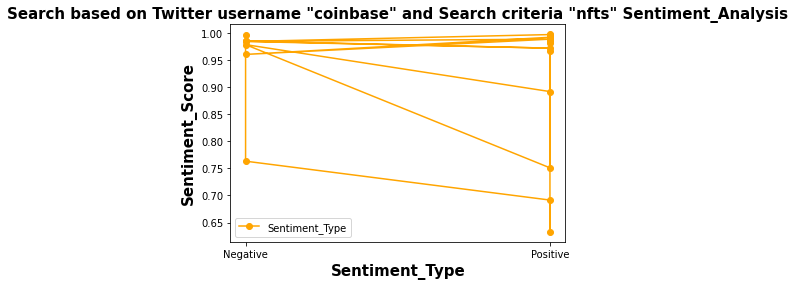

In [215]:
import matplotlib.pyplot as plt
plt.plot(tweet_df21.Sentiment_Type, tweet_df21.Sentiment_Score, marker = 'o', color = "orange", label ='Sentiment_Type')

plt.title('Search based on Twitter username "coinbase" and Search criteria "nfts" Sentiment_Analysis', fontweight="bold", fontsize =15)
plt.xlabel("Sentiment_Type", fontweight="bold", fontsize =15)
plt.ylabel("Sentiment_Score", fontweight="bold", fontsize =15)

plt.legend()
plt.show()

#shows tweets based on the column named Sentiment_Score' and column named "Sentiment_Type"(Positive or Negative).
#The results were Twitter username "coinbase and Search criteria "nfts". 
#There are 20 Tweets, 13 with Sentiment_Type(Positive) and 7 with Sentiment_Type(Negative) on ranging from 10-2021 to 03-2022 

**Picture of code and plot Sentiment_Type and Sentiment_Score based on Twitter Search using Twitter username "coinbase" and Search criteria "nfts"**

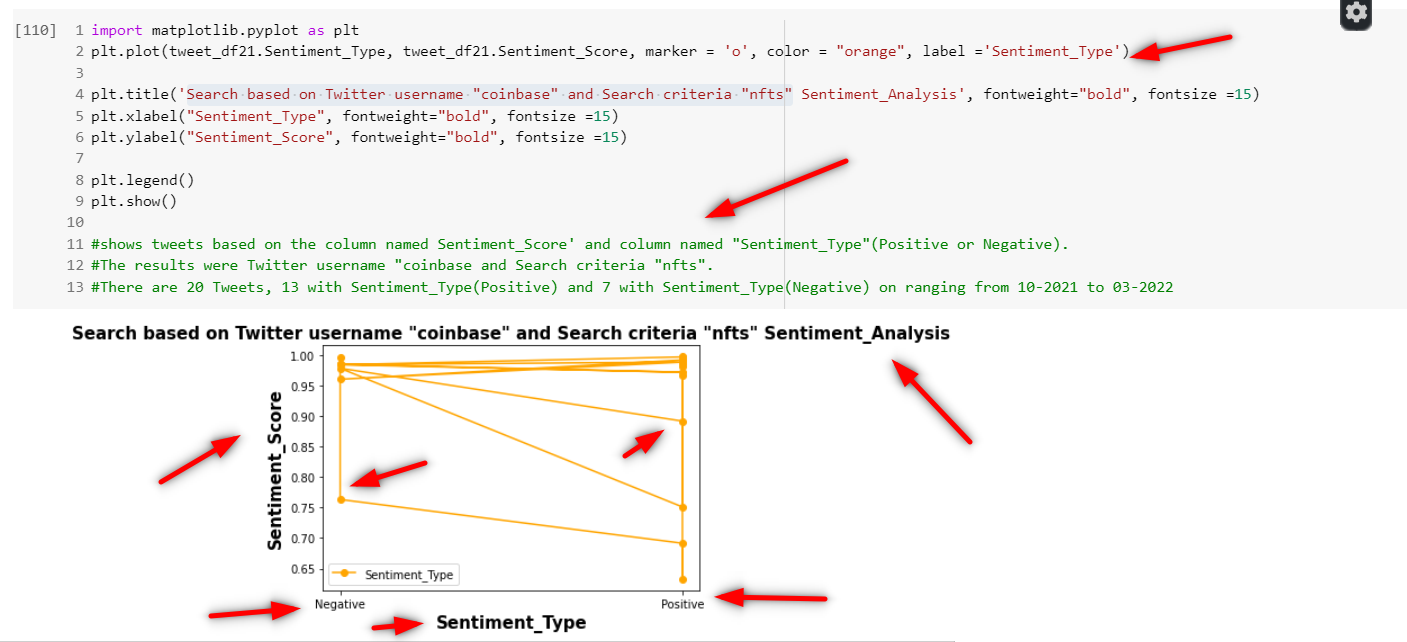

**Power BI Visualization of Sentiment_Type, Sentiment_Score based on Twitter Search using Twitter username "coinbase" and Search criteria "nfts"**

**There are 20 tweets, 13 with a Sentiment_Type of Positive, 7 with a Sentiment_Type of Negative with varying scores**

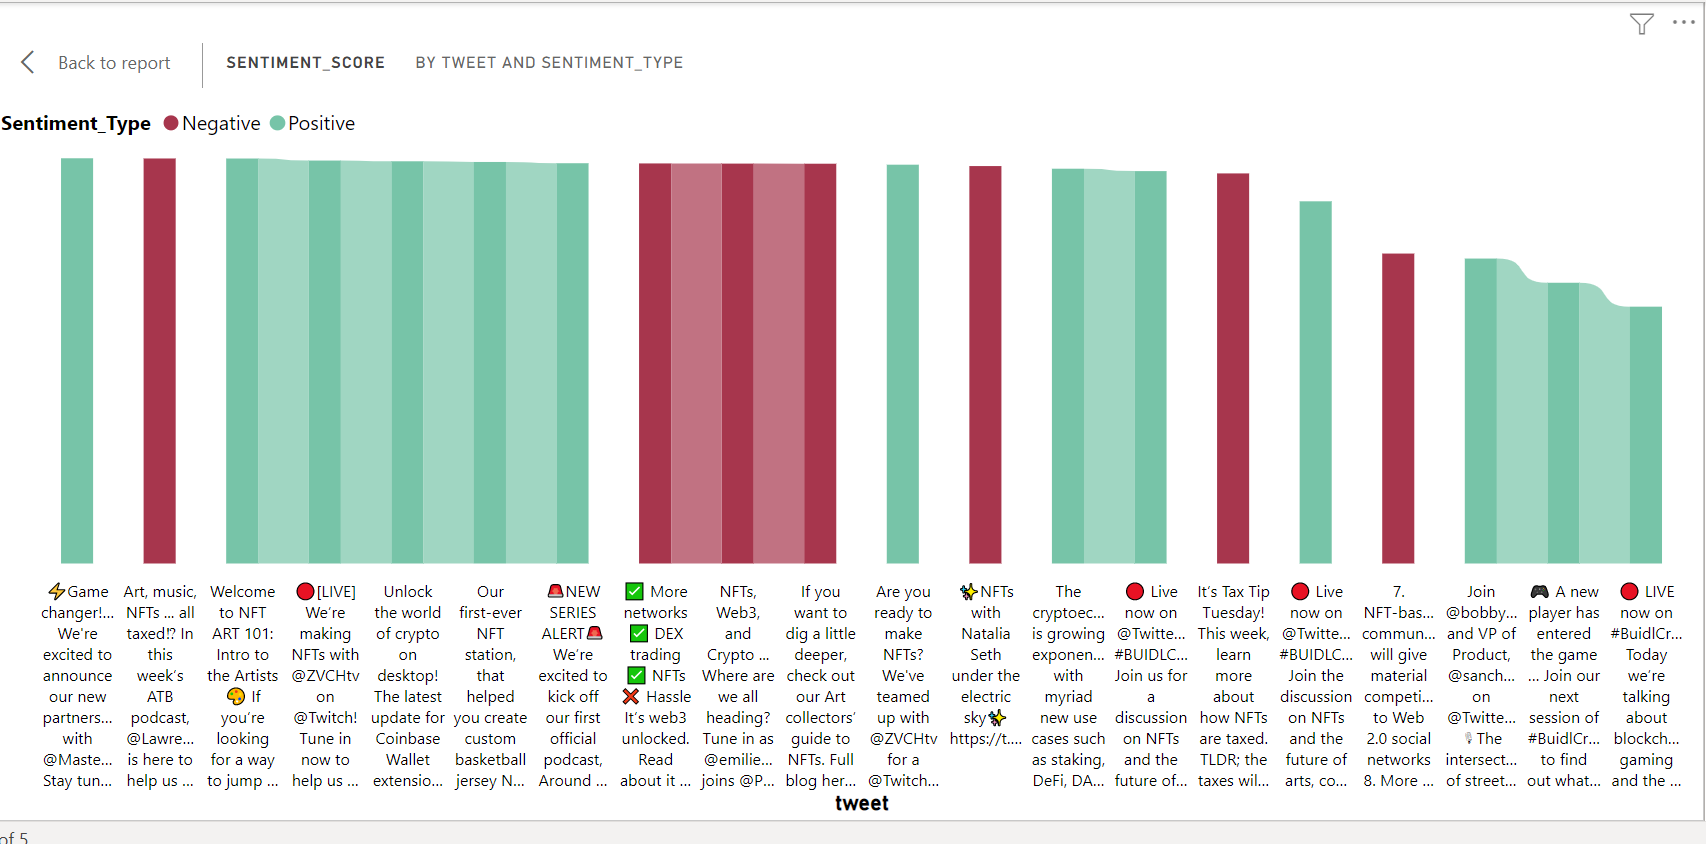

**Power BI Visualization of Sentiment_Type, Sentiment_Score based on Twitter Search using Twitter username "coinbase" and Search criteria "nfts"**

**There are 20 tweets, 13 with a Sentiment_Type of Positive, 7 with a Sentiment_Type of Negative with varying scores**

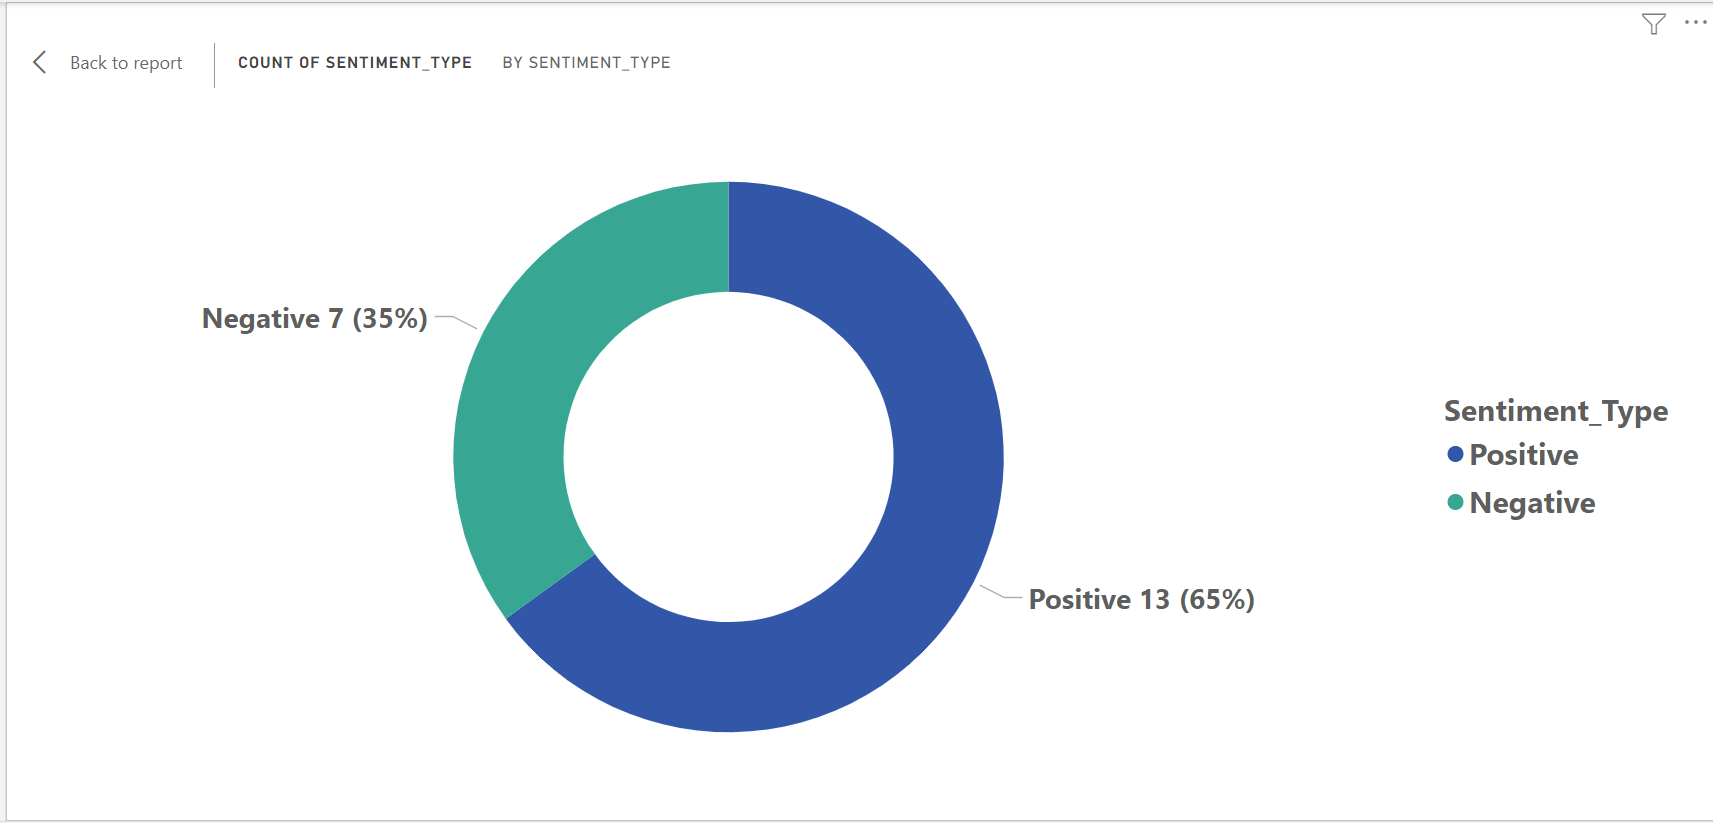

**Power BI Visualization of Sentiment_Type, Sentiment_Score based on Twitter Search using Twitter username "coinbase" and Search criteria "nfts"**

**There are 20 tweets, 13 with a Sentiment_Type of Positive, 7 with a Sentiment_Type of Negative with varying scores**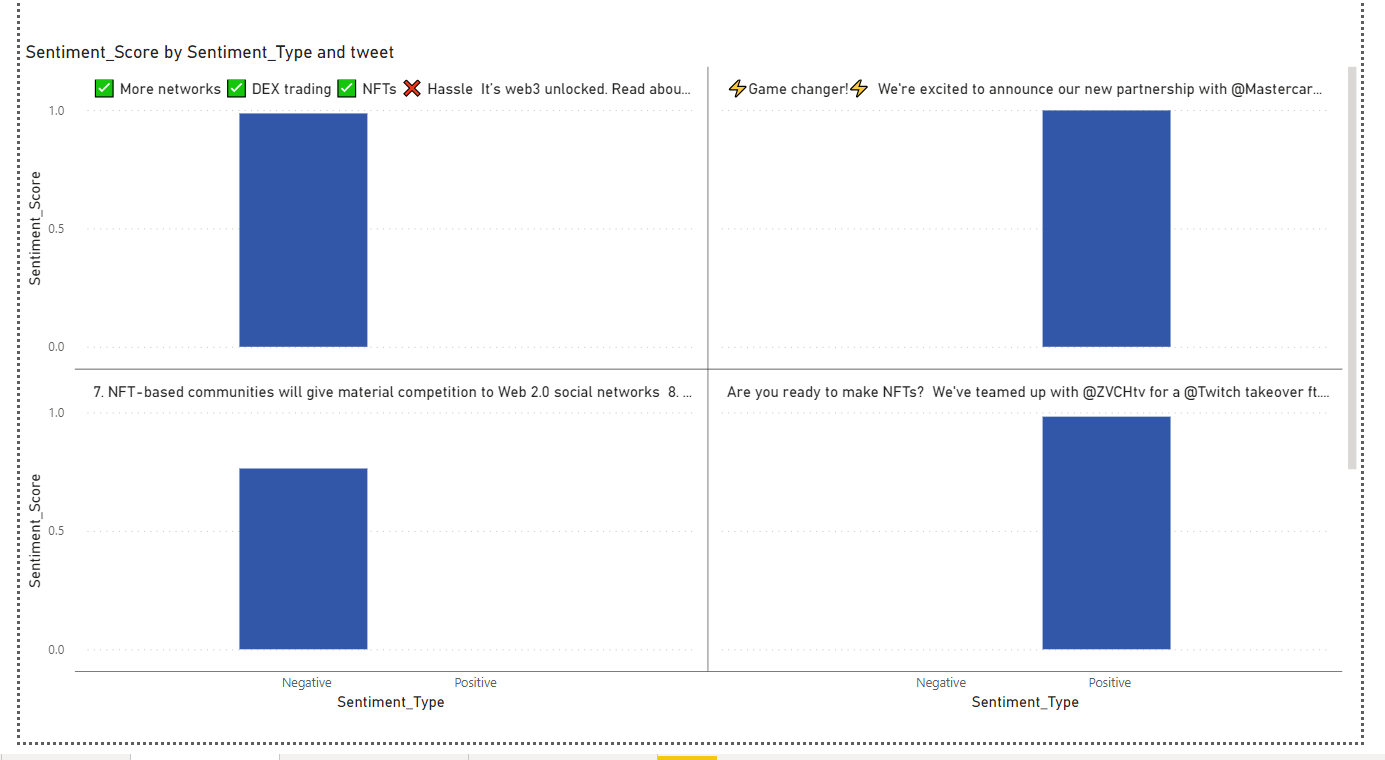

**Power BI Visualization of Sentiment_Type, Sentiment_Score based on Twitter Search using Twitter username "coinbase" and Search criteria "nfts"**

**There are 20 tweets, 13 with a Sentiment_Type of Positive, 7 with a Sentiment_Type of Negative with varying scores**

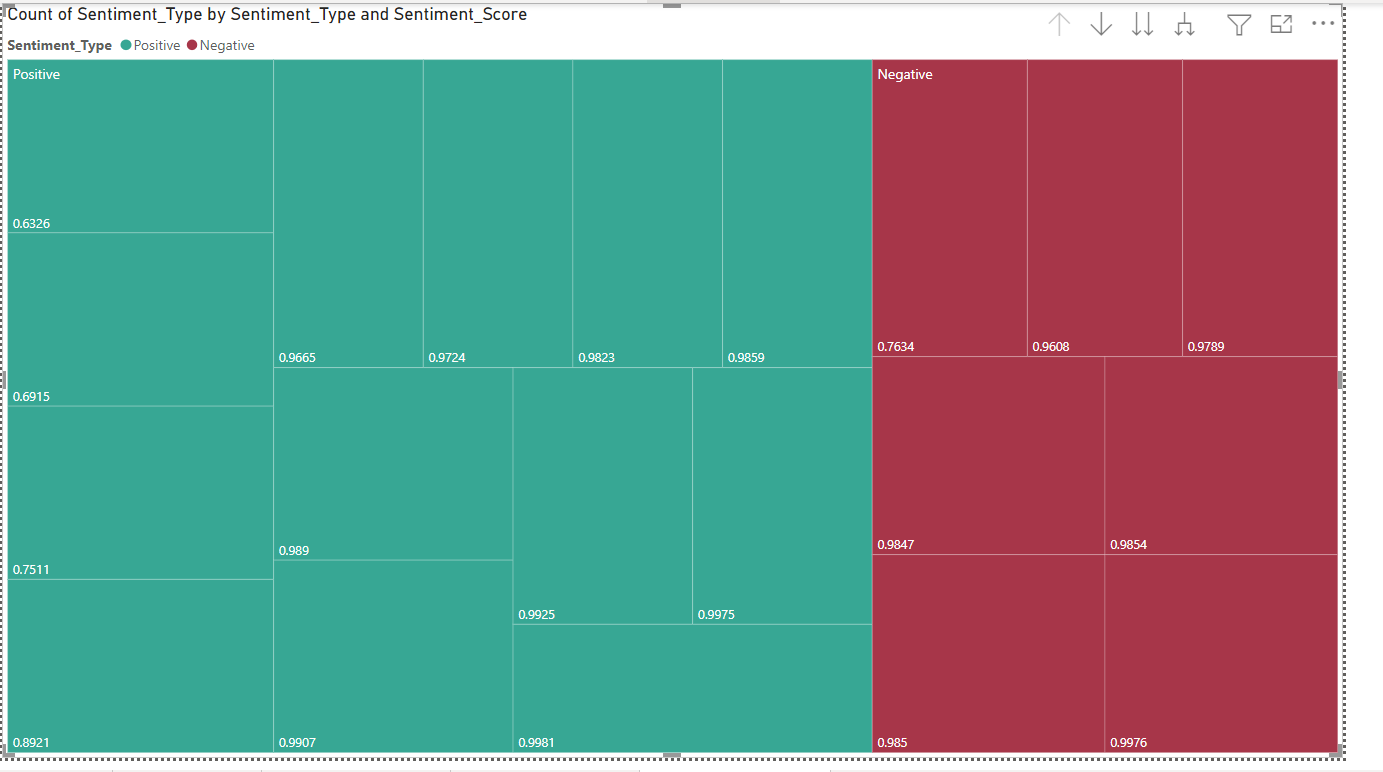

**Power BI Visualization of Sentiment_Type, Sentiment_Score based on Twitter Search using Twitter username "coinbase" and Search criteria "nfts"**

**There are 20 tweets, 13 with a Sentiment_Type of Positive, 7 with a Sentiment_Type of Negative with varying scores**

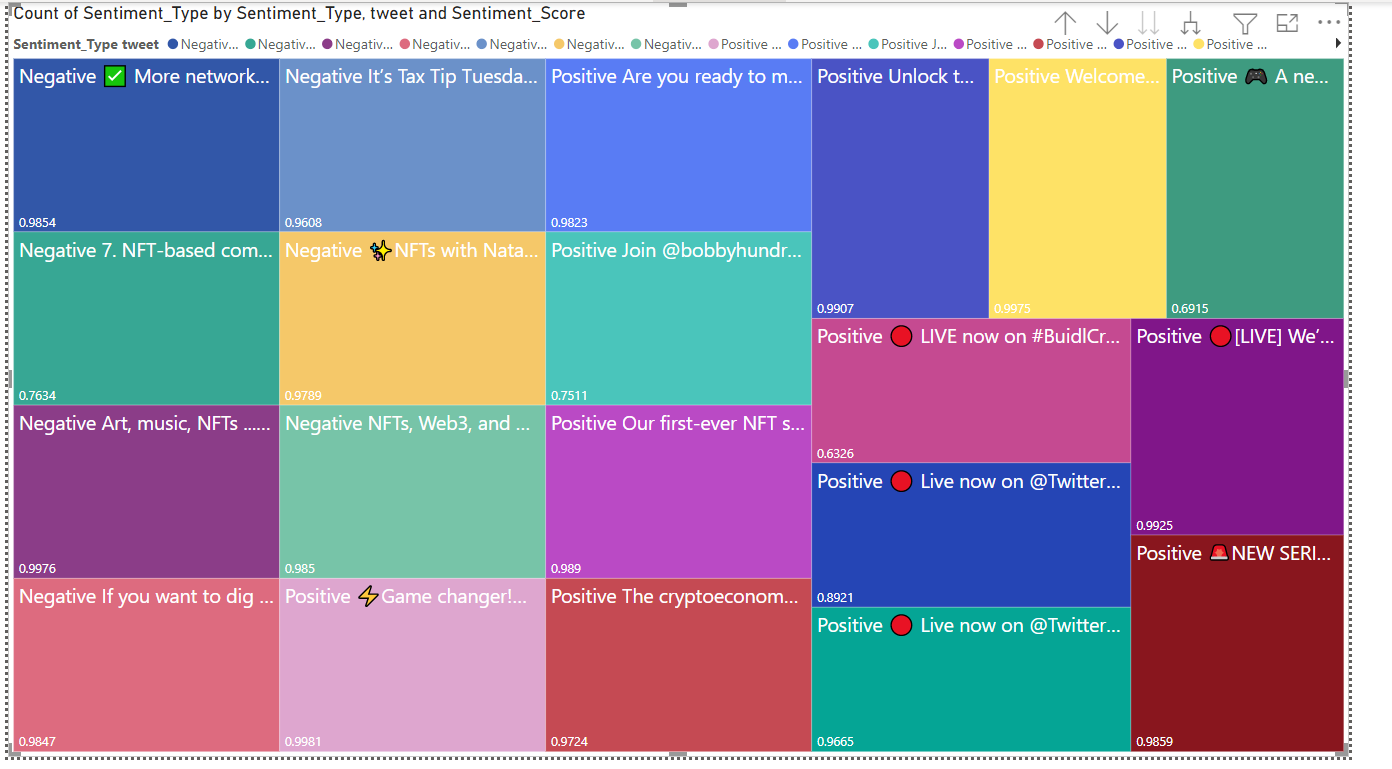

**Power BI Visualization of Sentiment_Type, Sentiment_Score based on Twitter Search using Twitter username "coinbase" and Search criteria "nfts"**

**There are 20 tweets, 13 with a Sentiment_Type of Positive, 7 with a Sentiment_Type of Negative with varying scores**


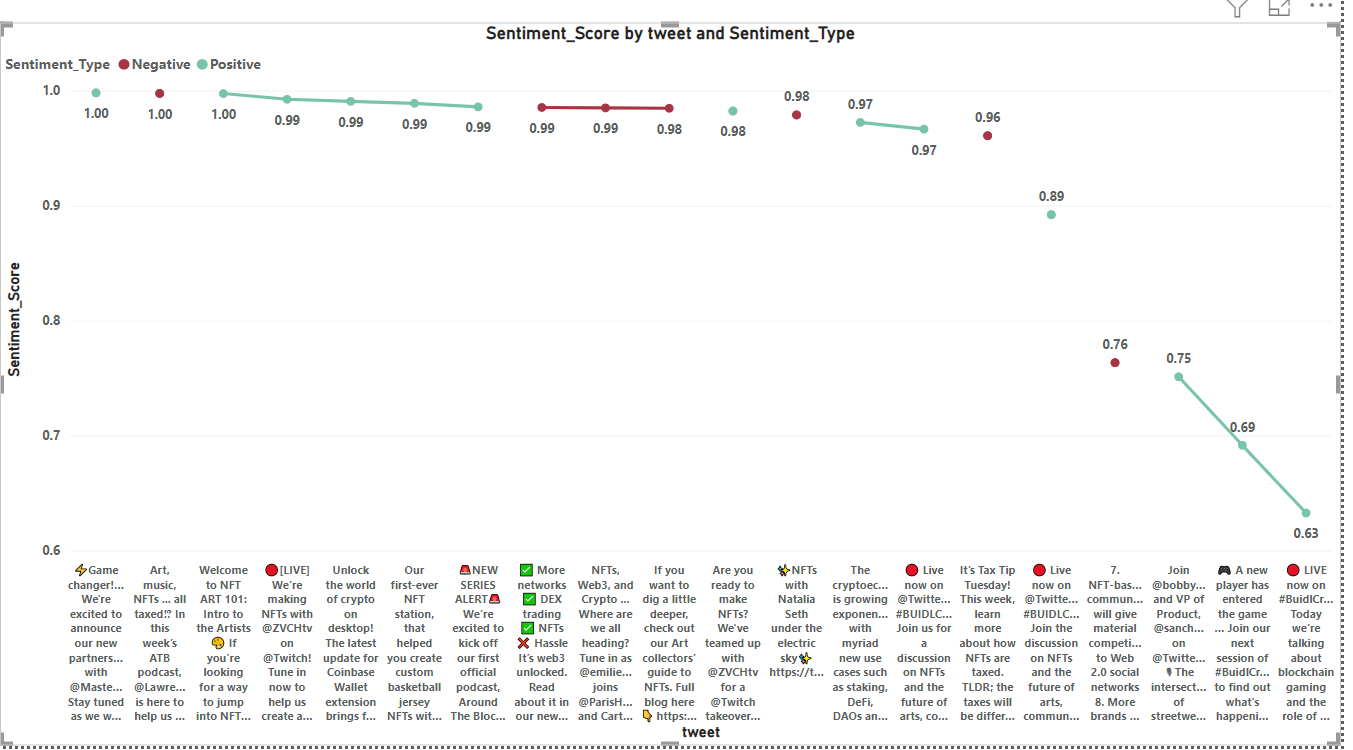


**Picture of Matplotlib Plot showing Tweet Date and Sentiment_Type of Positive or Negative based on Twitter username "coinbase" and search criteria of "nft"**


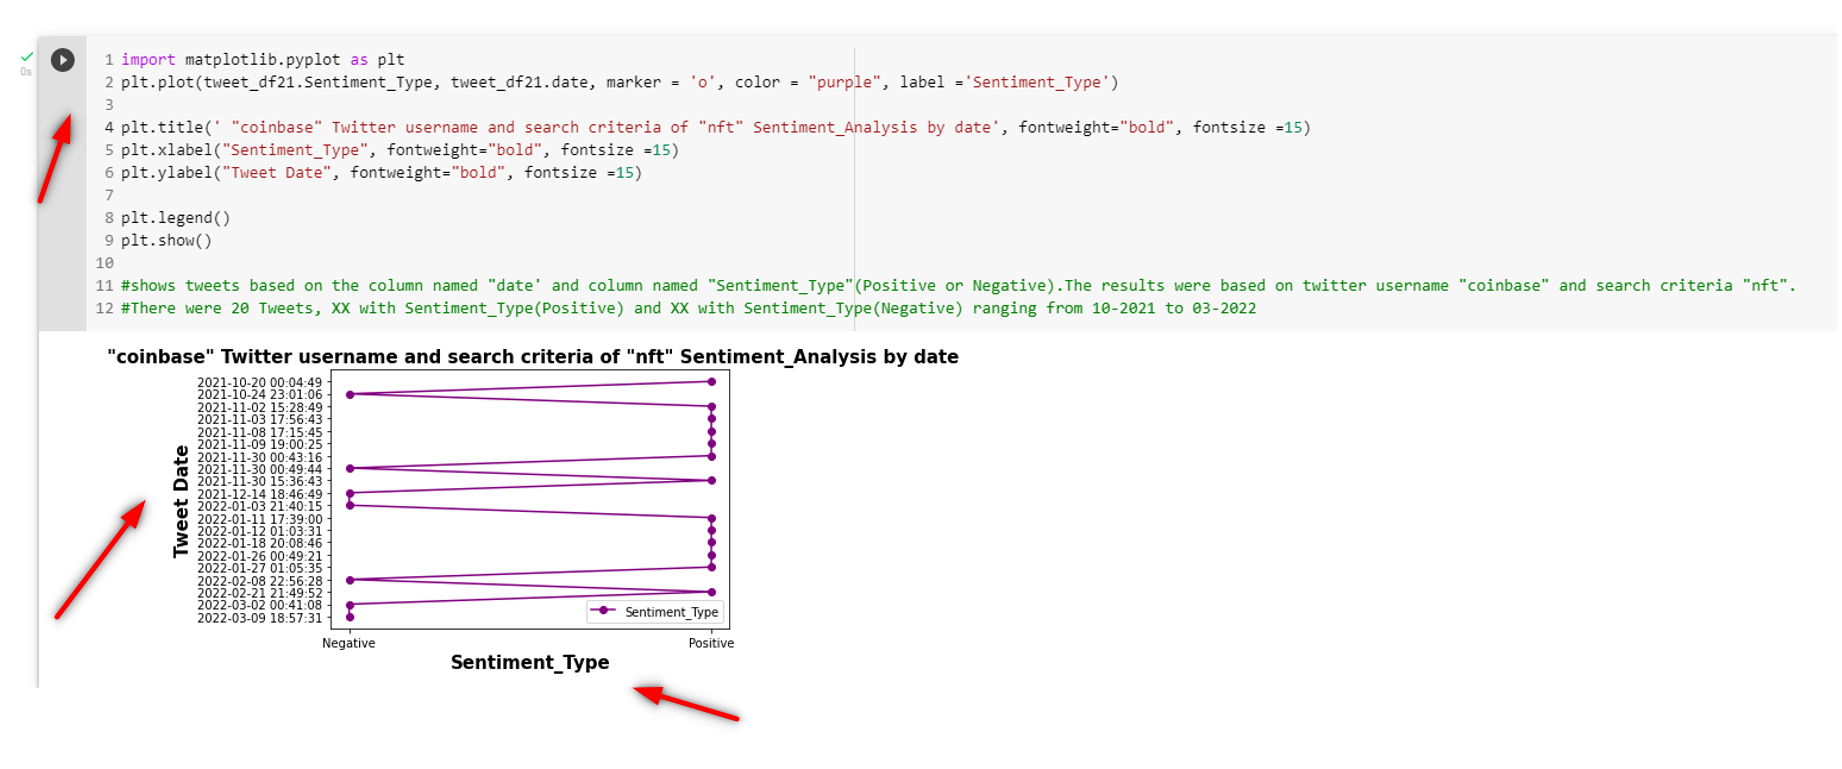




**Matplotlib Visualization below shows tweets based on the column named "date' and column named "Sentiment_Type"(Positive or Negative).The results were based on twitter username "coinbase" and search criteria "nft"**

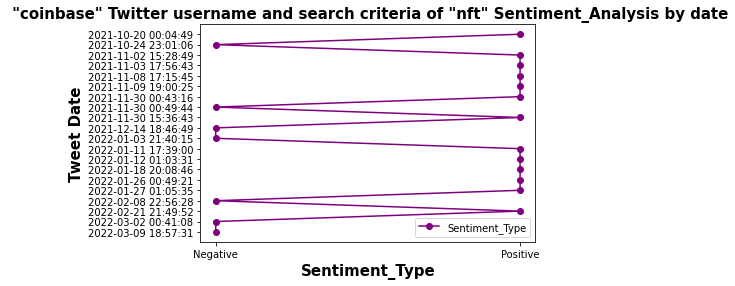

In [216]:
import matplotlib.pyplot as plt
plt.plot(tweet_df21.Sentiment_Type, tweet_df21.date, marker = 'o', color = "purple", label ='Sentiment_Type')

plt.title(' "coinbase" Twitter username and search criteria of "nft" Sentiment_Analysis by date', fontweight="bold", fontsize =15)
plt.xlabel("Sentiment_Type", fontweight="bold", fontsize =15)
plt.ylabel("Tweet Date", fontweight="bold", fontsize =15)

plt.legend()
plt.show()

#shows tweets based on the column named "date' and column named "Sentiment_Type"(Positive or Negative).The results were based on twitter username "coinbase" and search criteria "nft". 
#There were 20 Tweets, XX with Sentiment_Type(Positive) and XX with Sentiment_Type(Negative) ranging from 10-2021 to 03-2022 

**Picture of Matplotlib plot from executed cell for column "tweet" and column "Sentiment_Type" based on hashtag #nfts on 3-04-2022**


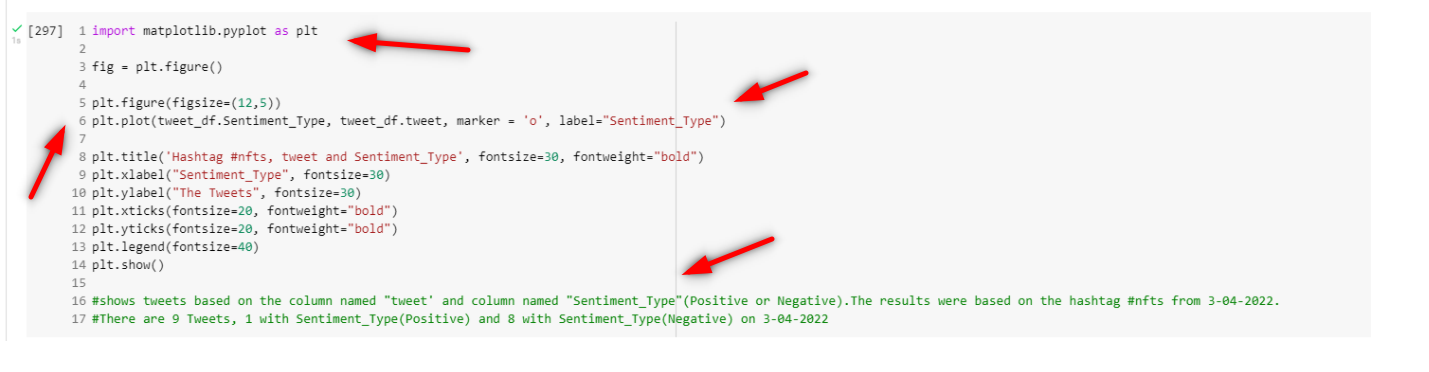


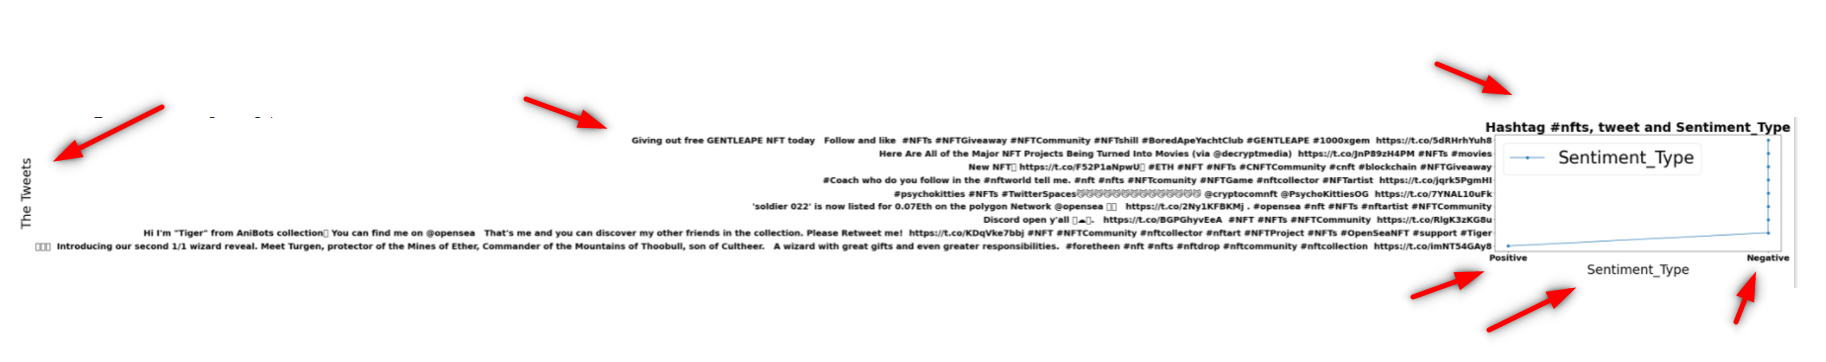

**Picture of Matplotlib plot of column Sentiment_Score and column Sentiment_Type based on hashtag #nfts on 3-4-2022**

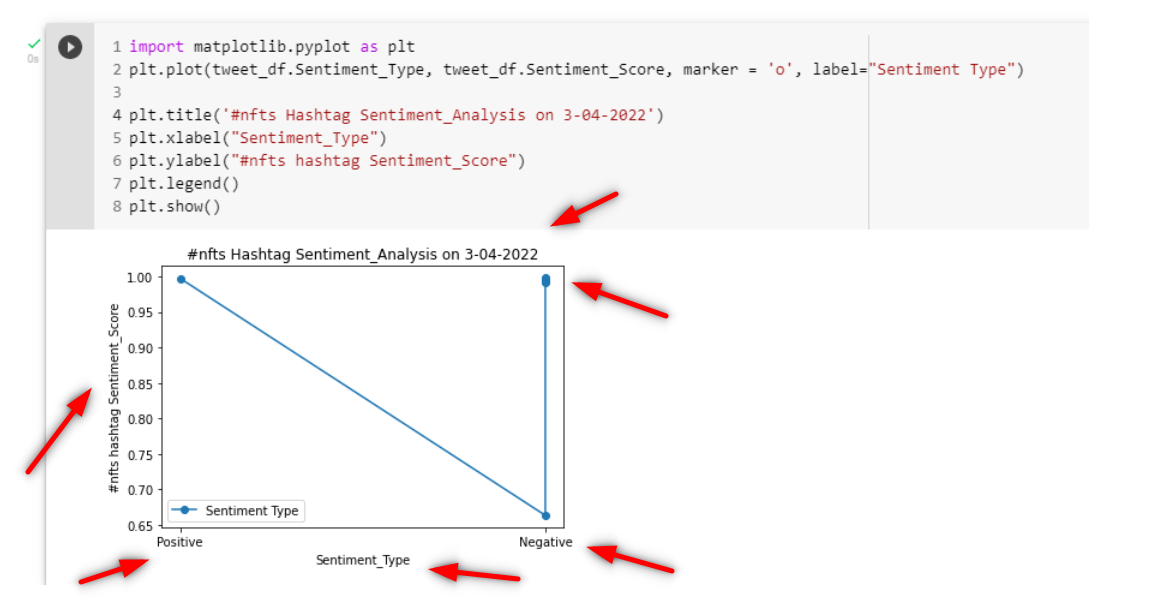

**Power BI Data Visualizations**

**Exporting tweet_df pandas dataframe to a csv file using Google Colab**
**Importing the dataframe columns into Power BI to visualize from insights for hashtag #nfts**

In [ ]:
# exporting twwet_df pandas dataframe to a csv file 
from google.colab import drive
drive.mount('drive')
tweet_df.to_csv('tweet_df.csv')
!cp tweet_df.csv "drive/My Drive/"


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


**Power BI Visualization of Sentiment_Type, Sentiment_Score, and The Tweets based on hashtag search of #nfts on 3-04-2022**

**There are 9 tweets, 1 with a Sentiment_Type of Positive, 8 with a Sentiment_Type of Negative**

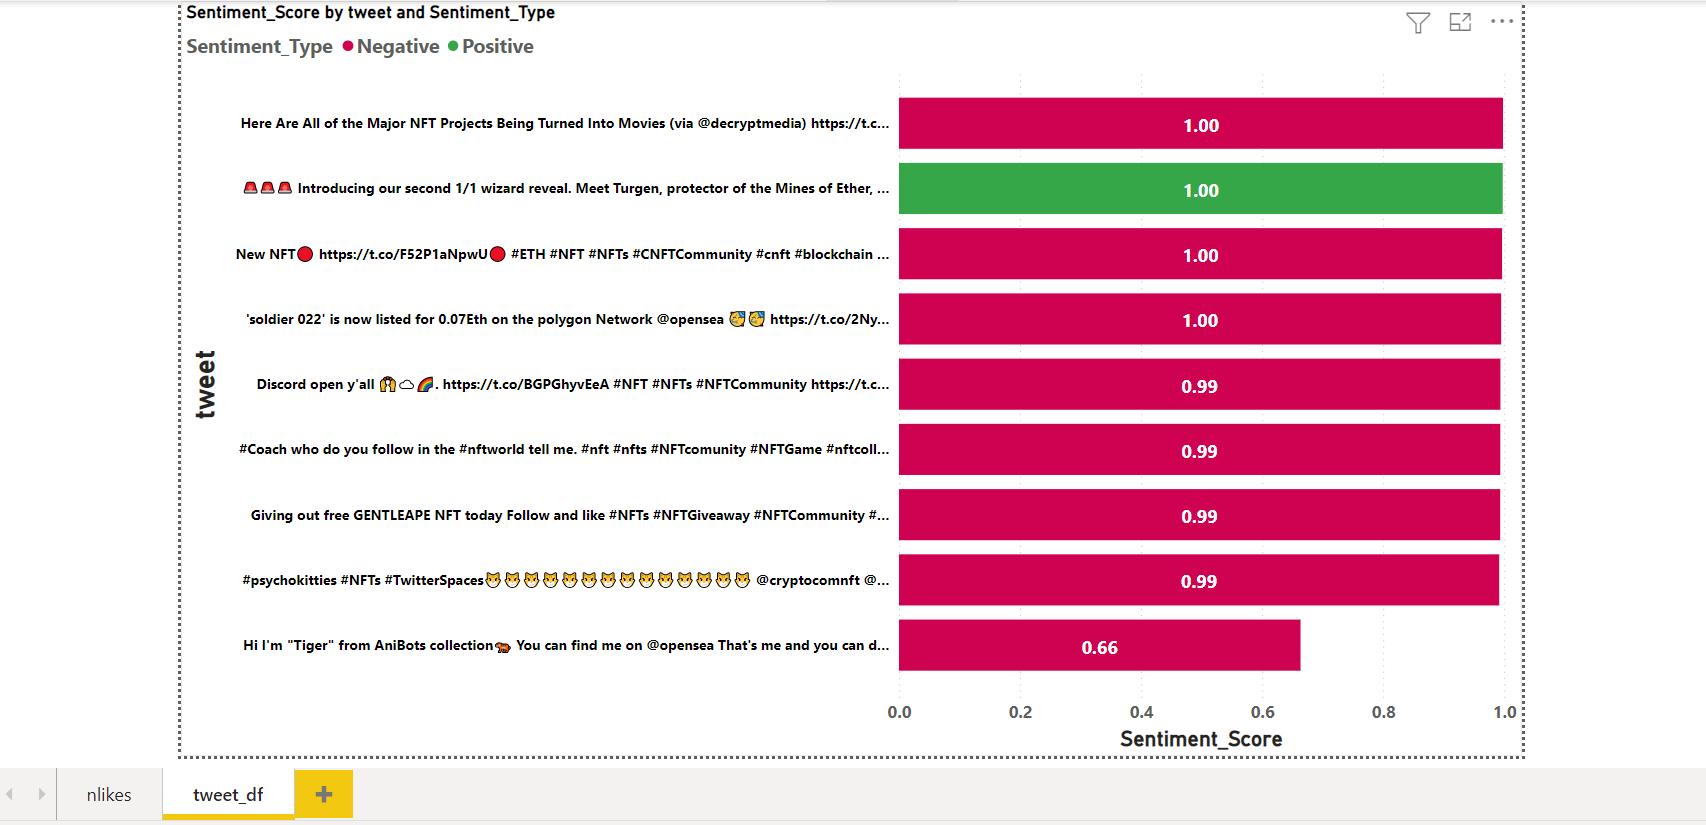


**Picture of Exporting twt_df1 pandas dataframe to a csv file using Google Colab**

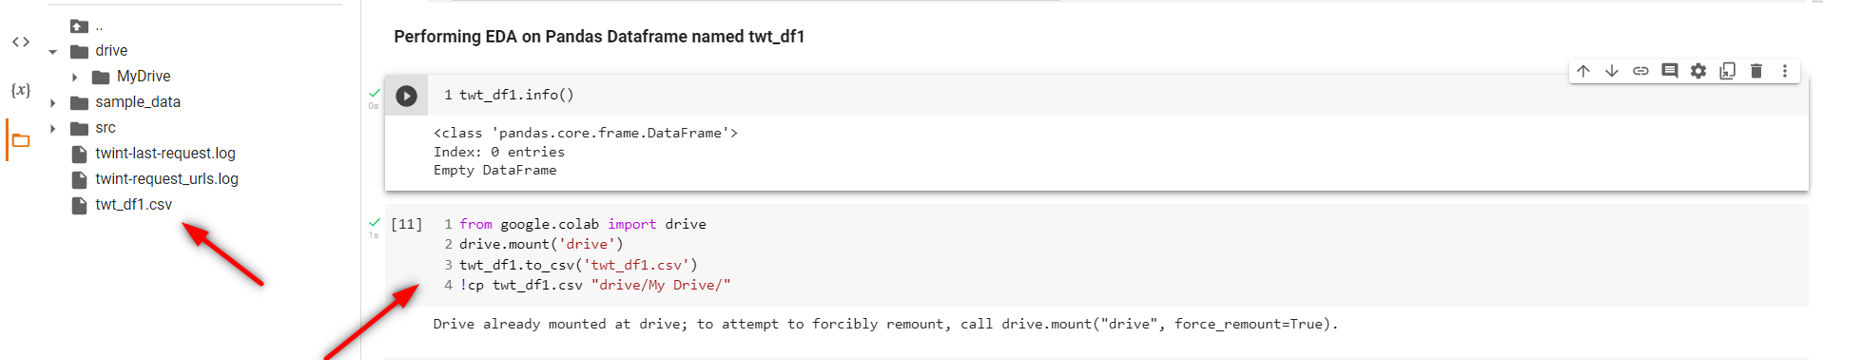

In [ ]:
from google.colab import drive
drive.mount('drive')
twt_df1.to_csv('twt_df1.csv')
!cp twt_df1.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


**Power BI Pie Chart Number of Likes (nlikes) by tweet based on hashtag #nfts on 3-4-2022**

**There are 9 tweets, one tweet had the highest amount of nlikes which was 20**

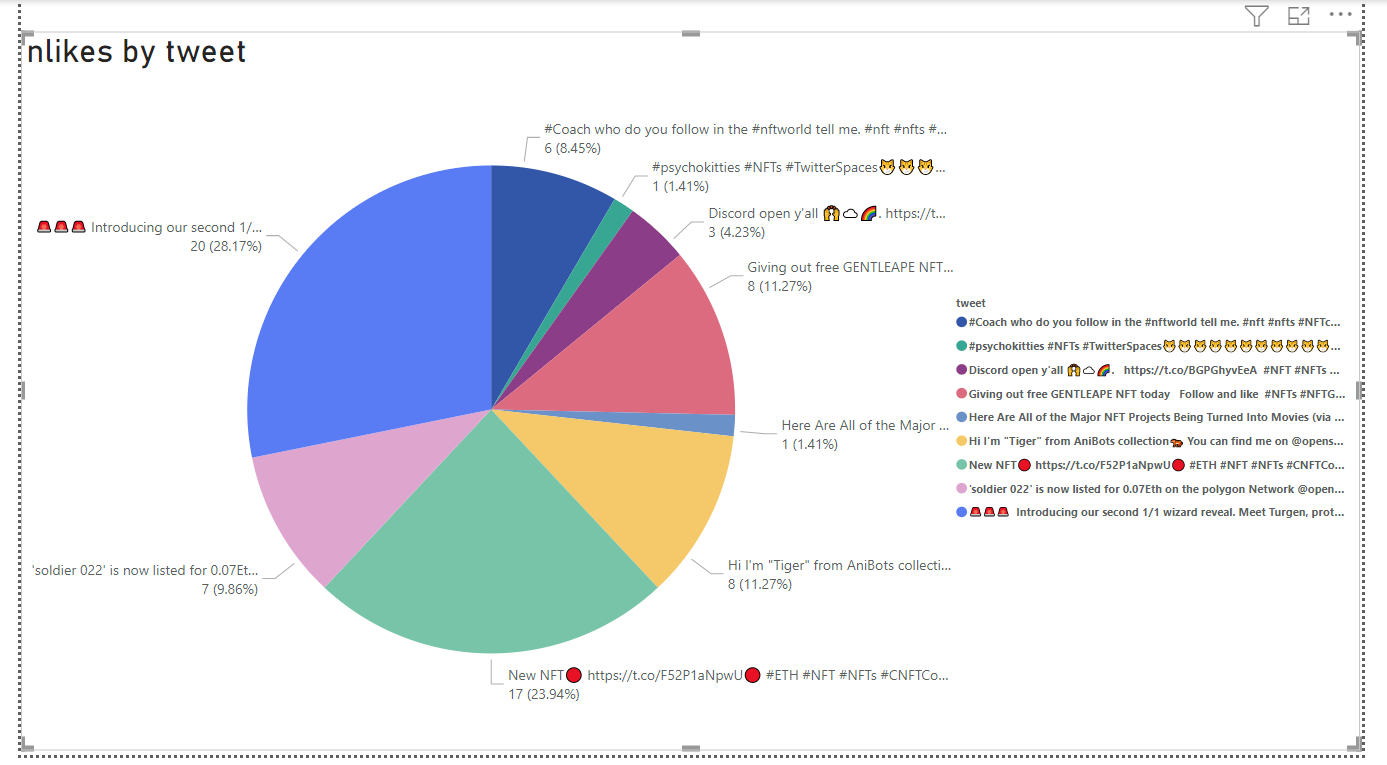

**Picture of Matplotlib plot showing tweets based on the column named "date' and column named "Sentiment_Type"(Positive or Negative).The results were based on the hashtag #nft from 3-05-2022.**

**There are 17 Tweets, 3 with Sentiment_Type(Positive) and 14 with Sentiment_Type(Negative) on 3-05-2022**

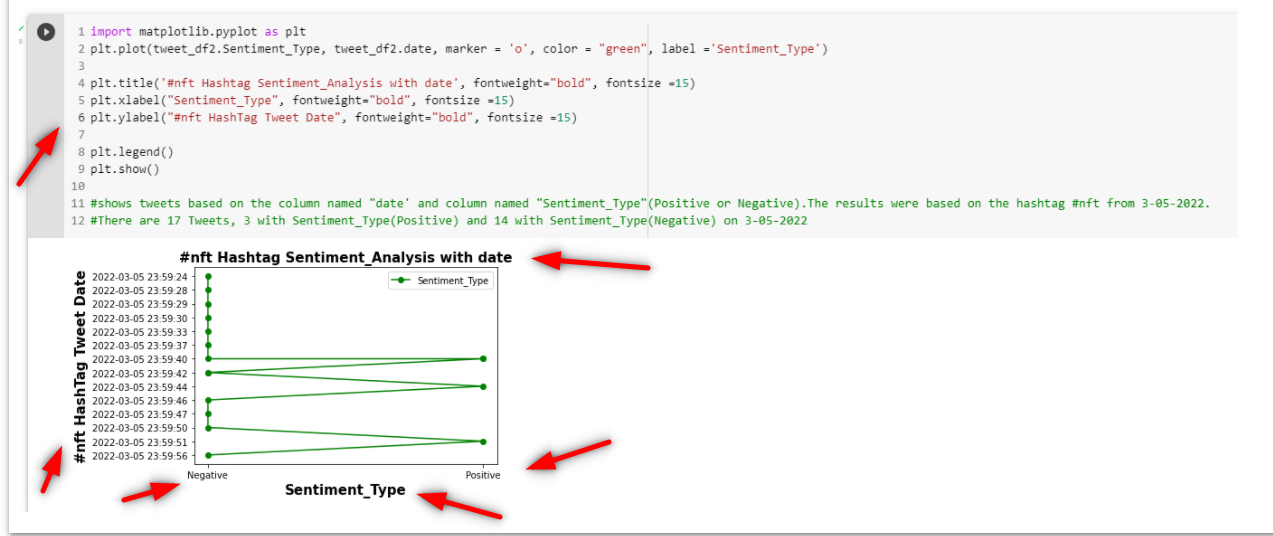

**Matplotlib plot for #nfts Hashtag tweet from 3-08-2022 by Sentiment_Score vs Sentiment_Type**


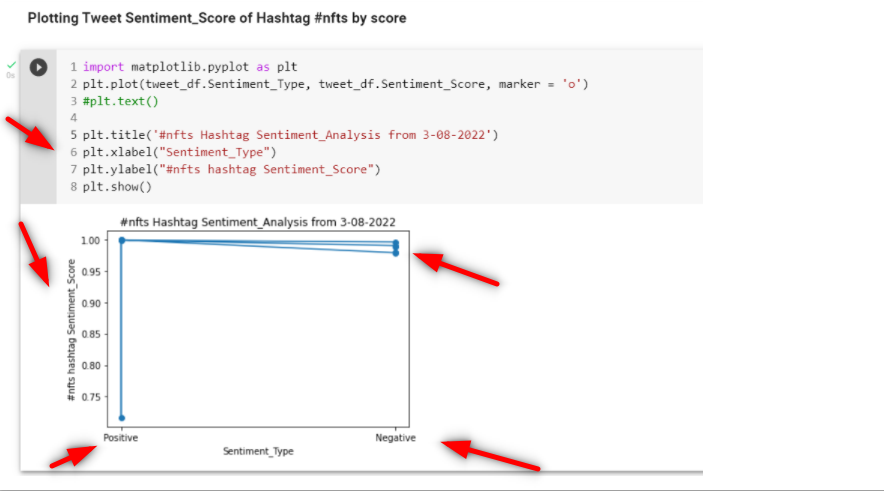

**Adding Dataframe Columns named Sentiment_Score and Sentiment_Type**

**Fyi When using the python library Twint for Twitter web-scraping,running a live web-scraping search will render different results, particularly the amount of tweets and the dates of the tweets. In the Sentiment_Type column and the Sentiment_Score column, I added the amount of Sentiment_Type(Positive or Negative) and the Sentiment_Score based on what my twint search rendered as an output at that time. When I did my twint search, it outputted 9 tweets. If someone runs a twint search in real time the amount of tweets and dates will be different.**

**Adding Column Sentiment_Type Pandas Dataframe named tweet_df for hashtag 1)#nfts**

In [220]:
tweet_df.insert(5, "Sentiment_Type", ["Positive","Negative","Negative","Negative", "Negative","Negative","Negative","Negative","Negative"],True)

**Adding Column Sentiment_Score Pandas Dataframe named tweet_df for hashtag 1)#nfts**

In [221]:
tweet_df.insert(6, "Sentiment_Score", [0.9976,0.6635,0.9938,0.995,0.9918,0.9936,0.9965,0.9981,0.9934],True)

**Printing New Dataframe with added Columns Sentiment_Type and Sentiment_Score**

In [222]:
tweet_df

date         username  \
0  2022-03-04 23:59:59  WizardsOfEtheen   
1  2022-03-04 23:59:55         Hashook_   
2  2022-03-04 23:59:54     MegaHeadsNFT   
3  2022-03-04 23:59:49        dicoslabs   
4  2022-03-04 23:59:47  nicolaouchris93   
5  2022-03-04 23:59:46    SkinnyJoeNFTs   
6  2022-03-04 23:59:45     butterfly_lt   
7  2022-03-04 23:59:41        cryptovyn   
8  2022-03-04 23:59:37  Otegbeyeboluwa1   

                                               tweet  \
0  🚨🚨🚨  Introducing our second 1/1 wizard reveal....   
1  Hi I'm "Tiger" from AniBots collection🐅 You ca...   
2  Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhy...   
3  'soldier 022' is now listed for 0.07Eth on the...   
4  #psychokitties #NFTs #TwitterSpaces😼😼😼😼😼😼😼😼😼😼😼...   
5  #Coach who do you follow in the #nftworld tell...   
6  New NFT🔴 https://t.co/F52P1aNpwU🔴 #ETH #NFT #N...   
7  Here Are All of the Major NFT Projects Being T...   
8  Giving out free GENTLEAPE NFT today   Follow a...   

                                            hashtags  nlikes Sentiment_Type  \
0  [foretheen, nft, nfts, nftdrop, nftcommunity, ...      20       Positive   
1  [nft, nftcommunity, nftcollector, nftart, nftp...       6       Negative   
2                          [nft, nfts, nftcommunity]       3       Negative   
3      [opensea, nft, nfts, nftartist, nftcommunity]       6       Negative   
4               [psychokitties, nfts, twitterspaces]       1       Negative   
5  [coach, nftworld, nft, nfts, nftcomunity, nftg...       6       Negative   
6  [eth, nft, nfts, cnftcommunity, cnft, blockcha...      17       Negative   
7                                     [nfts, movies]       1       Negative   
8  [nfts, nftgiveaway, nftcommunity, nftshill, bo...       8       Negative   

   Sentiment_Score  
0           0.9976  
1           0.6635  
2           0.9938  
3           0.9950  
4           0.9918  
5           0.9936  
6           0.9965  
7           0.9981  
8           0.9934

**Matplotlib plot based on the column named "date' and column named "Sentiment_Type"(Positive or Negative).The results were based on the hashtag #nfts from 3-04-2022**

**There are 9 Tweets, 1 with Sentiment_Type(Positive) and 8 with Sentiment_Type(Negative) on 3-04-2022**

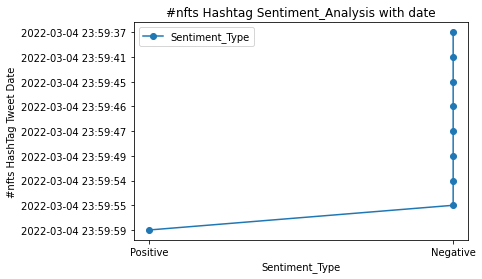

In [224]:
import matplotlib.pyplot as plt
plt.plot(tweet_df.Sentiment_Type, tweet_df.date, marker = 'o', label ='Sentiment_Type')

plt.title('#nfts Hashtag Sentiment_Analysis with date')
plt.xlabel("Sentiment_Type")
plt.ylabel("#nfts HashTag Tweet Date")

plt.legend()
plt.show()

#shows tweets based on the column named "date' and column named "Sentiment_Type"(Positive or Negative).The results were based on the hashtag #nfts from 3-04-2022. 
#There are 9 Tweets, 1 with Sentiment_Type(Positive) and 8 with Sentiment_Type(Negative) on 3-04-2022

**Matplotlib plot based on the column named "tweet' and the column named "Sentiment_Type"(Positive or Negative).The results were based on the hashtag #nfts from 3-04-2022**

**There are 9 Tweets, 1 with Sentiment_Type(Positive) and 8 with Sentiment_Type(Negative) on 3-04-2022**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128308 missing from current font.
  fon

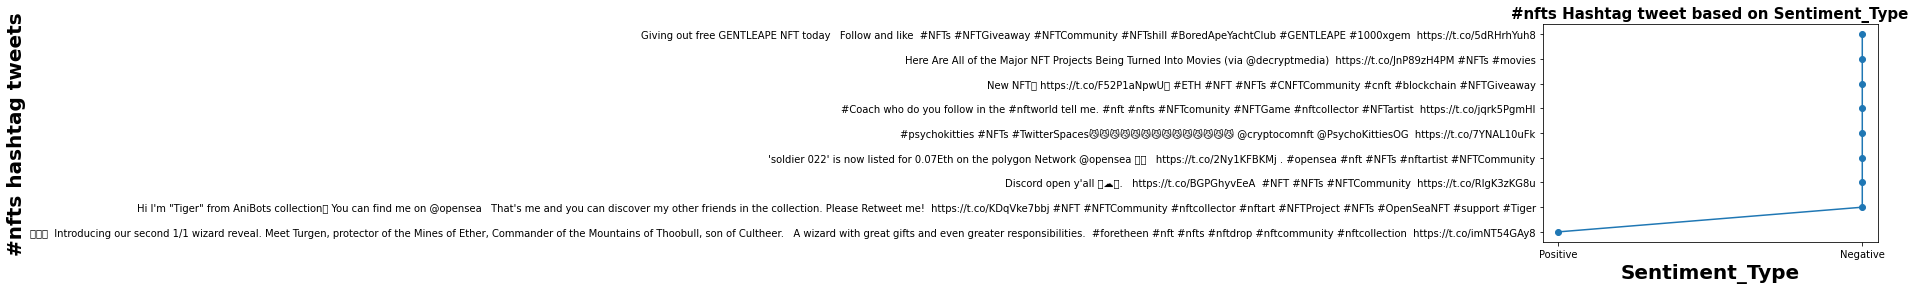

In [226]:
import matplotlib.pyplot as plt
plt.plot(tweet_df.Sentiment_Type, tweet_df.tweet, marker = 'o', label = "Sentiment_Type")
#plt.text()

plt.title('#nfts Hashtag tweet based on Sentiment_Type', fontweight="bold", fontsize=15)
plt.xlabel("Sentiment_Type", fontweight="bold", fontsize=20)
plt.ylabel("#nfts hashtag tweets", fontweight="bold", fontsize=20)
plt.show()

# Matplotlib plot based on the column named "tweet' and the column named "Sentiment_Type"(Positive or Negative).The results were based on the hashtag #nfts from 3-04-2022
# There are 9 Tweets, 1 with Sentiment_Type(Positive) and 8 with Sentiment_Type(Negative) on 3-04-2022

**Picture of Matplotlib Plot Tweet Sentiment_Type based on Hashtag #nfts by the date of 3-08-2022, showing picture of the plot with code that produced it**

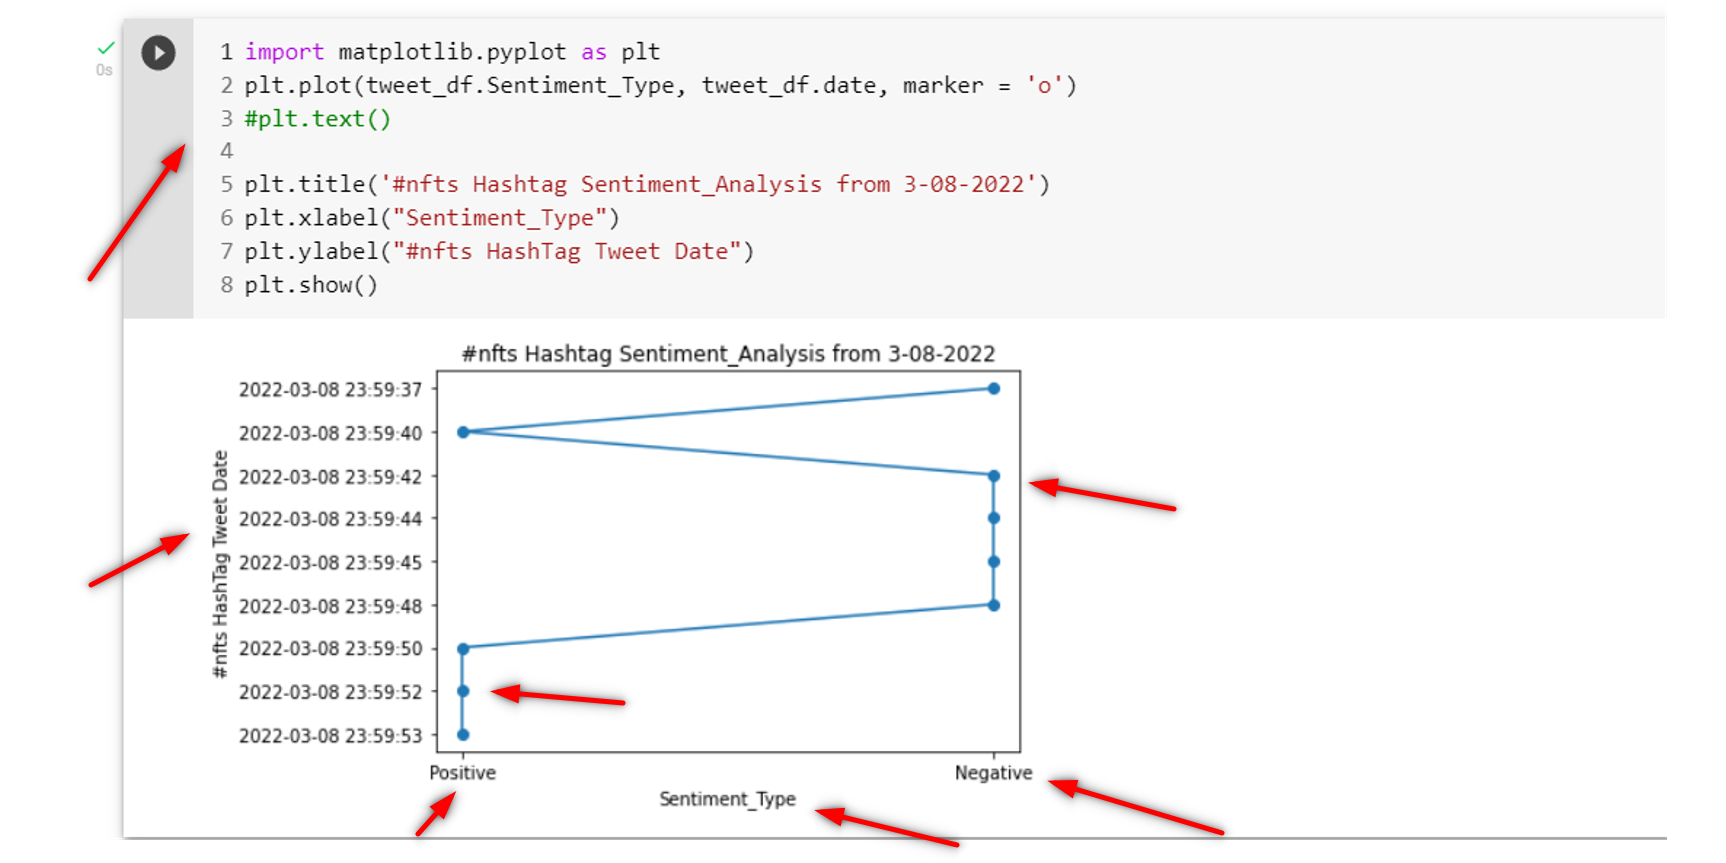

**I am finished with the project, Thanks for viewing my notebook! 😄**

I had alot of fun doing the datathon. I was happy to be able to test and display my Data Analysis, Machine-Learning, MatplotLib, and Power-BI skills on a intruiging project.

I really enjoyed assisting the DPhi datathon community with a sample notebook to extract the data from Twint. I believe in uplifting others as I have been helped by many in the past and present

I enjoyed seeing the positive feedback I received from people regarding my social media posts about the datathon on Linkedin, Facebook, Instagram, and Discord. I was very engaged and passionate about data science and like forward to future datathons.

**Feel free to connect with me on Linkedin**

https://www.linkedin.com/in/christopherefranklin/

[Linkedin](https://www.linkedin.com/in/christopherefranklin/)

and 

**Discord:**

cef1911#9758